## 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

In [1]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target
cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

/Users/jhp507/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [2]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [3]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [4]:
# 학습, 검증, 테스트용 DMatrix를 생성
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [5]:
params = {
    'max_depth' : 3,
    'eta' : 0.05,
    'objective' : 'binary:logistic',
    'eval_metric' : 'logloss'
}
num_round = 400

In [6]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval'로 명기합니다.
eval_list = [(dtr, 'train'),(dval,'eval')] # 또는 eval_list = [(dval,'eval')] 만 명기해도 무방

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtr, num_boost_round=num_round, early_stopping_rounds=50, evals=eval_list)

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52929
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31893	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

[170]	train-logloss:0.01312	eval-logloss:0.26133
[171]	train-logloss:0.01304	eval-logloss:0.26148
[172]	train-logloss:0.01297	eval-logloss:0.26157
[173]	train-logloss:0.01285	eval-logloss:0.26253
[174]	train-logloss:0.01278	eval-logloss:0.26229
[175]	train-logloss:0.01267	eval-logloss:0.26086


In [7]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.845 0.008 0.68  0.081 0.975 0.999 0.998 0.998 0.996 0.001]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [8]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [9]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677, AUC: 0.9937


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

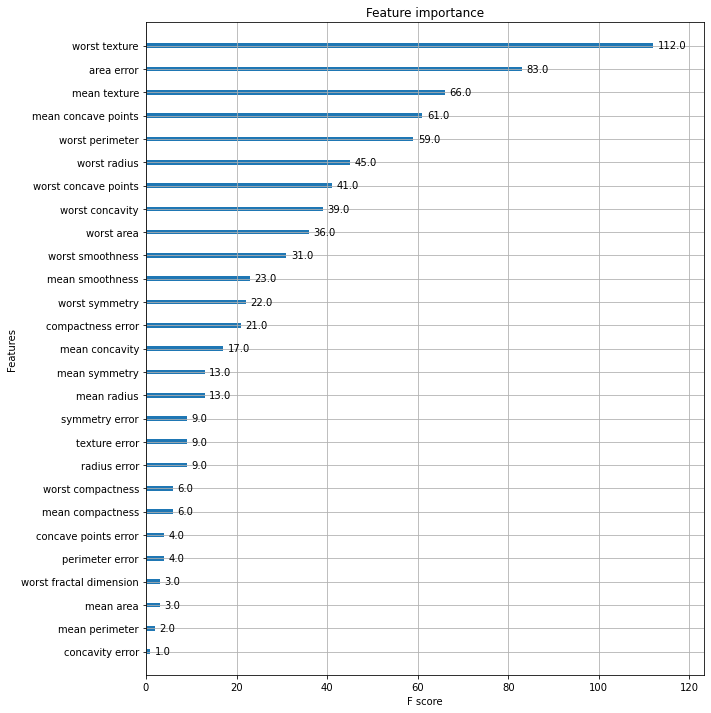

In [10]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

## 사이킷런 래퍼 XGBoost의 개요 및 적용

In [11]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [12]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870, F1: 0.9744, AUC: 0.9954


In [13]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss', eval_set=evals, verbose=True)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

[130]	validation_0-logloss:0.01886	validation_1-logloss:0.25712
[131]	validation_0-logloss:0.01863	validation_1-logloss:0.25609
[132]	validation_0-logloss:0.01839	validation_1-logloss:0.25649
[133]	validation_0-logloss:0.01816	validation_1-logloss:0.25789
[134]	validation_0-logloss:0.01802	validation_1-logloss:0.25811
[135]	validation_0-logloss:0.01785	validation_1-logloss:0.25794
[136]	validation_0-logloss:0.01763	validation_1-logloss:0.25876
[137]	validation_0-logloss:0.01748	validation_1-logloss:0.25884
[138]	validation_0-logloss:0.01732	validation_1-logloss:0.25867
[139]	validation_0-logloss:0.01719	validation_1-logloss:0.25876
[140]	validation_0-logloss:0.01696	validation_1-logloss:0.25987
[141]	validation_0-logloss:0.01681	validation_1-logloss:0.25960
[142]	validation_0-logloss:0.01669	validation_1-logloss:0.25982
[143]	validation_0-logloss:0.01656	validation_1-logloss:0.25992
[144]	validation_0-logloss:0.01638	validation_1-logloss:0.26035
[145]	validation_0-logloss:0.01623	valid

In [14]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677, AUC: 0.9933


In [15]:
# early_stopping_rounds를 10으로 설정하고 재학습
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=10, eval_metric='logloss', eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

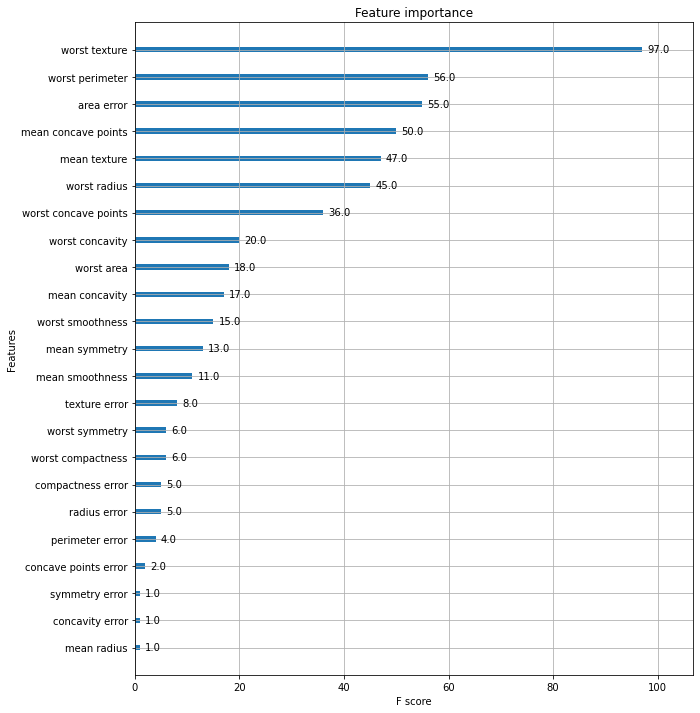

In [16]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper, ax=ax)

## LightGBM

In [17]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target'] = dataset.target
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
Training until validation scores don't improve for 50 rounds
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334

[111]	training's binary_logloss: 0.00850714	valid_1's binary_logloss: 0.280894
Early stopping, best iteration is:
[61]	training's binary_logloss: 0.0532381	valid_1's binary_logloss: 0.260236


In [18]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677, AUC: 0.9877


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

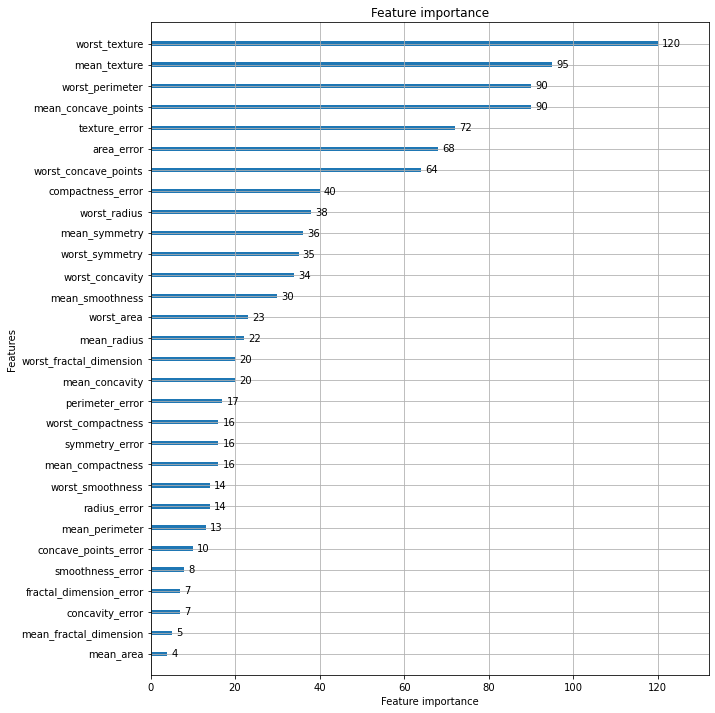

In [19]:
# plot_importance()를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

## 베이지안 최적화 기반의 HyperOpt를 이용한 하이퍼 파라미터 튜닝

In [20]:
from hyperopt import hp

# -10 ~ 10까지 1간격을 가지는 입력 변수 x와 -15 ~ 15까지 1간격으로 입력 변수 y 설정
search_space = {'x':hp.quniform('x',-10,10,1),'y':hp.quniform('y',-15,15,1)}

In [21]:
from hyperopt import STATUS_OK

# 목적 함수를 생성. 변수값과 변수 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정 값을 반환
def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y
    return retval

In [22]:
from hyperopt import fmin, tpe, Trials
# 입력 결과값을 저장한 Trials 객체값 생성
trial_val = Trials()

# 목적함수의 최소값을 반환하는 최적 입력 변수값을 5번의 입력값 시도로 찾아냄
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5, trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_01)

100%|██████████████████████| 5/5 [00:00<00:00, 587.55trial/s, best loss: -224.0]
best: {'x': -4.0, 'y': 12.0}


In [23]:
trial_val = Trials()

# 목적함수의 최소값을 반환하는 최적 입력 변수값을 20번의 입력값 시도로 찾아냄
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20, trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_02)

100%|███████████████████| 20/20 [00:00<00:00, 1116.58trial/s, best loss: -296.0]
best: {'x': 2.0, 'y': 15.0}


In [24]:
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


In [25]:
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0, 2.0, -2.0, -4.0, 7.0, -0.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0, 3.0, -14.0, -8.0, 11.0, -0.0]}


In [26]:
import pandas as pd

# results에서 loss 키값에 해당하는 밸류들을 추출하여 list로 생성
losses = [loss_dict['loss'] for loss_dict in trial_val.results]

# DataFrame으로 생성
result_df = pd.DataFrame({'x':trial_val.vals['x'], 'y':trial_val.vals['y'], 'losses':losses})
result_df

,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0
5,2.0,15.0,-296.0
6,10.0,7.0,-40.0
7,-9.0,-10.0,281.0
8,-8.0,0.0,64.0
9,-0.0,-5.0,100.0


In [27]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

In [28]:
from hyperopt import hp

# max_depth는 5에서 20까지 1간격, min_child_weight는 1에서 2까지 1간격
# colsample_bytree는 0.5에서 1사이, learining_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색
xgb_search_space = {
    'max_depth' : hp.quniform('max_depth',5,20,1),
    'min_child_weight' : hp.quniform('min_child_weight',1,2,1),
    'learning_rate' : hp.uniform('learning_rate',0.01,0.2),
    'colsample_bytree' : hp.uniform('colsample_bytree',0.5,1)
}

In [29]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space값으로 입력된 모든 값은 실수형임.
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함
# 정확도는 높을수록 더 좋은 수치임. -1*정확도를 해서 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space):
    # 수행 시간 절약을 위해 n_estimators는 100으로 축소
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']), min_child_weight=int(search_space['min_child_weight']),learning_rate=search_space['learning_rate'],colsample_bytree=search_space['colsample_bytree'],eval_metric='logloss')
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)
    
    # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함
    return {'loss':-1*np.mean(accuracy), 'status':STATUS_OK}

In [30]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func, space=xgb_search_space, algo=tpe.suggest, max_evals=50, trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:', best)

100%|████████| 50/50 [00:22<00:00,  2.22trial/s, best loss: -0.9692401533635412]
best: {'colsample_bytree': 0.548301545497125, 'learning_rate': 0.1840281762576621, 'max_depth': 18.0, 'min_child_weight': 2.0}


In [31]:
print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(round(best['colsample_bytree'],5),round(best['learning_rate'],5),int(best['max_depth']),int(best['min_child_weight'])))

colsample_bytree:0.5483, learning_rate:0.18403, max_depth:18, min_child_weight:2


In [32]:
xgb_wrapper = XGBClassifier(n_estimators=400,
                           learning_rate=round(best['learning_rate'],5),
                           max_depth=int(best['max_depth']),
                           min_child_weight=int(best['min_child_weight']),
                           colsample_bytree=round(best['colsample_bytree'],5)
                           )

evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss', eval_set=evals, verbose=True)

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, preds, pred_proba)

[0]	validation_0-logloss:0.54472	validation_1-logloss:0.58675
[1]	validation_0-logloss:0.44155	validation_1-logloss:0.52577
[2]	validation_0-logloss:0.36542	validation_1-logloss:0.48906
[3]	validation_0-logloss:0.30756	validation_1-logloss:0.45704
[4]	validation_0-logloss:0.26142	validation_1-logloss:0.41671
[5]	validation_0-logloss:0.22616	validation_1-logloss:0.39605
[6]	validation_0-logloss:0.19465	validation_1-logloss:0.37095
[7]	validation_0-logloss:0.16951	validation_1-logloss:0.36066
[8]	validation_0-logloss:0.14718	validation_1-logloss:0.34686
[9]	validation_0-logloss:0.13006	validation_1-logloss:0.33716
[10]	validation_0-logloss:0.11635	validation_1-logloss:0.32332
[11]	validation_0-logloss:0.10455	validation_1-logloss:0.32073
[12]	validation_0-logloss:0.09388	validation_1-logloss:0.31916
[13]	validation_0-logloss:0.08434	validation_1-logloss:0.30988
[14]	validation_0-logloss:0.07702	validation_1-logloss:0.30469
[15]	validation_0-logloss:0.07144	validation_1-logloss:0.30293
[1

[130]	validation_0-logloss:0.01444	validation_1-logloss:0.25694
[131]	validation_0-logloss:0.01440	validation_1-logloss:0.25884
[132]	validation_0-logloss:0.01436	validation_1-logloss:0.25713
[133]	validation_0-logloss:0.01432	validation_1-logloss:0.25716
[134]	validation_0-logloss:0.01429	validation_1-logloss:0.25689
[135]	validation_0-logloss:0.01425	validation_1-logloss:0.25694
[136]	validation_0-logloss:0.01421	validation_1-logloss:0.25750
[137]	validation_0-logloss:0.01417	validation_1-logloss:0.25745
[138]	validation_0-logloss:0.01413	validation_1-logloss:0.25686
[139]	validation_0-logloss:0.01410	validation_1-logloss:0.25660
[140]	validation_0-logloss:0.01406	validation_1-logloss:0.25843
[141]	validation_0-logloss:0.01403	validation_1-logloss:0.25847
[142]	validation_0-logloss:0.01400	validation_1-logloss:0.25844
[143]	validation_0-logloss:0.01396	validation_1-logloss:0.25898
[144]	validation_0-logloss:0.01393	validation_1-logloss:0.25828
[145]	validation_0-logloss:0.01390	valid

## 캐글 산탄데르 고객 만족 예측

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings('ignore')
cust_df = pd.read_csv('train_santander.csv', encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [34]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [35]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [36]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [37]:
print(cust_df.var3.value_counts()[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [8]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리. 레이블 칼럼은 DataFrame의 맨 마지막에 위치해 칼럼 위치 -1로 분리
X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [10]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

## XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_tr, y_tr),(X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82179	validation_1-auc:0.80068
[1]	validation_0-auc:0.83092	validation_1-auc:0.80941
[2]	validation_0-auc:0.83207	validation_1-auc:0.80903
[3]	validation_0-auc:0.83288	validation_1-auc:0.80889
[4]	validation_0-auc:0.83414	validation_1-auc:0.80924
[5]	validation_0-auc:0.83524	validation_1-auc:0.80907
[6]	validation_0-auc:0.83568	validation_1-auc:0.81005
[7]	validation_0-auc:0.83741	validation_1-auc:0.81088
[8]	validation_0-auc:0.83896	validation_1-auc:0.81305
[9]	validation_0-auc:0.83949	validation_1-auc:0.81363
[10]	validation_0-auc:0.83908	validation_1-auc:0.81277
[11]	validation_0-auc:0.83913	validation_1-auc:0.81260
[12]	validation_0-auc:0.84009	validation_1-auc:0.81325
[13]	validation_0-auc:0.84081	validation_1-auc:0.81329
[14]	validation_0-auc:0.84196	validation_1-auc:0.81380
[15]	validation_0-auc:0.84394	validation_1-auc:0.81540
[16]	validation_0-auc:0.84414	validation_1-auc:0.81573
[17]	validation_0-auc:0.84437	validation_1-auc:0.81577
[18]	validation_0-au

[149]	validation_0-auc:0.90451	validation_1-auc:0.83346
[150]	validation_0-auc:0.90459	validation_1-auc:0.83343
[151]	validation_0-auc:0.90462	validation_1-auc:0.83344
[152]	validation_0-auc:0.90476	validation_1-auc:0.83342
[153]	validation_0-auc:0.90494	validation_1-auc:0.83339
[154]	validation_0-auc:0.90507	validation_1-auc:0.83336
[155]	validation_0-auc:0.90512	validation_1-auc:0.83334
[156]	validation_0-auc:0.90518	validation_1-auc:0.83331
[157]	validation_0-auc:0.90524	validation_1-auc:0.83339
[158]	validation_0-auc:0.90543	validation_1-auc:0.83330
[159]	validation_0-auc:0.90553	validation_1-auc:0.83331
[160]	validation_0-auc:0.90567	validation_1-auc:0.83342
[161]	validation_0-auc:0.90586	validation_1-auc:0.83339
[162]	validation_0-auc:0.90592	validation_1-auc:0.83340
[163]	validation_0-auc:0.90594	validation_1-auc:0.83340
[164]	validation_0-auc:0.90622	validation_1-auc:0.83337
[165]	validation_0-auc:0.90634	validation_1-auc:0.83333
[166]	validation_0-auc:0.90645	validation_1-auc:

In [13]:
from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95 사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색
xgb_search_space = {'max_depth':hp.quniform('max_depth',5,15,1),
                   'min_child_weight':hp.quniform('min_child_weight',1,6,1),
                   'colsample_bytree':hp.uniform('colsample_bytree',0.5,0.95),
                   'learning_rate':hp.uniform('learning_rate',0.01,0.2)}

In [5]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# fmin()에서 호출 시 search_space 값으로 XGBClassifier 교차 검증 학습 후 -1*roc_auc 평균 값을 반환
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                           min_child_weight=int(search_space['min_child_weight']),
                           colsample_bytree=search_space['colsample_bytree'],
                           learning_rate=search_space['learning_rate'])
    
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold 방식 적용
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc',
                   eval_set=[(X_tr, y_tr),(X_val,y_val)])
        
        # 1로 예측한 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담기
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:,1])
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc 값의 평균값을 반환하되, HyperOpt는 목적함수의 최솟값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환
    return -1*np.mean(roc_auc_list)

In [47]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출
best = fmin(fn=objective_func,
           space=xgb_search_space,
           algo=tpe.suggest,
           max_evals=50, # 최대 반복 횟수를 지정
           trials=trials, rstate=np.random.default_rng(seed=30))

print('best:',best)

[0]	validation_0-auc:0.73641	validation_1-auc:0.69861                           
[1]	validation_0-auc:0.75284	validation_1-auc:0.71875                           
[2]	validation_0-auc:0.81276	validation_1-auc:0.78335                           
[3]	validation_0-auc:0.82546	validation_1-auc:0.79690                           
[4]	validation_0-auc:0.83346	validation_1-auc:0.80340                           
[5]	validation_0-auc:0.83938	validation_1-auc:0.81157                           
[6]	validation_0-auc:0.83512	validation_1-auc:0.80456                           
[7]	validation_0-auc:0.84044	validation_1-auc:0.81013                           
[8]	validation_0-auc:0.83842	validation_1-auc:0.80757                           
[9]	validation_0-auc:0.83590	validation_1-auc:0.80661                           
[10]	validation_0-auc:0.84039	validation_1-auc:0.81095                          
[11]	validation_0-auc:0.84409	validation_1-auc:0.81470                          
[12]	validation_0-auc:0.8479

[17]	validation_0-auc:0.85698	validation_1-auc:0.82486                          
[18]	validation_0-auc:0.85785	validation_1-auc:0.82587                          
[19]	validation_0-auc:0.85937	validation_1-auc:0.82707                          
[20]	validation_0-auc:0.86035	validation_1-auc:0.82753                          
[21]	validation_0-auc:0.86110	validation_1-auc:0.82793                          
[22]	validation_0-auc:0.86209	validation_1-auc:0.82839                          
[23]	validation_0-auc:0.86312	validation_1-auc:0.82905                          
[24]	validation_0-auc:0.86378	validation_1-auc:0.82896                          
[25]	validation_0-auc:0.86456	validation_1-auc:0.82872                          
[26]	validation_0-auc:0.86597	validation_1-auc:0.82988                          
[27]	validation_0-auc:0.86674	validation_1-auc:0.82992                          
[28]	validation_0-auc:0.86875	validation_1-auc:0.83076                          
[29]	validation_0-auc:0.8694

[19]	validation_0-auc:0.87068	validation_1-auc:0.82654                          
[20]	validation_0-auc:0.87137	validation_1-auc:0.82788                          
[21]	validation_0-auc:0.87382	validation_1-auc:0.82906                          
[22]	validation_0-auc:0.87315	validation_1-auc:0.82754                          
[23]	validation_0-auc:0.87337	validation_1-auc:0.82614                          
[24]	validation_0-auc:0.87434	validation_1-auc:0.82443                          
[25]	validation_0-auc:0.87623	validation_1-auc:0.82308                          
[26]	validation_0-auc:0.87803	validation_1-auc:0.82406                          
[27]	validation_0-auc:0.87993	validation_1-auc:0.82435                          
[28]	validation_0-auc:0.88141	validation_1-auc:0.82535                          
[29]	validation_0-auc:0.88360	validation_1-auc:0.82618                          
[30]	validation_0-auc:0.88385	validation_1-auc:0.82547                          
[31]	validation_0-auc:0.8832

[21]	validation_0-auc:0.90785	validation_1-auc:0.82924                          
[22]	validation_0-auc:0.91101	validation_1-auc:0.82930                          
[23]	validation_0-auc:0.91457	validation_1-auc:0.82950                          
[24]	validation_0-auc:0.91653	validation_1-auc:0.82842                          
[25]	validation_0-auc:0.91781	validation_1-auc:0.82777                          
[26]	validation_0-auc:0.92092	validation_1-auc:0.82862                          
[27]	validation_0-auc:0.92311	validation_1-auc:0.82860                          
[28]	validation_0-auc:0.92481	validation_1-auc:0.82888                          
[29]	validation_0-auc:0.92600	validation_1-auc:0.82961                          
[30]	validation_0-auc:0.92738	validation_1-auc:0.82983                          
[31]	validation_0-auc:0.92881	validation_1-auc:0.82958                          
[32]	validation_0-auc:0.93053	validation_1-auc:0.82923                          
[33]	validation_0-auc:0.9320

[33]	validation_0-auc:0.88253	validation_1-auc:0.82418                          
[34]	validation_0-auc:0.88431	validation_1-auc:0.82422                          
[35]	validation_0-auc:0.88543	validation_1-auc:0.82478                          
[36]	validation_0-auc:0.88604	validation_1-auc:0.82517                          
[37]	validation_0-auc:0.88739	validation_1-auc:0.82549                          
[38]	validation_0-auc:0.88856	validation_1-auc:0.82608                          
[39]	validation_0-auc:0.88901	validation_1-auc:0.82667                          
[40]	validation_0-auc:0.88929	validation_1-auc:0.82575                          
[41]	validation_0-auc:0.88973	validation_1-auc:0.82615                          
[42]	validation_0-auc:0.89035	validation_1-auc:0.82607                          
[43]	validation_0-auc:0.89141	validation_1-auc:0.82626                          
[44]	validation_0-auc:0.89279	validation_1-auc:0.82651                          
[45]	validation_0-auc:0.8938

[35]	validation_0-auc:0.88921	validation_1-auc:0.82806                          
[36]	validation_0-auc:0.89024	validation_1-auc:0.82913                          
[37]	validation_0-auc:0.89094	validation_1-auc:0.82886                          
[38]	validation_0-auc:0.89230	validation_1-auc:0.82899                          
[39]	validation_0-auc:0.89297	validation_1-auc:0.82943                          
[40]	validation_0-auc:0.89364	validation_1-auc:0.82813                          
[41]	validation_0-auc:0.89414	validation_1-auc:0.82846                          
[42]	validation_0-auc:0.89480	validation_1-auc:0.82871                          
[43]	validation_0-auc:0.89502	validation_1-auc:0.82916                          
[44]	validation_0-auc:0.89619	validation_1-auc:0.82955                          
[45]	validation_0-auc:0.89685	validation_1-auc:0.82964                          
[46]	validation_0-auc:0.89758	validation_1-auc:0.82969                          
[47]	validation_0-auc:0.8982

[26]	validation_0-auc:0.94069	validation_1-auc:0.82733                          
[27]	validation_0-auc:0.94165	validation_1-auc:0.82766                          
[28]	validation_0-auc:0.94339	validation_1-auc:0.82827                          
[29]	validation_0-auc:0.94509	validation_1-auc:0.82839                          
[30]	validation_0-auc:0.94634	validation_1-auc:0.82796                          
[31]	validation_0-auc:0.94678	validation_1-auc:0.82792                          
[32]	validation_0-auc:0.94798	validation_1-auc:0.82881                          
[33]	validation_0-auc:0.94866	validation_1-auc:0.82940                          
[34]	validation_0-auc:0.94938	validation_1-auc:0.82963                          
[35]	validation_0-auc:0.94997	validation_1-auc:0.82990                          
[36]	validation_0-auc:0.95058	validation_1-auc:0.82961                          
[37]	validation_0-auc:0.95097	validation_1-auc:0.82947                          
[38]	validation_0-auc:0.9513

[70]	validation_0-auc:0.90072	validation_1-auc:0.83690                          
[71]	validation_0-auc:0.90090	validation_1-auc:0.83674                          
[72]	validation_0-auc:0.90129	validation_1-auc:0.83663                          
[73]	validation_0-auc:0.90181	validation_1-auc:0.83690                          
[74]	validation_0-auc:0.90192	validation_1-auc:0.83672                          
[75]	validation_0-auc:0.90201	validation_1-auc:0.83665                          
[76]	validation_0-auc:0.90234	validation_1-auc:0.83686                          
[77]	validation_0-auc:0.90260	validation_1-auc:0.83679                          
[78]	validation_0-auc:0.90277	validation_1-auc:0.83677                          
[79]	validation_0-auc:0.90311	validation_1-auc:0.83681                          
[80]	validation_0-auc:0.90333	validation_1-auc:0.83689                          
[81]	validation_0-auc:0.90355	validation_1-auc:0.83692                          
[82]	validation_0-auc:0.9042

[4]	validation_0-auc:0.84370	validation_1-auc:0.81892                           
[5]	validation_0-auc:0.84932	validation_1-auc:0.82412                           
[6]	validation_0-auc:0.84884	validation_1-auc:0.81961                           
[7]	validation_0-auc:0.85176	validation_1-auc:0.82182                           
[8]	validation_0-auc:0.85152	validation_1-auc:0.81912                           
[9]	validation_0-auc:0.85070	validation_1-auc:0.81588                           
[10]	validation_0-auc:0.85499	validation_1-auc:0.82145                          
[11]	validation_0-auc:0.85649	validation_1-auc:0.82355                          
[12]	validation_0-auc:0.85974	validation_1-auc:0.82505                          
[13]	validation_0-auc:0.85940	validation_1-auc:0.82340                          
[14]	validation_0-auc:0.86029	validation_1-auc:0.82188                          
[15]	validation_0-auc:0.86328	validation_1-auc:0.82476                          
[16]	validation_0-auc:0.8645

[22]	validation_0-auc:0.88796	validation_1-auc:0.82461                          
[23]	validation_0-auc:0.88975	validation_1-auc:0.82502                          
[24]	validation_0-auc:0.89068	validation_1-auc:0.82550                          
[25]	validation_0-auc:0.89113	validation_1-auc:0.82501                          
[26]	validation_0-auc:0.89358	validation_1-auc:0.82639                          
[27]	validation_0-auc:0.89503	validation_1-auc:0.82727                          
[28]	validation_0-auc:0.89747	validation_1-auc:0.82786                          
[29]	validation_0-auc:0.89931	validation_1-auc:0.82877                          
[30]	validation_0-auc:0.90044	validation_1-auc:0.82937                          
[31]	validation_0-auc:0.90146	validation_1-auc:0.82830                          
[32]	validation_0-auc:0.90287	validation_1-auc:0.82877                          
[33]	validation_0-auc:0.90404	validation_1-auc:0.82914                          
[34]	validation_0-auc:0.9056

[32]	validation_0-auc:0.90673	validation_1-auc:0.82686                          
[33]	validation_0-auc:0.90744	validation_1-auc:0.82684                          
[34]	validation_0-auc:0.90871	validation_1-auc:0.82695                          
[35]	validation_0-auc:0.90985	validation_1-auc:0.82782                          
[36]	validation_0-auc:0.91143	validation_1-auc:0.82790                          
[37]	validation_0-auc:0.91287	validation_1-auc:0.82804                          
[38]	validation_0-auc:0.91422	validation_1-auc:0.82751                          
[39]	validation_0-auc:0.91478	validation_1-auc:0.82762                          
[40]	validation_0-auc:0.91581	validation_1-auc:0.82714                          
[41]	validation_0-auc:0.91669	validation_1-auc:0.82729                          
[42]	validation_0-auc:0.91716	validation_1-auc:0.82743                          
[43]	validation_0-auc:0.91754	validation_1-auc:0.82786                          
[44]	validation_0-auc:0.9187

[59]	validation_0-auc:0.89752	validation_1-auc:0.83634                          
[60]	validation_0-auc:0.89771	validation_1-auc:0.83649                          
[61]	validation_0-auc:0.89799	validation_1-auc:0.83640                          
[62]	validation_0-auc:0.89823	validation_1-auc:0.83641                          
[63]	validation_0-auc:0.89843	validation_1-auc:0.83631                          
[64]	validation_0-auc:0.89882	validation_1-auc:0.83635                          
[65]	validation_0-auc:0.89931	validation_1-auc:0.83611                          
[66]	validation_0-auc:0.89976	validation_1-auc:0.83605                          
[67]	validation_0-auc:0.89985	validation_1-auc:0.83602                          
[68]	validation_0-auc:0.89992	validation_1-auc:0.83611                          
[69]	validation_0-auc:0.90009	validation_1-auc:0.83593                          
[70]	validation_0-auc:0.90019	validation_1-auc:0.83581                          
[71]	validation_0-auc:0.9007

[10]	validation_0-auc:0.88678	validation_1-auc:0.82573                          
[11]	validation_0-auc:0.89040	validation_1-auc:0.82566                          
[12]	validation_0-auc:0.89330	validation_1-auc:0.82631                          
[13]	validation_0-auc:0.89678	validation_1-auc:0.82773                          
[14]	validation_0-auc:0.90016	validation_1-auc:0.82789                          
[15]	validation_0-auc:0.90329	validation_1-auc:0.82717                          
[16]	validation_0-auc:0.90619	validation_1-auc:0.82751                          
[17]	validation_0-auc:0.91015	validation_1-auc:0.82829                          
[18]	validation_0-auc:0.91238	validation_1-auc:0.82853                          
[19]	validation_0-auc:0.91524	validation_1-auc:0.82932                          
[20]	validation_0-auc:0.91927	validation_1-auc:0.82909                          
[21]	validation_0-auc:0.92227	validation_1-auc:0.82824                          
[22]	validation_0-auc:0.9245

[33]	validation_0-auc:0.87930	validation_1-auc:0.82596                          
[34]	validation_0-auc:0.88032	validation_1-auc:0.82671                          
[35]	validation_0-auc:0.88100	validation_1-auc:0.82749                          
[36]	validation_0-auc:0.88153	validation_1-auc:0.82760                          
[37]	validation_0-auc:0.88217	validation_1-auc:0.82771                          
[38]	validation_0-auc:0.88337	validation_1-auc:0.82810                          
[39]	validation_0-auc:0.88443	validation_1-auc:0.82846                          
[40]	validation_0-auc:0.88486	validation_1-auc:0.82822                          
[41]	validation_0-auc:0.88579	validation_1-auc:0.82816                          
[42]	validation_0-auc:0.88624	validation_1-auc:0.82838                          
[43]	validation_0-auc:0.88665	validation_1-auc:0.82863                          
[44]	validation_0-auc:0.88954	validation_1-auc:0.82927                          
[45]	validation_0-auc:0.8911

[35]	validation_0-auc:0.95412	validation_1-auc:0.82360                          
[36]	validation_0-auc:0.95517	validation_1-auc:0.82371                          
[37]	validation_0-auc:0.95605	validation_1-auc:0.82322                          
[38]	validation_0-auc:0.95649	validation_1-auc:0.82274                          
[39]	validation_0-auc:0.95700	validation_1-auc:0.82282                          
[40]	validation_0-auc:0.95760	validation_1-auc:0.82216                          
[41]	validation_0-auc:0.95798	validation_1-auc:0.82217                          
[42]	validation_0-auc:0.95829	validation_1-auc:0.82198                          
[43]	validation_0-auc:0.95933	validation_1-auc:0.82256                          
[44]	validation_0-auc:0.95990	validation_1-auc:0.82234                          
[45]	validation_0-auc:0.96063	validation_1-auc:0.82228                          
[46]	validation_0-auc:0.96097	validation_1-auc:0.82205                          
[47]	validation_0-auc:0.9614

[91]	validation_0-auc:0.88693	validation_1-auc:0.83275                          
[92]	validation_0-auc:0.88755	validation_1-auc:0.83298                          
[93]	validation_0-auc:0.88802	validation_1-auc:0.83287                          
[94]	validation_0-auc:0.88844	validation_1-auc:0.83291                          
[95]	validation_0-auc:0.88881	validation_1-auc:0.83286                          
[96]	validation_0-auc:0.88898	validation_1-auc:0.83271                          
[97]	validation_0-auc:0.88935	validation_1-auc:0.83272                          
[98]	validation_0-auc:0.88974	validation_1-auc:0.83284                          
[99]	validation_0-auc:0.89001	validation_1-auc:0.83277                          
[0]	validation_0-auc:0.73083	validation_1-auc:0.71312                           
[1]	validation_0-auc:0.74939	validation_1-auc:0.72719                           
[2]	validation_0-auc:0.81865	validation_1-auc:0.79505                           
[3]	validation_0-auc:0.83243

[93]	validation_0-auc:0.89200	validation_1-auc:0.83171                          
[94]	validation_0-auc:0.89245	validation_1-auc:0.83175                          
[95]	validation_0-auc:0.89274	validation_1-auc:0.83205                          
[96]	validation_0-auc:0.89288	validation_1-auc:0.83202                          
[97]	validation_0-auc:0.89315	validation_1-auc:0.83219                          
[98]	validation_0-auc:0.89378	validation_1-auc:0.83234                          
[99]	validation_0-auc:0.89402	validation_1-auc:0.83217                          
[0]	validation_0-auc:0.75359	validation_1-auc:0.71514                           
[1]	validation_0-auc:0.75759	validation_1-auc:0.71544                           
[2]	validation_0-auc:0.82020	validation_1-auc:0.78400                           
[3]	validation_0-auc:0.83394	validation_1-auc:0.79781                           
[4]	validation_0-auc:0.84217	validation_1-auc:0.80590                           
[5]	validation_0-auc:0.84647

[14]	validation_0-auc:0.86698	validation_1-auc:0.82419                          
[15]	validation_0-auc:0.86768	validation_1-auc:0.82391                          
[16]	validation_0-auc:0.86880	validation_1-auc:0.82419                          
[17]	validation_0-auc:0.86966	validation_1-auc:0.82446                          
[18]	validation_0-auc:0.87075	validation_1-auc:0.82462                          
[19]	validation_0-auc:0.87136	validation_1-auc:0.82551                          
[20]	validation_0-auc:0.87198	validation_1-auc:0.82596                          
[21]	validation_0-auc:0.87420	validation_1-auc:0.82710                          
[22]	validation_0-auc:0.87569	validation_1-auc:0.82818                          
[23]	validation_0-auc:0.87683	validation_1-auc:0.82868                          
[24]	validation_0-auc:0.87728	validation_1-auc:0.82890                          
[25]	validation_0-auc:0.87989	validation_1-auc:0.82846                          
[26]	validation_0-auc:0.8810

[36]	validation_0-auc:0.86672	validation_1-auc:0.83212                          
[37]	validation_0-auc:0.86758	validation_1-auc:0.83250                          
[38]	validation_0-auc:0.86846	validation_1-auc:0.83314                          
[39]	validation_0-auc:0.86872	validation_1-auc:0.83338                          
[40]	validation_0-auc:0.86900	validation_1-auc:0.83301                          
[41]	validation_0-auc:0.86929	validation_1-auc:0.83343                          
[42]	validation_0-auc:0.86971	validation_1-auc:0.83401                          
[43]	validation_0-auc:0.87017	validation_1-auc:0.83460                          
[44]	validation_0-auc:0.87072	validation_1-auc:0.83451                          
[45]	validation_0-auc:0.87126	validation_1-auc:0.83457                          
[46]	validation_0-auc:0.87213	validation_1-auc:0.83511                          
[47]	validation_0-auc:0.87245	validation_1-auc:0.83523                          
[48]	validation_0-auc:0.8728

[38]	validation_0-auc:0.94363	validation_1-auc:0.82493                          
[39]	validation_0-auc:0.94402	validation_1-auc:0.82376                          
[40]	validation_0-auc:0.94470	validation_1-auc:0.82243                          
[41]	validation_0-auc:0.94508	validation_1-auc:0.82312                          
[42]	validation_0-auc:0.94559	validation_1-auc:0.82307                          
[43]	validation_0-auc:0.94580	validation_1-auc:0.82301                          
[44]	validation_0-auc:0.94748	validation_1-auc:0.82241                          
[45]	validation_0-auc:0.94815	validation_1-auc:0.82240                          
[46]	validation_0-auc:0.94920	validation_1-auc:0.82275                          
[47]	validation_0-auc:0.94923	validation_1-auc:0.82262                          
[48]	validation_0-auc:0.94946	validation_1-auc:0.82228                          
[49]	validation_0-auc:0.94979	validation_1-auc:0.82246                          
[50]	validation_0-auc:0.9500

[60]	validation_0-auc:0.89336	validation_1-auc:0.83270                          
[61]	validation_0-auc:0.89404	validation_1-auc:0.83257                          
[62]	validation_0-auc:0.89451	validation_1-auc:0.83255                          
[63]	validation_0-auc:0.89497	validation_1-auc:0.83238                          
[64]	validation_0-auc:0.89567	validation_1-auc:0.83238                          
[65]	validation_0-auc:0.89602	validation_1-auc:0.83240                          
[66]	validation_0-auc:0.89619	validation_1-auc:0.83244                          
[67]	validation_0-auc:0.89662	validation_1-auc:0.83248                          
[68]	validation_0-auc:0.89685	validation_1-auc:0.83232                          
[69]	validation_0-auc:0.89702	validation_1-auc:0.83220                          
[70]	validation_0-auc:0.89738	validation_1-auc:0.83239                          
[71]	validation_0-auc:0.89785	validation_1-auc:0.83232                          
[72]	validation_0-auc:0.8979

[73]	validation_0-auc:0.90129	validation_1-auc:0.83627                          
[74]	validation_0-auc:0.90145	validation_1-auc:0.83626                          
[75]	validation_0-auc:0.90167	validation_1-auc:0.83647                          
[76]	validation_0-auc:0.90200	validation_1-auc:0.83651                          
[77]	validation_0-auc:0.90220	validation_1-auc:0.83666                          
[78]	validation_0-auc:0.90243	validation_1-auc:0.83647                          
[79]	validation_0-auc:0.90269	validation_1-auc:0.83655                          
[80]	validation_0-auc:0.90289	validation_1-auc:0.83661                          
[81]	validation_0-auc:0.90319	validation_1-auc:0.83655                          
[82]	validation_0-auc:0.90328	validation_1-auc:0.83693                          
[83]	validation_0-auc:0.90356	validation_1-auc:0.83694                          
[84]	validation_0-auc:0.90365	validation_1-auc:0.83713                          
[85]	validation_0-auc:0.9038

[1]	validation_0-auc:0.76289	validation_1-auc:0.72312                           
[2]	validation_0-auc:0.82594	validation_1-auc:0.79285                           
[3]	validation_0-auc:0.83631	validation_1-auc:0.79968                           
[4]	validation_0-auc:0.84462	validation_1-auc:0.80956                           
[5]	validation_0-auc:0.84681	validation_1-auc:0.81107                           
[6]	validation_0-auc:0.85084	validation_1-auc:0.81372                           
[7]	validation_0-auc:0.85355	validation_1-auc:0.81468                           
[8]	validation_0-auc:0.85475	validation_1-auc:0.81584                           
[9]	validation_0-auc:0.85611	validation_1-auc:0.81735                           
[10]	validation_0-auc:0.85888	validation_1-auc:0.81854                          
[11]	validation_0-auc:0.86109	validation_1-auc:0.82043                          
[12]	validation_0-auc:0.86286	validation_1-auc:0.82181                          
[13]	validation_0-auc:0.8634

[56]	validation_0-auc:0.93009	validation_1-auc:0.83335                          
[57]	validation_0-auc:0.93073	validation_1-auc:0.83327                          
[58]	validation_0-auc:0.93179	validation_1-auc:0.83295                          
[59]	validation_0-auc:0.93284	validation_1-auc:0.83285                          
[60]	validation_0-auc:0.93401	validation_1-auc:0.83286                          
[61]	validation_0-auc:0.93472	validation_1-auc:0.83254                          
[62]	validation_0-auc:0.93542	validation_1-auc:0.83292                          
[63]	validation_0-auc:0.93616	validation_1-auc:0.83324                          
[64]	validation_0-auc:0.93715	validation_1-auc:0.83304                          
[65]	validation_0-auc:0.93771	validation_1-auc:0.83315                          
[66]	validation_0-auc:0.93822	validation_1-auc:0.83303                          
[67]	validation_0-auc:0.93881	validation_1-auc:0.83277                          
[68]	validation_0-auc:0.9394

[92]	validation_0-auc:0.90349	validation_1-auc:0.83792                          
[93]	validation_0-auc:0.90358	validation_1-auc:0.83782                          
[94]	validation_0-auc:0.90397	validation_1-auc:0.83777                          
[95]	validation_0-auc:0.90407	validation_1-auc:0.83770                          
[96]	validation_0-auc:0.90421	validation_1-auc:0.83769                          
[97]	validation_0-auc:0.90432	validation_1-auc:0.83762                          
[0]	validation_0-auc:0.74391	validation_1-auc:0.74019                           
[1]	validation_0-auc:0.76504	validation_1-auc:0.75945                           
[2]	validation_0-auc:0.82724	validation_1-auc:0.80980                           
[3]	validation_0-auc:0.83682	validation_1-auc:0.81607                           
[4]	validation_0-auc:0.84222	validation_1-auc:0.81798                           
[5]	validation_0-auc:0.84331	validation_1-auc:0.81808                           
[6]	validation_0-auc:0.84535

[20]	validation_0-auc:0.87790	validation_1-auc:0.83425                          
[21]	validation_0-auc:0.87932	validation_1-auc:0.83597                          
[22]	validation_0-auc:0.88018	validation_1-auc:0.83499                          
[23]	validation_0-auc:0.88238	validation_1-auc:0.83542                          
[24]	validation_0-auc:0.88281	validation_1-auc:0.83445                          
[25]	validation_0-auc:0.88339	validation_1-auc:0.83333                          
[26]	validation_0-auc:0.88617	validation_1-auc:0.83371                          
[27]	validation_0-auc:0.88821	validation_1-auc:0.83485                          
[28]	validation_0-auc:0.88946	validation_1-auc:0.83476                          
[29]	validation_0-auc:0.89059	validation_1-auc:0.83557                          
[30]	validation_0-auc:0.89207	validation_1-auc:0.83604                          
[31]	validation_0-auc:0.89245	validation_1-auc:0.83588                          
[32]	validation_0-auc:0.8937

[62]	validation_0-auc:0.84189	validation_1-auc:0.81938                          
[63]	validation_0-auc:0.84189	validation_1-auc:0.81943                          
[64]	validation_0-auc:0.84184	validation_1-auc:0.81974                          
[65]	validation_0-auc:0.84207	validation_1-auc:0.81967                          
[66]	validation_0-auc:0.84226	validation_1-auc:0.82034                          
[67]	validation_0-auc:0.84248	validation_1-auc:0.82014                          
[68]	validation_0-auc:0.84258	validation_1-auc:0.82022                          
[69]	validation_0-auc:0.84258	validation_1-auc:0.82045                          
[70]	validation_0-auc:0.84257	validation_1-auc:0.82045                          
[71]	validation_0-auc:0.84272	validation_1-auc:0.81984                          
[72]	validation_0-auc:0.84270	validation_1-auc:0.82014                          
[73]	validation_0-auc:0.84277	validation_1-auc:0.82028                          
[74]	validation_0-auc:0.8428

[64]	validation_0-auc:0.84451	validation_1-auc:0.82727                          
[65]	validation_0-auc:0.84450	validation_1-auc:0.82734                          
[66]	validation_0-auc:0.84471	validation_1-auc:0.82718                          
[67]	validation_0-auc:0.84485	validation_1-auc:0.82729                          
[68]	validation_0-auc:0.84481	validation_1-auc:0.82715                          
[69]	validation_0-auc:0.84503	validation_1-auc:0.82737                          
[70]	validation_0-auc:0.84525	validation_1-auc:0.82731                          
[71]	validation_0-auc:0.84509	validation_1-auc:0.82734                          
[72]	validation_0-auc:0.84514	validation_1-auc:0.82727                          
[73]	validation_0-auc:0.84516	validation_1-auc:0.82718                          
[74]	validation_0-auc:0.84526	validation_1-auc:0.82714                          
[75]	validation_0-auc:0.84551	validation_1-auc:0.82706                          
[76]	validation_0-auc:0.8456

[23]	validation_0-auc:0.86170	validation_1-auc:0.83468                          
[24]	validation_0-auc:0.86191	validation_1-auc:0.83323                          
[25]	validation_0-auc:0.86316	validation_1-auc:0.83330                          
[26]	validation_0-auc:0.86481	validation_1-auc:0.83459                          
[27]	validation_0-auc:0.86625	validation_1-auc:0.83465                          
[28]	validation_0-auc:0.86719	validation_1-auc:0.83526                          
[29]	validation_0-auc:0.86789	validation_1-auc:0.83630                          
[30]	validation_0-auc:0.86935	validation_1-auc:0.83628                          
[31]	validation_0-auc:0.86970	validation_1-auc:0.83549                          
[32]	validation_0-auc:0.87024	validation_1-auc:0.83619                          
[33]	validation_0-auc:0.87098	validation_1-auc:0.83712                          
[34]	validation_0-auc:0.87172	validation_1-auc:0.83745                          
[35]	validation_0-auc:0.8725

[75]	validation_0-auc:0.89077	validation_1-auc:0.83594                          
[76]	validation_0-auc:0.89129	validation_1-auc:0.83598                          
[77]	validation_0-auc:0.89178	validation_1-auc:0.83602                          
[78]	validation_0-auc:0.89252	validation_1-auc:0.83548                          
[79]	validation_0-auc:0.89286	validation_1-auc:0.83535                          
[80]	validation_0-auc:0.89343	validation_1-auc:0.83515                          
[81]	validation_0-auc:0.89421	validation_1-auc:0.83504                          
[82]	validation_0-auc:0.89433	validation_1-auc:0.83504                          
[83]	validation_0-auc:0.89450	validation_1-auc:0.83500                          
[84]	validation_0-auc:0.89494	validation_1-auc:0.83477                          
[85]	validation_0-auc:0.89506	validation_1-auc:0.83481                          
[86]	validation_0-auc:0.89560	validation_1-auc:0.83489                          
[87]	validation_0-auc:0.8957

[34]	validation_0-auc:0.87520	validation_1-auc:0.83709                          
[35]	validation_0-auc:0.87576	validation_1-auc:0.83709                          
[36]	validation_0-auc:0.87588	validation_1-auc:0.83715                          
[37]	validation_0-auc:0.87611	validation_1-auc:0.83750                          
[38]	validation_0-auc:0.87683	validation_1-auc:0.83727                          
[39]	validation_0-auc:0.87775	validation_1-auc:0.83726                          
[40]	validation_0-auc:0.87800	validation_1-auc:0.83753                          
[41]	validation_0-auc:0.87900	validation_1-auc:0.83763                          
[42]	validation_0-auc:0.87935	validation_1-auc:0.83735                          
[43]	validation_0-auc:0.87952	validation_1-auc:0.83724                          
[44]	validation_0-auc:0.88069	validation_1-auc:0.83732                          
[45]	validation_0-auc:0.88145	validation_1-auc:0.83710                          
[46]	validation_0-auc:0.8823

[37]	validation_0-auc:0.91014	validation_1-auc:0.83384                          
[38]	validation_0-auc:0.91077	validation_1-auc:0.83439                          
[39]	validation_0-auc:0.91110	validation_1-auc:0.83427                          
[40]	validation_0-auc:0.91130	validation_1-auc:0.83445                          
[41]	validation_0-auc:0.91172	validation_1-auc:0.83418                          
[42]	validation_0-auc:0.91277	validation_1-auc:0.83379                          
[43]	validation_0-auc:0.91298	validation_1-auc:0.83387                          
[44]	validation_0-auc:0.91395	validation_1-auc:0.83362                          
[45]	validation_0-auc:0.91491	validation_1-auc:0.83381                          
[46]	validation_0-auc:0.91532	validation_1-auc:0.83376                          
[47]	validation_0-auc:0.91560	validation_1-auc:0.83353                          
[48]	validation_0-auc:0.91617	validation_1-auc:0.83353                          
[49]	validation_0-auc:0.9162

[21]	validation_0-auc:0.86185	validation_1-auc:0.83298                          
[22]	validation_0-auc:0.86277	validation_1-auc:0.83342                          
[23]	validation_0-auc:0.86283	validation_1-auc:0.83276                          
[24]	validation_0-auc:0.86258	validation_1-auc:0.83221                          
[25]	validation_0-auc:0.86358	validation_1-auc:0.83126                          
[26]	validation_0-auc:0.86562	validation_1-auc:0.83259                          
[27]	validation_0-auc:0.86724	validation_1-auc:0.83386                          
[28]	validation_0-auc:0.86814	validation_1-auc:0.83400                          
[29]	validation_0-auc:0.86887	validation_1-auc:0.83488                          
[30]	validation_0-auc:0.87025	validation_1-auc:0.83516                          
[31]	validation_0-auc:0.87041	validation_1-auc:0.83514                          
[32]	validation_0-auc:0.87142	validation_1-auc:0.83566                          
[33]	validation_0-auc:0.8724

[20]	validation_0-auc:0.89256	validation_1-auc:0.83456                          
[21]	validation_0-auc:0.89503	validation_1-auc:0.83472                          
[22]	validation_0-auc:0.89661	validation_1-auc:0.83380                          
[23]	validation_0-auc:0.89824	validation_1-auc:0.83355                          
[24]	validation_0-auc:0.89913	validation_1-auc:0.83346                          
[25]	validation_0-auc:0.90048	validation_1-auc:0.83239                          
[26]	validation_0-auc:0.90204	validation_1-auc:0.83321                          
[27]	validation_0-auc:0.90278	validation_1-auc:0.83320                          
[28]	validation_0-auc:0.90361	validation_1-auc:0.83397                          
[29]	validation_0-auc:0.90484	validation_1-auc:0.83400                          
[30]	validation_0-auc:0.90540	validation_1-auc:0.83454                          
[31]	validation_0-auc:0.90615	validation_1-auc:0.83408                          
[32]	validation_0-auc:0.9070

[17]	validation_0-auc:0.86021	validation_1-auc:0.82873                          
[18]	validation_0-auc:0.86374	validation_1-auc:0.83038                          
[19]	validation_0-auc:0.86243	validation_1-auc:0.82854                          
[20]	validation_0-auc:0.86480	validation_1-auc:0.83200                          
[21]	validation_0-auc:0.86715	validation_1-auc:0.83284                          
[22]	validation_0-auc:0.86755	validation_1-auc:0.83235                          
[23]	validation_0-auc:0.86704	validation_1-auc:0.83144                          
[24]	validation_0-auc:0.86696	validation_1-auc:0.83027                          
[25]	validation_0-auc:0.86843	validation_1-auc:0.82963                          
[26]	validation_0-auc:0.87168	validation_1-auc:0.83162                          
[27]	validation_0-auc:0.87419	validation_1-auc:0.83371                          
[28]	validation_0-auc:0.87567	validation_1-auc:0.83435                          
[29]	validation_0-auc:0.8768

[61]	validation_0-auc:0.88449	validation_1-auc:0.83224                          
[62]	validation_0-auc:0.88464	validation_1-auc:0.83212                          
[63]	validation_0-auc:0.88490	validation_1-auc:0.83153                          
[64]	validation_0-auc:0.88511	validation_1-auc:0.83123                          
[65]	validation_0-auc:0.88531	validation_1-auc:0.83099                          
[66]	validation_0-auc:0.88550	validation_1-auc:0.83083                          
[67]	validation_0-auc:0.88577	validation_1-auc:0.83093                          
[68]	validation_0-auc:0.88598	validation_1-auc:0.83067                          
[69]	validation_0-auc:0.88609	validation_1-auc:0.83062                          
[70]	validation_0-auc:0.88615	validation_1-auc:0.83058                          
[71]	validation_0-auc:0.88627	validation_1-auc:0.83054                          
[72]	validation_0-auc:0.88645	validation_1-auc:0.83038                          
[73]	validation_0-auc:0.8865

[36]	validation_0-auc:0.91585	validation_1-auc:0.82596                          
[37]	validation_0-auc:0.91655	validation_1-auc:0.82569                          
[38]	validation_0-auc:0.91720	validation_1-auc:0.82518                          
[39]	validation_0-auc:0.91840	validation_1-auc:0.82458                          
[40]	validation_0-auc:0.91897	validation_1-auc:0.82443                          
[41]	validation_0-auc:0.91913	validation_1-auc:0.82390                          
[42]	validation_0-auc:0.91970	validation_1-auc:0.82375                          
[43]	validation_0-auc:0.91990	validation_1-auc:0.82366                          
[44]	validation_0-auc:0.92105	validation_1-auc:0.82349                          
[45]	validation_0-auc:0.92115	validation_1-auc:0.82304                          
[46]	validation_0-auc:0.92166	validation_1-auc:0.82306                          
[47]	validation_0-auc:0.92235	validation_1-auc:0.82272                          
[48]	validation_0-auc:0.9225

[54]	validation_0-auc:0.89036	validation_1-auc:0.83116                          
[55]	validation_0-auc:0.89082	validation_1-auc:0.83108                          
[56]	validation_0-auc:0.89157	validation_1-auc:0.83086                          
[57]	validation_0-auc:0.89211	validation_1-auc:0.83085                          
[58]	validation_0-auc:0.89225	validation_1-auc:0.83074                          
[59]	validation_0-auc:0.89239	validation_1-auc:0.83060                          
[60]	validation_0-auc:0.89282	validation_1-auc:0.83066                          
[61]	validation_0-auc:0.89305	validation_1-auc:0.83083                          
[62]	validation_0-auc:0.89346	validation_1-auc:0.83051                          
[63]	validation_0-auc:0.89414	validation_1-auc:0.83032                          
[64]	validation_0-auc:0.89428	validation_1-auc:0.83035                          
[65]	validation_0-auc:0.89434	validation_1-auc:0.83016                          
[66]	validation_0-auc:0.8944

[22]	validation_0-auc:0.90315	validation_1-auc:0.82936                          
[23]	validation_0-auc:0.90490	validation_1-auc:0.82939                          
[24]	validation_0-auc:0.90600	validation_1-auc:0.82884                          
[25]	validation_0-auc:0.90761	validation_1-auc:0.82804                          
[26]	validation_0-auc:0.90899	validation_1-auc:0.82830                          
[27]	validation_0-auc:0.91010	validation_1-auc:0.82817                          
[28]	validation_0-auc:0.91141	validation_1-auc:0.82921                          
[29]	validation_0-auc:0.91208	validation_1-auc:0.82882                          
[30]	validation_0-auc:0.91282	validation_1-auc:0.82930                          
[31]	validation_0-auc:0.91333	validation_1-auc:0.82885                          
[32]	validation_0-auc:0.91360	validation_1-auc:0.82879                          
[33]	validation_0-auc:0.91450	validation_1-auc:0.82909                          
[34]	validation_0-auc:0.9152

[49]	validation_0-auc:0.88229	validation_1-auc:0.83340                          
[50]	validation_0-auc:0.88273	validation_1-auc:0.83344                          
[51]	validation_0-auc:0.88303	validation_1-auc:0.83299                          
[52]	validation_0-auc:0.88402	validation_1-auc:0.83257                          
[53]	validation_0-auc:0.88429	validation_1-auc:0.83253                          
[54]	validation_0-auc:0.88513	validation_1-auc:0.83201                          
[55]	validation_0-auc:0.88539	validation_1-auc:0.83195                          
[56]	validation_0-auc:0.88550	validation_1-auc:0.83173                          
[57]	validation_0-auc:0.88561	validation_1-auc:0.83149                          
[58]	validation_0-auc:0.88614	validation_1-auc:0.83110                          
[59]	validation_0-auc:0.88663	validation_1-auc:0.83101                          
[60]	validation_0-auc:0.88762	validation_1-auc:0.83041                          
[61]	validation_0-auc:0.8877

[44]	validation_0-auc:0.90426	validation_1-auc:0.82982                          
[45]	validation_0-auc:0.90439	validation_1-auc:0.82954                          
[46]	validation_0-auc:0.90524	validation_1-auc:0.82954                          
[47]	validation_0-auc:0.90538	validation_1-auc:0.82962                          
[48]	validation_0-auc:0.90552	validation_1-auc:0.82977                          
[49]	validation_0-auc:0.90583	validation_1-auc:0.82960                          
[50]	validation_0-auc:0.90624	validation_1-auc:0.82959                          
[51]	validation_0-auc:0.90651	validation_1-auc:0.82914                          
[52]	validation_0-auc:0.90659	validation_1-auc:0.82920                          
[53]	validation_0-auc:0.90668	validation_1-auc:0.82889                          
[54]	validation_0-auc:0.90681	validation_1-auc:0.82873                          
[55]	validation_0-auc:0.90703	validation_1-auc:0.82824                          
[56]	validation_0-auc:0.9079

[61]	validation_0-auc:0.91126	validation_1-auc:0.82829                          
[0]	validation_0-auc:0.72623	validation_1-auc:0.70781                           
[1]	validation_0-auc:0.74772	validation_1-auc:0.72467                           
[2]	validation_0-auc:0.82632	validation_1-auc:0.80325                           
[3]	validation_0-auc:0.83858	validation_1-auc:0.81519                           
[4]	validation_0-auc:0.84554	validation_1-auc:0.81942                           
[5]	validation_0-auc:0.84997	validation_1-auc:0.82419                           
[6]	validation_0-auc:0.85222	validation_1-auc:0.81888                           
[7]	validation_0-auc:0.85780	validation_1-auc:0.82339                           
[8]	validation_0-auc:0.85940	validation_1-auc:0.82076                           
[9]	validation_0-auc:0.85816	validation_1-auc:0.81649                           
[10]	validation_0-auc:0.86406	validation_1-auc:0.82060                          
[11]	validation_0-auc:0.8664

[11]	validation_0-auc:0.87198	validation_1-auc:0.82705                          
[12]	validation_0-auc:0.87537	validation_1-auc:0.82970                          
[13]	validation_0-auc:0.87471	validation_1-auc:0.82742                          
[14]	validation_0-auc:0.87796	validation_1-auc:0.82966                          
[15]	validation_0-auc:0.88079	validation_1-auc:0.83134                          
[16]	validation_0-auc:0.88281	validation_1-auc:0.83232                          
[17]	validation_0-auc:0.88444	validation_1-auc:0.83246                          
[18]	validation_0-auc:0.88749	validation_1-auc:0.83432                          
[19]	validation_0-auc:0.88966	validation_1-auc:0.83404                          
[20]	validation_0-auc:0.89114	validation_1-auc:0.83376                          
[21]	validation_0-auc:0.89364	validation_1-auc:0.83413                          
[22]	validation_0-auc:0.89510	validation_1-auc:0.83367                          
[23]	validation_0-auc:0.8963

[32]	validation_0-auc:0.93001	validation_1-auc:0.82825                          
[33]	validation_0-auc:0.93169	validation_1-auc:0.82796                          
[34]	validation_0-auc:0.93292	validation_1-auc:0.82845                          
[35]	validation_0-auc:0.93417	validation_1-auc:0.82844                          
[36]	validation_0-auc:0.93499	validation_1-auc:0.82871                          
[37]	validation_0-auc:0.93642	validation_1-auc:0.82825                          
[38]	validation_0-auc:0.93758	validation_1-auc:0.82840                          
[39]	validation_0-auc:0.93853	validation_1-auc:0.82824                          
[40]	validation_0-auc:0.93917	validation_1-auc:0.82819                          
[41]	validation_0-auc:0.93945	validation_1-auc:0.82848                          
[42]	validation_0-auc:0.93989	validation_1-auc:0.82885                          
[43]	validation_0-auc:0.93997	validation_1-auc:0.82905                          
[44]	validation_0-auc:0.9408

[74]	validation_0-auc:0.89225	validation_1-auc:0.83301                          
[75]	validation_0-auc:0.89280	validation_1-auc:0.83313                          
[76]	validation_0-auc:0.89301	validation_1-auc:0.83304                          
[77]	validation_0-auc:0.89345	validation_1-auc:0.83307                          
[78]	validation_0-auc:0.89364	validation_1-auc:0.83303                          
[79]	validation_0-auc:0.89413	validation_1-auc:0.83291                          
[80]	validation_0-auc:0.89457	validation_1-auc:0.83281                          
[81]	validation_0-auc:0.89527	validation_1-auc:0.83259                          
[82]	validation_0-auc:0.89538	validation_1-auc:0.83261                          
[83]	validation_0-auc:0.89574	validation_1-auc:0.83249                          
[84]	validation_0-auc:0.89629	validation_1-auc:0.83262                          
[85]	validation_0-auc:0.89641	validation_1-auc:0.83266                          
[86]	validation_0-auc:0.8965

[84]	validation_0-auc:0.89894	validation_1-auc:0.83582                          
[85]	validation_0-auc:0.89903	validation_1-auc:0.83575                          
[86]	validation_0-auc:0.89919	validation_1-auc:0.83578                          
[87]	validation_0-auc:0.89930	validation_1-auc:0.83577                          
[88]	validation_0-auc:0.89948	validation_1-auc:0.83556                          
[89]	validation_0-auc:0.89956	validation_1-auc:0.83555                          
[90]	validation_0-auc:0.89969	validation_1-auc:0.83547                          
[91]	validation_0-auc:0.89995	validation_1-auc:0.83560                          
[92]	validation_0-auc:0.90015	validation_1-auc:0.83556                          
[93]	validation_0-auc:0.90043	validation_1-auc:0.83550                          
[94]	validation_0-auc:0.90054	validation_1-auc:0.83544                          
[95]	validation_0-auc:0.90088	validation_1-auc:0.83540                          
[96]	validation_0-auc:0.9010

[54]	validation_0-auc:0.88984	validation_1-auc:0.83906                          
[55]	validation_0-auc:0.89049	validation_1-auc:0.83905                          
[56]	validation_0-auc:0.89121	validation_1-auc:0.83925                          
[57]	validation_0-auc:0.89180	validation_1-auc:0.83917                          
[58]	validation_0-auc:0.89196	validation_1-auc:0.83922                          
[59]	validation_0-auc:0.89203	validation_1-auc:0.83937                          
[60]	validation_0-auc:0.89286	validation_1-auc:0.83897                          
[61]	validation_0-auc:0.89328	validation_1-auc:0.83894                          
[62]	validation_0-auc:0.89373	validation_1-auc:0.83871                          
[63]	validation_0-auc:0.89423	validation_1-auc:0.83826                          
[64]	validation_0-auc:0.89444	validation_1-auc:0.83819                          
[65]	validation_0-auc:0.89457	validation_1-auc:0.83814                          
[0]	validation_0-auc:0.73666

[53]	validation_0-auc:0.92305	validation_1-auc:0.83349                          
[54]	validation_0-auc:0.92350	validation_1-auc:0.83366                          
[55]	validation_0-auc:0.92439	validation_1-auc:0.83313                          
[56]	validation_0-auc:0.92499	validation_1-auc:0.83277                          
[57]	validation_0-auc:0.92534	validation_1-auc:0.83214                          
[58]	validation_0-auc:0.92564	validation_1-auc:0.83207                          
[59]	validation_0-auc:0.92581	validation_1-auc:0.83207                          
[60]	validation_0-auc:0.92650	validation_1-auc:0.83186                          
[61]	validation_0-auc:0.92667	validation_1-auc:0.83194                          
[62]	validation_0-auc:0.92695	validation_1-auc:0.83176                          
[63]	validation_0-auc:0.92739	validation_1-auc:0.83163                          
[64]	validation_0-auc:0.92768	validation_1-auc:0.83132                          
[65]	validation_0-auc:0.9278

[49]	validation_0-auc:0.94920	validation_1-auc:0.82917                          
[50]	validation_0-auc:0.94955	validation_1-auc:0.82907                          
[51]	validation_0-auc:0.94973	validation_1-auc:0.82900                          
[52]	validation_0-auc:0.95050	validation_1-auc:0.82863                          
[53]	validation_0-auc:0.95121	validation_1-auc:0.82806                          
[54]	validation_0-auc:0.95176	validation_1-auc:0.82789                          
[55]	validation_0-auc:0.95226	validation_1-auc:0.82771                          
[56]	validation_0-auc:0.95258	validation_1-auc:0.82754                          
[57]	validation_0-auc:0.95274	validation_1-auc:0.82732                          
[58]	validation_0-auc:0.95288	validation_1-auc:0.82718                          
[59]	validation_0-auc:0.95302	validation_1-auc:0.82689                          
[60]	validation_0-auc:0.95344	validation_1-auc:0.82638                          
[61]	validation_0-auc:0.9536

[50]	validation_0-auc:0.91855	validation_1-auc:0.83430                          
[51]	validation_0-auc:0.91868	validation_1-auc:0.83414                          
[52]	validation_0-auc:0.91921	validation_1-auc:0.83386                          
[53]	validation_0-auc:0.91991	validation_1-auc:0.83398                          
[54]	validation_0-auc:0.92085	validation_1-auc:0.83376                          
[55]	validation_0-auc:0.92117	validation_1-auc:0.83401                          
[56]	validation_0-auc:0.92159	validation_1-auc:0.83402                          
[57]	validation_0-auc:0.92206	validation_1-auc:0.83398                          
[58]	validation_0-auc:0.92253	validation_1-auc:0.83383                          
[59]	validation_0-auc:0.92271	validation_1-auc:0.83403                          
[60]	validation_0-auc:0.92318	validation_1-auc:0.83391                          
[61]	validation_0-auc:0.92362	validation_1-auc:0.83404                          
[62]	validation_0-auc:0.9245

[71]	validation_0-auc:0.95019	validation_1-auc:0.82715                          
[72]	validation_0-auc:0.95058	validation_1-auc:0.82705                          
[73]	validation_0-auc:0.95071	validation_1-auc:0.82656                          
[74]	validation_0-auc:0.95099	validation_1-auc:0.82653                          
[75]	validation_0-auc:0.95105	validation_1-auc:0.82636                          
[76]	validation_0-auc:0.95112	validation_1-auc:0.82634                          
[77]	validation_0-auc:0.95123	validation_1-auc:0.82608                          
[0]	validation_0-auc:0.73918	validation_1-auc:0.70017                           
[1]	validation_0-auc:0.75585	validation_1-auc:0.71500                           
[2]	validation_0-auc:0.83206	validation_1-auc:0.79166                           
[3]	validation_0-auc:0.84786	validation_1-auc:0.80381                           
[4]	validation_0-auc:0.85728	validation_1-auc:0.81166                           
[5]	validation_0-auc:0.86445

[0]	validation_0-auc:0.73557	validation_1-auc:0.70107                           
[1]	validation_0-auc:0.75466	validation_1-auc:0.71683                           
[2]	validation_0-auc:0.81496	validation_1-auc:0.78274                           
[3]	validation_0-auc:0.82573	validation_1-auc:0.79522                           
[4]	validation_0-auc:0.83363	validation_1-auc:0.80439                           
[5]	validation_0-auc:0.83860	validation_1-auc:0.80795                           
[6]	validation_0-auc:0.83700	validation_1-auc:0.80447                           
[7]	validation_0-auc:0.84043	validation_1-auc:0.80722                           
[8]	validation_0-auc:0.83888	validation_1-auc:0.80408                           
[9]	validation_0-auc:0.83665	validation_1-auc:0.80110                           
[10]	validation_0-auc:0.84013	validation_1-auc:0.80450                          
[11]	validation_0-auc:0.84447	validation_1-auc:0.80958                          
[12]	validation_0-auc:0.8477

[2]	validation_0-auc:0.82210	validation_1-auc:0.80677                           
[3]	validation_0-auc:0.83700	validation_1-auc:0.81405                           
[4]	validation_0-auc:0.84290	validation_1-auc:0.81702                           
[5]	validation_0-auc:0.84465	validation_1-auc:0.81715                           
[6]	validation_0-auc:0.84353	validation_1-auc:0.81464                           
[7]	validation_0-auc:0.84669	validation_1-auc:0.81617                           
[8]	validation_0-auc:0.84849	validation_1-auc:0.81485                           
[9]	validation_0-auc:0.84697	validation_1-auc:0.81391                           
[10]	validation_0-auc:0.84888	validation_1-auc:0.81563                          
[11]	validation_0-auc:0.85162	validation_1-auc:0.81821                          
[12]	validation_0-auc:0.85448	validation_1-auc:0.82120                          
[13]	validation_0-auc:0.85400	validation_1-auc:0.81969                          
[14]	validation_0-auc:0.8553

[35]	validation_0-auc:0.95153	validation_1-auc:0.82563                          
[36]	validation_0-auc:0.95242	validation_1-auc:0.82653                          
[37]	validation_0-auc:0.95319	validation_1-auc:0.82736                          
[38]	validation_0-auc:0.95452	validation_1-auc:0.82812                          
[39]	validation_0-auc:0.95474	validation_1-auc:0.82822                          
[40]	validation_0-auc:0.95550	validation_1-auc:0.82787                          
[41]	validation_0-auc:0.95593	validation_1-auc:0.82798                          
[42]	validation_0-auc:0.95618	validation_1-auc:0.82852                          
[43]	validation_0-auc:0.95670	validation_1-auc:0.82855                          
[44]	validation_0-auc:0.95747	validation_1-auc:0.82872                          
[45]	validation_0-auc:0.95828	validation_1-auc:0.82875                          
[46]	validation_0-auc:0.95886	validation_1-auc:0.82931                          
[47]	validation_0-auc:0.9590

[14]	validation_0-auc:0.86370	validation_1-auc:0.82998                          
[15]	validation_0-auc:0.86636	validation_1-auc:0.83146                          
[16]	validation_0-auc:0.86723	validation_1-auc:0.83231                          
[17]	validation_0-auc:0.86884	validation_1-auc:0.83285                          
[18]	validation_0-auc:0.87075	validation_1-auc:0.83363                          
[19]	validation_0-auc:0.87269	validation_1-auc:0.83421                          
[20]	validation_0-auc:0.87383	validation_1-auc:0.83479                          
[21]	validation_0-auc:0.87555	validation_1-auc:0.83462                          
[22]	validation_0-auc:0.87813	validation_1-auc:0.83524                          
[23]	validation_0-auc:0.87972	validation_1-auc:0.83554                          
[24]	validation_0-auc:0.88047	validation_1-auc:0.83511                          
[25]	validation_0-auc:0.88148	validation_1-auc:0.83457                          
[26]	validation_0-auc:0.8829

[21]	validation_0-auc:0.89943	validation_1-auc:0.83513                          
[22]	validation_0-auc:0.90210	validation_1-auc:0.83454                          
[23]	validation_0-auc:0.90414	validation_1-auc:0.83449                          
[24]	validation_0-auc:0.90593	validation_1-auc:0.83493                          
[25]	validation_0-auc:0.90781	validation_1-auc:0.83442                          
[26]	validation_0-auc:0.90877	validation_1-auc:0.83535                          
[27]	validation_0-auc:0.90951	validation_1-auc:0.83528                          
[28]	validation_0-auc:0.91052	validation_1-auc:0.83595                          
[29]	validation_0-auc:0.91117	validation_1-auc:0.83621                          
[30]	validation_0-auc:0.91197	validation_1-auc:0.83572                          
[31]	validation_0-auc:0.91254	validation_1-auc:0.83588                          
[32]	validation_0-auc:0.91355	validation_1-auc:0.83580                          
[33]	validation_0-auc:0.9141

[26]	validation_0-auc:0.90740	validation_1-auc:0.82816                          
[27]	validation_0-auc:0.90874	validation_1-auc:0.82932                          
[28]	validation_0-auc:0.91091	validation_1-auc:0.82962                          
[29]	validation_0-auc:0.91222	validation_1-auc:0.83010                          
[30]	validation_0-auc:0.91454	validation_1-auc:0.83023                          
[31]	validation_0-auc:0.91578	validation_1-auc:0.82907                          
[32]	validation_0-auc:0.91816	validation_1-auc:0.82947                          
[33]	validation_0-auc:0.91984	validation_1-auc:0.82978                          
[34]	validation_0-auc:0.92184	validation_1-auc:0.82952                          
[35]	validation_0-auc:0.92305	validation_1-auc:0.82956                          
[36]	validation_0-auc:0.92365	validation_1-auc:0.82998                          
[37]	validation_0-auc:0.92458	validation_1-auc:0.82972                          
[38]	validation_0-auc:0.9253

In [49]:
# n_estimators를 500증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=round(best['learning_rate'],5),
                       max_depth=int(best['max_depth']),
                       min_child_weight=int(best['min_child_weight']),
                       colsample_bytree=round(best['colsample_bytree'],5))

# evaluation metric을 auc로, early stopping은 100으로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100,
           eval_metric='auc', eval_set=[(X_tr,y_tr),(X_val,y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.73335	validation_1-auc:0.71651
[1]	validation_0-auc:0.75752	validation_1-auc:0.72910
[2]	validation_0-auc:0.81737	validation_1-auc:0.79861
[3]	validation_0-auc:0.82980	validation_1-auc:0.81081
[4]	validation_0-auc:0.83890	validation_1-auc:0.81679
[5]	validation_0-auc:0.84152	validation_1-auc:0.81826
[6]	validation_0-auc:0.83828	validation_1-auc:0.81667
[7]	validation_0-auc:0.84259	validation_1-auc:0.81949
[8]	validation_0-auc:0.84295	validation_1-auc:0.81607
[9]	validation_0-auc:0.84051	validation_1-auc:0.81218
[10]	validation_0-auc:0.84692	validation_1-auc:0.81862
[11]	validation_0-auc:0.84981	validation_1-auc:0.82227
[12]	validation_0-auc:0.85326	validation_1-auc:0.82652
[13]	validation_0-auc:0.85186	validation_1-auc:0.82427
[14]	validation_0-auc:0.85543	validation_1-auc:0.82727
[15]	validation_0-auc:0.85830	validation_1-auc:0.83023
[16]	validation_0-auc:0.85930	validation_1-auc:0.83045
[17]	validation_0-auc:0.86011	validation_1-auc:0.83259
[18]	validation_0-au

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

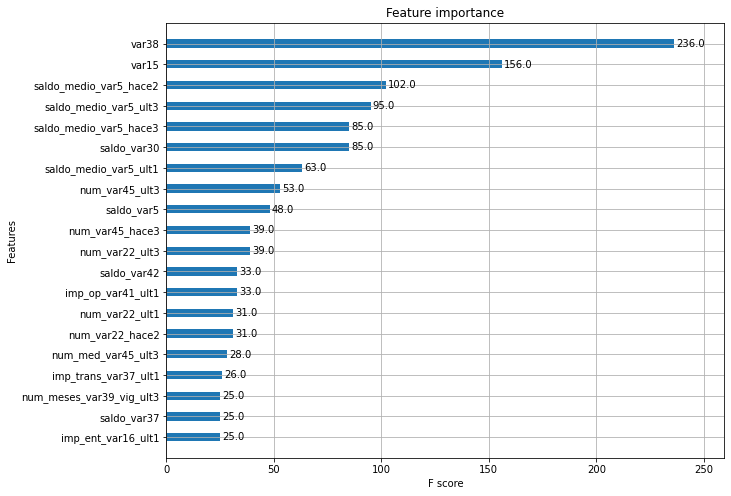

In [50]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

## LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [11]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set = [(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.82625	training's binary_logloss: 0.15523	valid_1's auc: 0.809814	valid_1's binary_logloss: 0.15774
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.833899	training's binary_logloss: 0.149581	valid_1's auc: 0.81222	valid_1's binary_logloss: 0.153275
[3]	training's auc: 0.841789	training's binary_logloss: 0.145416	valid_1's auc: 0.814833	valid_1's binary_logloss: 0.149999
[4]	training's auc: 0.847243	training's binary_logloss: 0.14212	valid_1's auc: 0.819406	valid_1's binary_logloss: 0.147524
[5]	training's auc: 0.849589	training's binary_logloss: 0.139438	valid_1's auc: 0.821869	valid_1's binary_logloss: 0.145464
[6]	training's auc: 0.853413	training's binary_logloss: 0.137254	valid_1's auc: 0.820878	valid_1's binary_logloss: 0.143973
[7]	training's auc: 0.85551	training's binary_logloss: 0.1354	valid_1's auc: 0.821815	valid_1's binary_logloss: 0.142746
[8]	training's auc: 0.858698	training's binary_logloss: 0.133561	valid_1's auc

[75]	training's auc: 0.928639	training's binary_logloss: 0.104167	valid_1's auc: 0.83094	valid_1's binary_logloss: 0.135819
[76]	training's auc: 0.928812	training's binary_logloss: 0.104032	valid_1's auc: 0.831078	valid_1's binary_logloss: 0.135819
[77]	training's auc: 0.929094	training's binary_logloss: 0.103841	valid_1's auc: 0.831173	valid_1's binary_logloss: 0.135831
[78]	training's auc: 0.929304	training's binary_logloss: 0.103661	valid_1's auc: 0.831108	valid_1's binary_logloss: 0.135854
[79]	training's auc: 0.929558	training's binary_logloss: 0.103444	valid_1's auc: 0.830932	valid_1's binary_logloss: 0.135942
[80]	training's auc: 0.930062	training's binary_logloss: 0.103185	valid_1's auc: 0.831212	valid_1's binary_logloss: 0.135846
[81]	training's auc: 0.93021	training's binary_logloss: 0.103035	valid_1's auc: 0.831221	valid_1's binary_logloss: 0.13587
[82]	training's auc: 0.930873	training's binary_logloss: 0.102757	valid_1's auc: 0.831112	valid_1's binary_logloss: 0.135917
[83

In [17]:
lgbm_search_space = {'num_leaves':hp.quniform('num_leaves',32,64,1),
                    'max_depth':hp.quniform('max_depth',100,160,1),
                    'min_child_weight':hp.quniform('min_child_weight',60,100,1),
                    'subsample':hp.uniform('subsample',0.7,1),
                    'learning_rate':hp.uniform('learning_rate',0.01,0.2)
                    }

In [18]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# fmin()에서 호출 시 search_space 값으로 XGBClassifier 교차 검증 학습 후 -1*roc_auc 평균 값을 반환
def objective_func(search_space):
    lgbm_clf = LGBMClassifier(n_estimators=100, num_leaves=int(search_space['num_leaves']),
                              max_depth=int(search_space['max_depth']),
                           min_child_weight=int(search_space['min_child_weight']),
                           subsample=search_space['subsample'],
                           learning_rate=search_space['learning_rate'])
    
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold 방식 적용
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc',
                   eval_set=[(X_tr, y_tr),(X_val,y_val)])
        
        # 1로 예측한 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담기
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:,1])
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc 값의 평균값을 반환하되, HyperOpt는 목적함수의 최솟값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환
    return -1*np.mean(roc_auc_list)

In [19]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출
best = fmin(fn=objective_func,
           space=lgbm_search_space,
           algo=tpe.suggest,
           max_evals=50, # 최대 반복 횟수를 지정
           trials=trials, rstate=np.random.default_rng(seed=30))

print('best:',best)

[1]	training's auc: 0.82174	training's binary_logloss: 0.162826	valid_1's auc: 0.802429	valid_1's binary_logloss: 0.163847
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.826234	training's binary_logloss: 0.161252	valid_1's auc: 0.807122	valid_1's binary_logloss: 0.162413
[3]	training's auc: 0.825382	training's binary_logloss: 0.159831	valid_1's auc: 0.806778	valid_1's binary_logloss: 0.161123
[4]	training's auc: 0.827407	training's binary_logloss: 0.158506	valid_1's auc: 0.808767	valid_1's binary_logloss: 0.159913
[5]	training's auc: 0.826996	training's binary_logloss: 0.157291	valid_1's auc: 0.8085	valid_1's binary_logloss: 0.15881
[6]	training's auc: 0.827723	training's binary_logloss: 0.156162	valid_1's auc: 0.808377	valid_1's binary_logloss: 0.157794
[7]	training's auc: 0.827996	training's binary_logloss: 0.155137	valid_1's auc: 0.808674	valid_1's binary_logloss: 0.156877
[8]	training's auc: 0.828443	training's binary_logloss:

[66]	training's auc: 0.83937	training's binary_logloss: 0.135274	valid_1's auc: 0.819865	valid_1's binary_logloss: 0.139709
[67]	training's auc: 0.839413	training's binary_logloss: 0.135183	valid_1's auc: 0.819924	valid_1's binary_logloss: 0.139646
[68]	training's auc: 0.839454	training's binary_logloss: 0.135085	valid_1's auc: 0.819959	valid_1's binary_logloss: 0.139578
[69]	training's auc: 0.839519	training's binary_logloss: 0.13499	valid_1's auc: 0.820097	valid_1's binary_logloss: 0.13951
[70]	training's auc: 0.839603	training's binary_logloss: 0.134897	valid_1's auc: 0.820136	valid_1's binary_logloss: 0.139447
[71]	training's auc: 0.839656	training's binary_logloss: 0.134809	valid_1's auc: 0.820128	valid_1's binary_logloss: 0.139382
[72]	training's auc: 0.839697	training's binary_logloss: 0.134715	valid_1's auc: 0.820227	valid_1's binary_logloss: 0.1393
[73]	training's auc: 0.839808	training's binary_logloss: 0.134625	valid_1's auc: 0.820404	valid_1's binary_logloss: 0.139226
[74]	

[29]	training's auc: 0.832602	training's binary_logloss: 0.145049	valid_1's auc: 0.827421	valid_1's binary_logloss: 0.140132
[30]	training's auc: 0.832929	training's binary_logloss: 0.144683	valid_1's auc: 0.827829	valid_1's binary_logloss: 0.139818
[31]	training's auc: 0.833264	training's binary_logloss: 0.144334	valid_1's auc: 0.827911	valid_1's binary_logloss: 0.139519
[32]	training's auc: 0.83354	training's binary_logloss: 0.144003	valid_1's auc: 0.828109	valid_1's binary_logloss: 0.139235
[33]	training's auc: 0.833606	training's binary_logloss: 0.143687	valid_1's auc: 0.828713	valid_1's binary_logloss: 0.138966
[34]	training's auc: 0.833886	training's binary_logloss: 0.143386	valid_1's auc: 0.828738	valid_1's binary_logloss: 0.138709
[35]	training's auc: 0.833971	training's binary_logloss: 0.143099	valid_1's auc: 0.828633	valid_1's binary_logloss: 0.138471
[36]	training's auc: 0.834056	training's binary_logloss: 0.142824	valid_1's auc: 0.828775	valid_1's binary_logloss: 0.138237
[

[95]	training's auc: 0.839899	training's binary_logloss: 0.135378	valid_1's auc: 0.830441	valid_1's binary_logloss: 0.132574
[96]	training's auc: 0.839976	training's binary_logloss: 0.135323	valid_1's auc: 0.830436	valid_1's binary_logloss: 0.132545
[97]	training's auc: 0.840035	training's binary_logloss: 0.135269	valid_1's auc: 0.830412	valid_1's binary_logloss: 0.132516
[98]	training's auc: 0.840219	training's binary_logloss: 0.135211	valid_1's auc: 0.83047	valid_1's binary_logloss: 0.132493
[99]	training's auc: 0.840324	training's binary_logloss: 0.135163	valid_1's auc: 0.830431	valid_1's binary_logloss: 0.132476
[100]	training's auc: 0.840471	training's binary_logloss: 0.135104	valid_1's auc: 0.830491	valid_1's binary_logloss: 0.132446
Did not meet early stopping. Best iteration is:                                 
[100]	training's auc: 0.840471	training's binary_logloss: 0.135104	valid_1's auc: 0.830491	valid_1's binary_logloss: 0.132446
[1]	training's auc: 0.819298	training's bin

[58]	training's auc: 0.833822	training's binary_logloss: 0.136063	valid_1's auc: 0.830058	valid_1's binary_logloss: 0.140303
[59]	training's auc: 0.833798	training's binary_logloss: 0.135941	valid_1's auc: 0.829947	valid_1's binary_logloss: 0.140208
[60]	training's auc: 0.833888	training's binary_logloss: 0.13582	valid_1's auc: 0.830048	valid_1's binary_logloss: 0.140112
[61]	training's auc: 0.834033	training's binary_logloss: 0.135703	valid_1's auc: 0.830229	valid_1's binary_logloss: 0.140021
[62]	training's auc: 0.834119	training's binary_logloss: 0.135586	valid_1's auc: 0.830283	valid_1's binary_logloss: 0.139912
[63]	training's auc: 0.834154	training's binary_logloss: 0.135481	valid_1's auc: 0.830251	valid_1's binary_logloss: 0.139834
[64]	training's auc: 0.834331	training's binary_logloss: 0.135384	valid_1's auc: 0.830385	valid_1's binary_logloss: 0.139749
[65]	training's auc: 0.834398	training's binary_logloss: 0.135282	valid_1's auc: 0.830541	valid_1's binary_logloss: 0.139666
[

[21]	training's auc: 0.844457	training's binary_logloss: 0.131977	valid_1's auc: 0.824372	valid_1's binary_logloss: 0.137447
[22]	training's auc: 0.845112	training's binary_logloss: 0.131755	valid_1's auc: 0.824935	valid_1's binary_logloss: 0.137297
[23]	training's auc: 0.845488	training's binary_logloss: 0.131583	valid_1's auc: 0.825128	valid_1's binary_logloss: 0.137209
[24]	training's auc: 0.846049	training's binary_logloss: 0.131439	valid_1's auc: 0.825585	valid_1's binary_logloss: 0.137097
[25]	training's auc: 0.846446	training's binary_logloss: 0.131303	valid_1's auc: 0.825548	valid_1's binary_logloss: 0.137057
[26]	training's auc: 0.846994	training's binary_logloss: 0.13116	valid_1's auc: 0.826082	valid_1's binary_logloss: 0.136972
[27]	training's auc: 0.847267	training's binary_logloss: 0.13103	valid_1's auc: 0.826546	valid_1's binary_logloss: 0.13689
[28]	training's auc: 0.847534	training's binary_logloss: 0.130925	valid_1's auc: 0.826917	valid_1's binary_logloss: 0.136799
[29

[87]	training's auc: 0.863584	training's binary_logloss: 0.126468	valid_1's auc: 0.82987	valid_1's binary_logloss: 0.1363
[88]	training's auc: 0.863794	training's binary_logloss: 0.126412	valid_1's auc: 0.829847	valid_1's binary_logloss: 0.136301
[89]	training's auc: 0.863927	training's binary_logloss: 0.12636	valid_1's auc: 0.829925	valid_1's binary_logloss: 0.136285
[90]	training's auc: 0.864191	training's binary_logloss: 0.126285	valid_1's auc: 0.829986	valid_1's binary_logloss: 0.136267
[91]	training's auc: 0.864385	training's binary_logloss: 0.126235	valid_1's auc: 0.829874	valid_1's binary_logloss: 0.136282
[92]	training's auc: 0.864496	training's binary_logloss: 0.126192	valid_1's auc: 0.829789	valid_1's binary_logloss: 0.136304
[93]	training's auc: 0.864701	training's binary_logloss: 0.126145	valid_1's auc: 0.829846	valid_1's binary_logloss: 0.136294
[94]	training's auc: 0.864873	training's binary_logloss: 0.126102	valid_1's auc: 0.829957	valid_1's binary_logloss: 0.136266
[95]

[55]	training's auc: 0.855699	training's binary_logloss: 0.130251	valid_1's auc: 0.833069	valid_1's binary_logloss: 0.131493
[56]	training's auc: 0.855969	training's binary_logloss: 0.130174	valid_1's auc: 0.833026	valid_1's binary_logloss: 0.131509
[57]	training's auc: 0.856235	training's binary_logloss: 0.130113	valid_1's auc: 0.832994	valid_1's binary_logloss: 0.131534
[58]	training's auc: 0.856483	training's binary_logloss: 0.130048	valid_1's auc: 0.833083	valid_1's binary_logloss: 0.131522
[59]	training's auc: 0.856826	training's binary_logloss: 0.12996	valid_1's auc: 0.833217	valid_1's binary_logloss: 0.131536
[60]	training's auc: 0.857091	training's binary_logloss: 0.129881	valid_1's auc: 0.833104	valid_1's binary_logloss: 0.131543
[61]	training's auc: 0.85732	training's binary_logloss: 0.129821	valid_1's auc: 0.833062	valid_1's binary_logloss: 0.131534
[62]	training's auc: 0.85757	training's binary_logloss: 0.129767	valid_1's auc: 0.833015	valid_1's binary_logloss: 0.131513
[63

[39]	training's auc: 0.849737	training's binary_logloss: 0.129319	valid_1's auc: 0.835706	valid_1's binary_logloss: 0.136448
[40]	training's auc: 0.849974	training's binary_logloss: 0.129232	valid_1's auc: 0.835646	valid_1's binary_logloss: 0.136435
[41]	training's auc: 0.850338	training's binary_logloss: 0.129143	valid_1's auc: 0.835704	valid_1's binary_logloss: 0.136433
[42]	training's auc: 0.850685	training's binary_logloss: 0.129053	valid_1's auc: 0.835958	valid_1's binary_logloss: 0.136387
[43]	training's auc: 0.851041	training's binary_logloss: 0.128957	valid_1's auc: 0.836015	valid_1's binary_logloss: 0.13637
[44]	training's auc: 0.85139	training's binary_logloss: 0.128877	valid_1's auc: 0.836134	valid_1's binary_logloss: 0.136344
[45]	training's auc: 0.851638	training's binary_logloss: 0.128787	valid_1's auc: 0.836008	valid_1's binary_logloss: 0.136344
[46]	training's auc: 0.851912	training's binary_logloss: 0.128701	valid_1's auc: 0.835817	valid_1's binary_logloss: 0.136374
[4

[6]	training's auc: 0.830133	training's binary_logloss: 0.148021	valid_1's auc: 0.8112	valid_1's binary_logloss: 0.150594
[7]	training's auc: 0.830416	training's binary_logloss: 0.146533	valid_1's auc: 0.811653	valid_1's binary_logloss: 0.149252
[8]	training's auc: 0.830599	training's binary_logloss: 0.145239	valid_1's auc: 0.811827	valid_1's binary_logloss: 0.148116
[9]	training's auc: 0.831517	training's binary_logloss: 0.144023	valid_1's auc: 0.812283	valid_1's binary_logloss: 0.147059
[10]	training's auc: 0.831868	training's binary_logloss: 0.142956	valid_1's auc: 0.812436	valid_1's binary_logloss: 0.146113
[11]	training's auc: 0.831819	training's binary_logloss: 0.142028	valid_1's auc: 0.812616	valid_1's binary_logloss: 0.145294
[12]	training's auc: 0.83281	training's binary_logloss: 0.141228	valid_1's auc: 0.813179	valid_1's binary_logloss: 0.144585
[13]	training's auc: 0.833422	training's binary_logloss: 0.140469	valid_1's auc: 0.813904	valid_1's binary_logloss: 0.143939
[14]	tr

[72]	training's auc: 0.847038	training's binary_logloss: 0.131044	valid_1's auc: 0.827364	valid_1's binary_logloss: 0.136851
[73]	training's auc: 0.847217	training's binary_logloss: 0.131003	valid_1's auc: 0.827472	valid_1's binary_logloss: 0.136858
[74]	training's auc: 0.847349	training's binary_logloss: 0.130959	valid_1's auc: 0.827702	valid_1's binary_logloss: 0.136813
[75]	training's auc: 0.847464	training's binary_logloss: 0.130909	valid_1's auc: 0.82778	valid_1's binary_logloss: 0.136784
[76]	training's auc: 0.847577	training's binary_logloss: 0.130875	valid_1's auc: 0.827943	valid_1's binary_logloss: 0.13675
[77]	training's auc: 0.847677	training's binary_logloss: 0.130842	valid_1's auc: 0.827939	valid_1's binary_logloss: 0.136728
[78]	training's auc: 0.847826	training's binary_logloss: 0.130787	valid_1's auc: 0.82817	valid_1's binary_logloss: 0.136663
[79]	training's auc: 0.848015	training's binary_logloss: 0.130745	valid_1's auc: 0.828294	valid_1's binary_logloss: 0.136663
[80

[35]	training's auc: 0.836554	training's binary_logloss: 0.135983	valid_1's auc: 0.829729	valid_1's binary_logloss: 0.132718
[36]	training's auc: 0.837229	training's binary_logloss: 0.135829	valid_1's auc: 0.829743	valid_1's binary_logloss: 0.132646
[37]	training's auc: 0.837859	training's binary_logloss: 0.135663	valid_1's auc: 0.829837	valid_1's binary_logloss: 0.132555
[38]	training's auc: 0.83842	training's binary_logloss: 0.135509	valid_1's auc: 0.829822	valid_1's binary_logloss: 0.13248
[39]	training's auc: 0.838822	training's binary_logloss: 0.135372	valid_1's auc: 0.829835	valid_1's binary_logloss: 0.132418
[40]	training's auc: 0.839122	training's binary_logloss: 0.135255	valid_1's auc: 0.83003	valid_1's binary_logloss: 0.132378
[41]	training's auc: 0.839339	training's binary_logloss: 0.135139	valid_1's auc: 0.830331	valid_1's binary_logloss: 0.132305
[42]	training's auc: 0.839544	training's binary_logloss: 0.135042	valid_1's auc: 0.830271	valid_1's binary_logloss: 0.132282
[43

Did not meet early stopping. Best iteration is:                                 
[100]	training's auc: 0.85062	training's binary_logloss: 0.131685	valid_1's auc: 0.833244	valid_1's binary_logloss: 0.131447
[1]	training's auc: 0.81679	training's binary_logloss: 0.158911	valid_1's auc: 0.81392	valid_1's binary_logloss: 0.164045
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.818553	training's binary_logloss: 0.155728	valid_1's auc: 0.814482	valid_1's binary_logloss: 0.160647
[3]	training's auc: 0.81958	training's binary_logloss: 0.153188	valid_1's auc: 0.8148	valid_1's binary_logloss: 0.157961
[4]	training's auc: 0.820361	training's binary_logloss: 0.15109	valid_1's auc: 0.815678	valid_1's binary_logloss: 0.155755
[5]	training's auc: 0.822603	training's binary_logloss: 0.149237	valid_1's auc: 0.818241	valid_1's binary_logloss: 0.153787
[6]	training's auc: 0.823153	training's binary_logloss: 0.147617	valid_1's auc: 0.818907	valid_1's 

[64]	training's auc: 0.842952	training's binary_logloss: 0.131094	valid_1's auc: 0.834546	valid_1's binary_logloss: 0.136629
[65]	training's auc: 0.84326	training's binary_logloss: 0.131023	valid_1's auc: 0.834546	valid_1's binary_logloss: 0.136602
[66]	training's auc: 0.843327	training's binary_logloss: 0.130981	valid_1's auc: 0.834512	valid_1's binary_logloss: 0.136595
[67]	training's auc: 0.843553	training's binary_logloss: 0.130929	valid_1's auc: 0.834523	valid_1's binary_logloss: 0.136606
[68]	training's auc: 0.843662	training's binary_logloss: 0.13089	valid_1's auc: 0.834444	valid_1's binary_logloss: 0.13661
[69]	training's auc: 0.843861	training's binary_logloss: 0.130845	valid_1's auc: 0.834533	valid_1's binary_logloss: 0.136578
[70]	training's auc: 0.844066	training's binary_logloss: 0.130797	valid_1's auc: 0.834554	valid_1's binary_logloss: 0.136573
[71]	training's auc: 0.844186	training's binary_logloss: 0.130759	valid_1's auc: 0.834566	valid_1's binary_logloss: 0.136559
[72

[27]	training's auc: 0.845381	training's binary_logloss: 0.131724	valid_1's auc: 0.825934	valid_1's binary_logloss: 0.13719
[28]	training's auc: 0.845743	training's binary_logloss: 0.131589	valid_1's auc: 0.826529	valid_1's binary_logloss: 0.137073
[29]	training's auc: 0.846125	training's binary_logloss: 0.131431	valid_1's auc: 0.826629	valid_1's binary_logloss: 0.136983
[30]	training's auc: 0.846306	training's binary_logloss: 0.131322	valid_1's auc: 0.826942	valid_1's binary_logloss: 0.13693
[31]	training's auc: 0.846618	training's binary_logloss: 0.131219	valid_1's auc: 0.82721	valid_1's binary_logloss: 0.136836
[32]	training's auc: 0.847029	training's binary_logloss: 0.131087	valid_1's auc: 0.827701	valid_1's binary_logloss: 0.136775
[33]	training's auc: 0.847711	training's binary_logloss: 0.130958	valid_1's auc: 0.827866	valid_1's binary_logloss: 0.136715
[34]	training's auc: 0.848107	training's binary_logloss: 0.130845	valid_1's auc: 0.828039	valid_1's binary_logloss: 0.136651
[35

[93]	training's auc: 0.86167	training's binary_logloss: 0.127005	valid_1's auc: 0.830664	valid_1's binary_logloss: 0.136041
[94]	training's auc: 0.861865	training's binary_logloss: 0.126963	valid_1's auc: 0.83074	valid_1's binary_logloss: 0.136029
[95]	training's auc: 0.861954	training's binary_logloss: 0.126914	valid_1's auc: 0.830869	valid_1's binary_logloss: 0.136002
[96]	training's auc: 0.86209	training's binary_logloss: 0.126879	valid_1's auc: 0.830663	valid_1's binary_logloss: 0.136055
[97]	training's auc: 0.862243	training's binary_logloss: 0.126838	valid_1's auc: 0.830618	valid_1's binary_logloss: 0.136055
[98]	training's auc: 0.862368	training's binary_logloss: 0.126803	valid_1's auc: 0.830563	valid_1's binary_logloss: 0.136042
[99]	training's auc: 0.862525	training's binary_logloss: 0.126762	valid_1's auc: 0.830631	valid_1's binary_logloss: 0.13603
[100]	training's auc: 0.862651	training's binary_logloss: 0.126712	valid_1's auc: 0.830723	valid_1's binary_logloss: 0.136013
Did

[56]	training's auc: 0.853789	training's binary_logloss: 0.130821	valid_1's auc: 0.832268	valid_1's binary_logloss: 0.131746
[57]	training's auc: 0.854038	training's binary_logloss: 0.130757	valid_1's auc: 0.832201	valid_1's binary_logloss: 0.131745
[58]	training's auc: 0.854252	training's binary_logloss: 0.130692	valid_1's auc: 0.832166	valid_1's binary_logloss: 0.131766
[59]	training's auc: 0.854471	training's binary_logloss: 0.130631	valid_1's auc: 0.832016	valid_1's binary_logloss: 0.131793
[60]	training's auc: 0.854806	training's binary_logloss: 0.130551	valid_1's auc: 0.832278	valid_1's binary_logloss: 0.131782
[61]	training's auc: 0.855073	training's binary_logloss: 0.130486	valid_1's auc: 0.832382	valid_1's binary_logloss: 0.131752
[62]	training's auc: 0.855383	training's binary_logloss: 0.130407	valid_1's auc: 0.832578	valid_1's binary_logloss: 0.131721
[63]	training's auc: 0.855644	training's binary_logloss: 0.130329	valid_1's auc: 0.832723	valid_1's binary_logloss: 0.131696


[19]	training's auc: 0.838949	training's binary_logloss: 0.133177	valid_1's auc: 0.83406	valid_1's binary_logloss: 0.137959
[20]	training's auc: 0.839264	training's binary_logloss: 0.132931	valid_1's auc: 0.833872	valid_1's binary_logloss: 0.137822
[21]	training's auc: 0.839781	training's binary_logloss: 0.132666	valid_1's auc: 0.833602	valid_1's binary_logloss: 0.137735
[22]	training's auc: 0.840255	training's binary_logloss: 0.132443	valid_1's auc: 0.833901	valid_1's binary_logloss: 0.137559
[23]	training's auc: 0.840679	training's binary_logloss: 0.132232	valid_1's auc: 0.834077	valid_1's binary_logloss: 0.137425
[24]	training's auc: 0.841068	training's binary_logloss: 0.132024	valid_1's auc: 0.834494	valid_1's binary_logloss: 0.137235
[25]	training's auc: 0.841318	training's binary_logloss: 0.131849	valid_1's auc: 0.834507	valid_1's binary_logloss: 0.137127
[26]	training's auc: 0.841797	training's binary_logloss: 0.131652	valid_1's auc: 0.834649	valid_1's binary_logloss: 0.137029
[

[85]	training's auc: 0.858726	training's binary_logloss: 0.126822	valid_1's auc: 0.836413	valid_1's binary_logloss: 0.136223
[86]	training's auc: 0.858895	training's binary_logloss: 0.126779	valid_1's auc: 0.836499	valid_1's binary_logloss: 0.13621
[87]	training's auc: 0.859099	training's binary_logloss: 0.126722	valid_1's auc: 0.836607	valid_1's binary_logloss: 0.13621
[88]	training's auc: 0.859245	training's binary_logloss: 0.126679	valid_1's auc: 0.836467	valid_1's binary_logloss: 0.13624
[89]	training's auc: 0.859425	training's binary_logloss: 0.126617	valid_1's auc: 0.836494	valid_1's binary_logloss: 0.13624
[90]	training's auc: 0.859569	training's binary_logloss: 0.126565	valid_1's auc: 0.836617	valid_1's binary_logloss: 0.136224
[91]	training's auc: 0.859823	training's binary_logloss: 0.126505	valid_1's auc: 0.836603	valid_1's binary_logloss: 0.136222
Early stopping, best iteration is:                                              
[61]	training's auc: 0.853787	training's binary_

[57]	training's auc: 0.842705	training's binary_logloss: 0.132249	valid_1's auc: 0.824302	valid_1's binary_logloss: 0.137451
[58]	training's auc: 0.842878	training's binary_logloss: 0.132195	valid_1's auc: 0.824501	valid_1's binary_logloss: 0.137418
[59]	training's auc: 0.843128	training's binary_logloss: 0.132133	valid_1's auc: 0.82494	valid_1's binary_logloss: 0.137366
[60]	training's auc: 0.843261	training's binary_logloss: 0.132087	valid_1's auc: 0.825076	valid_1's binary_logloss: 0.137342
[61]	training's auc: 0.843462	training's binary_logloss: 0.132031	valid_1's auc: 0.825308	valid_1's binary_logloss: 0.137305
[62]	training's auc: 0.843734	training's binary_logloss: 0.131978	valid_1's auc: 0.825314	valid_1's binary_logloss: 0.137294
[63]	training's auc: 0.843831	training's binary_logloss: 0.131935	valid_1's auc: 0.825346	valid_1's binary_logloss: 0.137283
[64]	training's auc: 0.843985	training's binary_logloss: 0.131888	valid_1's auc: 0.825574	valid_1's binary_logloss: 0.137242
[

[20]	training's auc: 0.830076	training's binary_logloss: 0.140657	valid_1's auc: 0.826378	valid_1's binary_logloss: 0.136207
[21]	training's auc: 0.830376	training's binary_logloss: 0.140269	valid_1's auc: 0.826459	valid_1's binary_logloss: 0.135871
[22]	training's auc: 0.831025	training's binary_logloss: 0.139891	valid_1's auc: 0.826986	valid_1's binary_logloss: 0.135555
[23]	training's auc: 0.831351	training's binary_logloss: 0.139568	valid_1's auc: 0.827171	valid_1's binary_logloss: 0.13527
[24]	training's auc: 0.831663	training's binary_logloss: 0.139268	valid_1's auc: 0.827362	valid_1's binary_logloss: 0.135023
[25]	training's auc: 0.832168	training's binary_logloss: 0.138986	valid_1's auc: 0.827709	valid_1's binary_logloss: 0.13479
[26]	training's auc: 0.832361	training's binary_logloss: 0.138699	valid_1's auc: 0.828073	valid_1's binary_logloss: 0.134576
[27]	training's auc: 0.832499	training's binary_logloss: 0.138447	valid_1's auc: 0.8283	valid_1's binary_logloss: 0.13435
[28]	

[86]	training's auc: 0.846074	training's binary_logloss: 0.13299	valid_1's auc: 0.831272	valid_1's binary_logloss: 0.131848
[87]	training's auc: 0.846198	training's binary_logloss: 0.132955	valid_1's auc: 0.831225	valid_1's binary_logloss: 0.131855
[88]	training's auc: 0.846331	training's binary_logloss: 0.132914	valid_1's auc: 0.831231	valid_1's binary_logloss: 0.131851
[89]	training's auc: 0.846491	training's binary_logloss: 0.132887	valid_1's auc: 0.831235	valid_1's binary_logloss: 0.131852
[90]	training's auc: 0.846576	training's binary_logloss: 0.132851	valid_1's auc: 0.831202	valid_1's binary_logloss: 0.131849
[91]	training's auc: 0.846757	training's binary_logloss: 0.13281	valid_1's auc: 0.831279	valid_1's binary_logloss: 0.131832
[92]	training's auc: 0.846881	training's binary_logloss: 0.132766	valid_1's auc: 0.831436	valid_1's binary_logloss: 0.131799
[93]	training's auc: 0.847021	training's binary_logloss: 0.132729	valid_1's auc: 0.831362	valid_1's binary_logloss: 0.131806
[9

[49]	training's auc: 0.837319	training's binary_logloss: 0.132762	valid_1's auc: 0.833463	valid_1's binary_logloss: 0.137231
[50]	training's auc: 0.837477	training's binary_logloss: 0.13268	valid_1's auc: 0.83346	valid_1's binary_logloss: 0.13719
[51]	training's auc: 0.837804	training's binary_logloss: 0.132609	valid_1's auc: 0.833656	valid_1's binary_logloss: 0.137127
[52]	training's auc: 0.838034	training's binary_logloss: 0.132537	valid_1's auc: 0.83376	valid_1's binary_logloss: 0.137069
[53]	training's auc: 0.838289	training's binary_logloss: 0.132452	valid_1's auc: 0.833892	valid_1's binary_logloss: 0.137016
[54]	training's auc: 0.83856	training's binary_logloss: 0.132365	valid_1's auc: 0.833941	valid_1's binary_logloss: 0.136976
[55]	training's auc: 0.838739	training's binary_logloss: 0.132301	valid_1's auc: 0.834087	valid_1's binary_logloss: 0.136936
[56]	training's auc: 0.838916	training's binary_logloss: 0.132228	valid_1's auc: 0.834193	valid_1's binary_logloss: 0.136879
[57]	

[12]	training's auc: 0.829286	training's binary_logloss: 0.15531	valid_1's auc: 0.80948	valid_1's binary_logloss: 0.157032
[13]	training's auc: 0.829181	training's binary_logloss: 0.154749	valid_1's auc: 0.809398	valid_1's binary_logloss: 0.156534
[14]	training's auc: 0.82971	training's binary_logloss: 0.154203	valid_1's auc: 0.809694	valid_1's binary_logloss: 0.156052
[15]	training's auc: 0.829754	training's binary_logloss: 0.153669	valid_1's auc: 0.809783	valid_1's binary_logloss: 0.155575
[16]	training's auc: 0.829845	training's binary_logloss: 0.153156	valid_1's auc: 0.810165	valid_1's binary_logloss: 0.155122
[17]	training's auc: 0.829657	training's binary_logloss: 0.152662	valid_1's auc: 0.810111	valid_1's binary_logloss: 0.154687
[18]	training's auc: 0.829788	training's binary_logloss: 0.152195	valid_1's auc: 0.810174	valid_1's binary_logloss: 0.154275
[19]	training's auc: 0.829793	training's binary_logloss: 0.15175	valid_1's auc: 0.810716	valid_1's binary_logloss: 0.153885
[20]

[78]	training's auc: 0.836715	training's binary_logloss: 0.138181	valid_1's auc: 0.817227	valid_1's binary_logloss: 0.142031
[79]	training's auc: 0.836706	training's binary_logloss: 0.138079	valid_1's auc: 0.81729	valid_1's binary_logloss: 0.141947
[80]	training's auc: 0.836717	training's binary_logloss: 0.137978	valid_1's auc: 0.817226	valid_1's binary_logloss: 0.14187
[81]	training's auc: 0.836725	training's binary_logloss: 0.137879	valid_1's auc: 0.817323	valid_1's binary_logloss: 0.14179
[82]	training's auc: 0.836767	training's binary_logloss: 0.137778	valid_1's auc: 0.81739	valid_1's binary_logloss: 0.141705
[83]	training's auc: 0.836805	training's binary_logloss: 0.137681	valid_1's auc: 0.817492	valid_1's binary_logloss: 0.14162
[84]	training's auc: 0.836895	training's binary_logloss: 0.137584	valid_1's auc: 0.817528	valid_1's binary_logloss: 0.141541
[85]	training's auc: 0.836941	training's binary_logloss: 0.137489	valid_1's auc: 0.817562	valid_1's binary_logloss: 0.141466
[86]	

[41]	training's auc: 0.830971	training's binary_logloss: 0.147259	valid_1's auc: 0.827373	valid_1's binary_logloss: 0.142022
[42]	training's auc: 0.831234	training's binary_logloss: 0.147016	valid_1's auc: 0.827372	valid_1's binary_logloss: 0.141813
[43]	training's auc: 0.831323	training's binary_logloss: 0.146773	valid_1's auc: 0.827282	valid_1's binary_logloss: 0.141597
[44]	training's auc: 0.831542	training's binary_logloss: 0.146543	valid_1's auc: 0.827035	valid_1's binary_logloss: 0.1414
[45]	training's auc: 0.831633	training's binary_logloss: 0.146321	valid_1's auc: 0.827145	valid_1's binary_logloss: 0.141205
[46]	training's auc: 0.831753	training's binary_logloss: 0.146096	valid_1's auc: 0.82727	valid_1's binary_logloss: 0.141005
[47]	training's auc: 0.831919	training's binary_logloss: 0.145884	valid_1's auc: 0.827217	valid_1's binary_logloss: 0.140823
[48]	training's auc: 0.831995	training's binary_logloss: 0.145679	valid_1's auc: 0.827283	valid_1's binary_logloss: 0.140644
[49

[4]	training's auc: 0.820047	training's binary_logloss: 0.15962	valid_1's auc: 0.812474	valid_1's binary_logloss: 0.164809
[5]	training's auc: 0.819833	training's binary_logloss: 0.158869	valid_1's auc: 0.812515	valid_1's binary_logloss: 0.164014
[6]	training's auc: 0.820101	training's binary_logloss: 0.15816	valid_1's auc: 0.813071	valid_1's binary_logloss: 0.16326
[7]	training's auc: 0.820152	training's binary_logloss: 0.157479	valid_1's auc: 0.812993	valid_1's binary_logloss: 0.162541
[8]	training's auc: 0.820833	training's binary_logloss: 0.156829	valid_1's auc: 0.813448	valid_1's binary_logloss: 0.161857
[9]	training's auc: 0.822093	training's binary_logloss: 0.156192	valid_1's auc: 0.814573	valid_1's binary_logloss: 0.161185
[10]	training's auc: 0.822655	training's binary_logloss: 0.155583	valid_1's auc: 0.814579	valid_1's binary_logloss: 0.160546
[11]	training's auc: 0.823049	training's binary_logloss: 0.154999	valid_1's auc: 0.814829	valid_1's binary_logloss: 0.159934
[12]	trai

[70]	training's auc: 0.831943	training's binary_logloss: 0.139041	valid_1's auc: 0.828472	valid_1's binary_logloss: 0.143175
[71]	training's auc: 0.831919	training's binary_logloss: 0.138918	valid_1's auc: 0.828507	valid_1's binary_logloss: 0.14305
[72]	training's auc: 0.831869	training's binary_logloss: 0.138797	valid_1's auc: 0.82845	valid_1's binary_logloss: 0.142939
[73]	training's auc: 0.831877	training's binary_logloss: 0.13868	valid_1's auc: 0.828543	valid_1's binary_logloss: 0.14282
[74]	training's auc: 0.831918	training's binary_logloss: 0.138567	valid_1's auc: 0.828582	valid_1's binary_logloss: 0.142707
[75]	training's auc: 0.831905	training's binary_logloss: 0.138455	valid_1's auc: 0.828594	valid_1's binary_logloss: 0.142595
[76]	training's auc: 0.831959	training's binary_logloss: 0.138343	valid_1's auc: 0.828552	valid_1's binary_logloss: 0.14249
[77]	training's auc: 0.831954	training's binary_logloss: 0.138235	valid_1's auc: 0.828555	valid_1's binary_logloss: 0.14238
[78]	t

[33]	training's auc: 0.847963	training's binary_logloss: 0.130741	valid_1's auc: 0.826809	valid_1's binary_logloss: 0.136852
[34]	training's auc: 0.848352	training's binary_logloss: 0.130632	valid_1's auc: 0.827315	valid_1's binary_logloss: 0.136753
[35]	training's auc: 0.848675	training's binary_logloss: 0.130541	valid_1's auc: 0.8274	valid_1's binary_logloss: 0.136761
[36]	training's auc: 0.849123	training's binary_logloss: 0.130423	valid_1's auc: 0.827684	valid_1's binary_logloss: 0.136707
[37]	training's auc: 0.849423	training's binary_logloss: 0.130346	valid_1's auc: 0.827864	valid_1's binary_logloss: 0.136667
[38]	training's auc: 0.84992	training's binary_logloss: 0.130236	valid_1's auc: 0.828113	valid_1's binary_logloss: 0.13661
[39]	training's auc: 0.850172	training's binary_logloss: 0.130175	valid_1's auc: 0.827987	valid_1's binary_logloss: 0.136615
[40]	training's auc: 0.850497	training's binary_logloss: 0.13008	valid_1's auc: 0.828231	valid_1's binary_logloss: 0.136543
[41]	

[99]	training's auc: 0.862498	training's binary_logloss: 0.126808	valid_1's auc: 0.830255	valid_1's binary_logloss: 0.136215
[100]	training's auc: 0.862624	training's binary_logloss: 0.126772	valid_1's auc: 0.830295	valid_1's binary_logloss: 0.136224
Did not meet early stopping. Best iteration is:                                 
[100]	training's auc: 0.862624	training's binary_logloss: 0.126772	valid_1's auc: 0.830295	valid_1's binary_logloss: 0.136224
[1]	training's auc: 0.817886	training's binary_logloss: 0.157575	valid_1's auc: 0.813223	valid_1's binary_logloss: 0.151695
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.822541	training's binary_logloss: 0.152565	valid_1's auc: 0.819046	valid_1's binary_logloss: 0.146895
[3]	training's auc: 0.827232	training's binary_logloss: 0.14897	valid_1's auc: 0.825002	valid_1's binary_logloss: 0.14354
[4]	training's auc: 0.829912	training's binary_logloss: 0.146219	valid_1's auc: 0.827743	va

[62]	training's auc: 0.855729	training's binary_logloss: 0.13021	valid_1's auc: 0.832922	valid_1's binary_logloss: 0.131577
[63]	training's auc: 0.855924	training's binary_logloss: 0.130119	valid_1's auc: 0.832643	valid_1's binary_logloss: 0.131608
[64]	training's auc: 0.856107	training's binary_logloss: 0.130061	valid_1's auc: 0.832598	valid_1's binary_logloss: 0.131602
[65]	training's auc: 0.856345	training's binary_logloss: 0.130001	valid_1's auc: 0.832414	valid_1's binary_logloss: 0.131621
[66]	training's auc: 0.85655	training's binary_logloss: 0.129942	valid_1's auc: 0.832402	valid_1's binary_logloss: 0.131631
[67]	training's auc: 0.856732	training's binary_logloss: 0.129884	valid_1's auc: 0.832423	valid_1's binary_logloss: 0.131646
[68]	training's auc: 0.856955	training's binary_logloss: 0.129838	valid_1's auc: 0.832403	valid_1's binary_logloss: 0.131641
[69]	training's auc: 0.857062	training's binary_logloss: 0.129779	valid_1's auc: 0.832476	valid_1's binary_logloss: 0.131637
[7

[54]	training's auc: 0.851324	training's binary_logloss: 0.128722	valid_1's auc: 0.834608	valid_1's binary_logloss: 0.136408
[55]	training's auc: 0.851617	training's binary_logloss: 0.128659	valid_1's auc: 0.834615	valid_1's binary_logloss: 0.136412
[56]	training's auc: 0.851942	training's binary_logloss: 0.128574	valid_1's auc: 0.834701	valid_1's binary_logloss: 0.136397
[57]	training's auc: 0.852231	training's binary_logloss: 0.128513	valid_1's auc: 0.834867	valid_1's binary_logloss: 0.136375
[58]	training's auc: 0.852397	training's binary_logloss: 0.128443	valid_1's auc: 0.834778	valid_1's binary_logloss: 0.136384
[59]	training's auc: 0.852639	training's binary_logloss: 0.128362	valid_1's auc: 0.83462	valid_1's binary_logloss: 0.136424
[60]	training's auc: 0.852849	training's binary_logloss: 0.1283	valid_1's auc: 0.834731	valid_1's binary_logloss: 0.136429
[61]	training's auc: 0.853146	training's binary_logloss: 0.128216	valid_1's auc: 0.834536	valid_1's binary_logloss: 0.136475
[62

[40]	training's auc: 0.853676	training's binary_logloss: 0.129133	valid_1's auc: 0.830385	valid_1's binary_logloss: 0.136158
[41]	training's auc: 0.85389	training's binary_logloss: 0.129056	valid_1's auc: 0.830375	valid_1's binary_logloss: 0.136149
[42]	training's auc: 0.854246	training's binary_logloss: 0.128968	valid_1's auc: 0.83028	valid_1's binary_logloss: 0.136166
[43]	training's auc: 0.854703	training's binary_logloss: 0.128859	valid_1's auc: 0.830683	valid_1's binary_logloss: 0.136098
[44]	training's auc: 0.85498	training's binary_logloss: 0.128773	valid_1's auc: 0.830709	valid_1's binary_logloss: 0.136107
[45]	training's auc: 0.855317	training's binary_logloss: 0.128701	valid_1's auc: 0.831009	valid_1's binary_logloss: 0.136057
[46]	training's auc: 0.855558	training's binary_logloss: 0.12862	valid_1's auc: 0.83109	valid_1's binary_logloss: 0.136057
[47]	training's auc: 0.856065	training's binary_logloss: 0.128507	valid_1's auc: 0.831157	valid_1's binary_logloss: 0.136021
[48]	

[3]	training's auc: 0.828607	training's binary_logloss: 0.147509	valid_1's auc: 0.82637	valid_1's binary_logloss: 0.142211
[4]	training's auc: 0.83072	training's binary_logloss: 0.144854	valid_1's auc: 0.826271	valid_1's binary_logloss: 0.139918
[5]	training's auc: 0.832581	training's binary_logloss: 0.14268	valid_1's auc: 0.828084	valid_1's binary_logloss: 0.13805
[6]	training's auc: 0.833268	training's binary_logloss: 0.14113	valid_1's auc: 0.827708	valid_1's binary_logloss: 0.136784
[7]	training's auc: 0.833512	training's binary_logloss: 0.139909	valid_1's auc: 0.828248	valid_1's binary_logloss: 0.135728
[8]	training's auc: 0.835067	training's binary_logloss: 0.13885	valid_1's auc: 0.828837	valid_1's binary_logloss: 0.134899
[9]	training's auc: 0.836169	training's binary_logloss: 0.137863	valid_1's auc: 0.830112	valid_1's binary_logloss: 0.134168
[10]	training's auc: 0.836974	training's binary_logloss: 0.137104	valid_1's auc: 0.83071	valid_1's binary_logloss: 0.133559
[11]	training'

[69]	training's auc: 0.862619	training's binary_logloss: 0.128329	valid_1's auc: 0.832669	valid_1's binary_logloss: 0.131778
[70]	training's auc: 0.862907	training's binary_logloss: 0.128263	valid_1's auc: 0.832681	valid_1's binary_logloss: 0.131758
[71]	training's auc: 0.86312	training's binary_logloss: 0.128204	valid_1's auc: 0.832741	valid_1's binary_logloss: 0.131761
[72]	training's auc: 0.86322	training's binary_logloss: 0.128156	valid_1's auc: 0.832833	valid_1's binary_logloss: 0.131749
[73]	training's auc: 0.863392	training's binary_logloss: 0.128088	valid_1's auc: 0.832912	valid_1's binary_logloss: 0.131734
[74]	training's auc: 0.863736	training's binary_logloss: 0.128017	valid_1's auc: 0.833203	valid_1's binary_logloss: 0.131664
[75]	training's auc: 0.863995	training's binary_logloss: 0.127958	valid_1's auc: 0.833112	valid_1's binary_logloss: 0.131699
[76]	training's auc: 0.864179	training's binary_logloss: 0.127908	valid_1's auc: 0.833125	valid_1's binary_logloss: 0.131696
[7

[45]	training's auc: 0.85373	training's binary_logloss: 0.128127	valid_1's auc: 0.835421	valid_1's binary_logloss: 0.13639
[46]	training's auc: 0.854117	training's binary_logloss: 0.128037	valid_1's auc: 0.835522	valid_1's binary_logloss: 0.136364
[47]	training's auc: 0.854412	training's binary_logloss: 0.12796	valid_1's auc: 0.835674	valid_1's binary_logloss: 0.13633
[48]	training's auc: 0.854726	training's binary_logloss: 0.127872	valid_1's auc: 0.835523	valid_1's binary_logloss: 0.136354
[49]	training's auc: 0.855014	training's binary_logloss: 0.127785	valid_1's auc: 0.835206	valid_1's binary_logloss: 0.136402
[50]	training's auc: 0.855313	training's binary_logloss: 0.127698	valid_1's auc: 0.835241	valid_1's binary_logloss: 0.136427
[51]	training's auc: 0.855661	training's binary_logloss: 0.127594	valid_1's auc: 0.835336	valid_1's binary_logloss: 0.136412
[52]	training's auc: 0.856082	training's binary_logloss: 0.12749	valid_1's auc: 0.835337	valid_1's binary_logloss: 0.136436
[53]	

[8]	training's auc: 0.834188	training's binary_logloss: 0.137461	valid_1's auc: 0.814021	valid_1's binary_logloss: 0.141524
[9]	training's auc: 0.835418	training's binary_logloss: 0.136637	valid_1's auc: 0.815635	valid_1's binary_logloss: 0.140855
[10]	training's auc: 0.83606	training's binary_logloss: 0.135985	valid_1's auc: 0.816169	valid_1's binary_logloss: 0.140363
[11]	training's auc: 0.836412	training's binary_logloss: 0.135395	valid_1's auc: 0.816445	valid_1's binary_logloss: 0.139931
[12]	training's auc: 0.837044	training's binary_logloss: 0.134913	valid_1's auc: 0.816697	valid_1's binary_logloss: 0.139601
[13]	training's auc: 0.837679	training's binary_logloss: 0.134459	valid_1's auc: 0.817453	valid_1's binary_logloss: 0.139218
[14]	training's auc: 0.838291	training's binary_logloss: 0.134066	valid_1's auc: 0.817774	valid_1's binary_logloss: 0.138933
[15]	training's auc: 0.839376	training's binary_logloss: 0.133697	valid_1's auc: 0.819458	valid_1's binary_logloss: 0.138595
[16

[74]	training's auc: 0.857761	training's binary_logloss: 0.128138	valid_1's auc: 0.829726	valid_1's binary_logloss: 0.136249
[75]	training's auc: 0.857871	training's binary_logloss: 0.128101	valid_1's auc: 0.82972	valid_1's binary_logloss: 0.136246
[76]	training's auc: 0.858021	training's binary_logloss: 0.128048	valid_1's auc: 0.829825	valid_1's binary_logloss: 0.136243
[77]	training's auc: 0.858261	training's binary_logloss: 0.127983	valid_1's auc: 0.829906	valid_1's binary_logloss: 0.136238
[78]	training's auc: 0.858459	training's binary_logloss: 0.127934	valid_1's auc: 0.829804	valid_1's binary_logloss: 0.136238
[79]	training's auc: 0.858651	training's binary_logloss: 0.127885	valid_1's auc: 0.830024	valid_1's binary_logloss: 0.13618
[80]	training's auc: 0.858839	training's binary_logloss: 0.127844	valid_1's auc: 0.829818	valid_1's binary_logloss: 0.136203
[81]	training's auc: 0.858905	training's binary_logloss: 0.127808	valid_1's auc: 0.829939	valid_1's binary_logloss: 0.136193
[8

[37]	training's auc: 0.848346	training's binary_logloss: 0.132245	valid_1's auc: 0.832272	valid_1's binary_logloss: 0.131703
[38]	training's auc: 0.848877	training's binary_logloss: 0.132099	valid_1's auc: 0.832227	valid_1's binary_logloss: 0.131681
[39]	training's auc: 0.849099	training's binary_logloss: 0.132018	valid_1's auc: 0.832299	valid_1's binary_logloss: 0.13166
[40]	training's auc: 0.84942	training's binary_logloss: 0.131929	valid_1's auc: 0.832445	valid_1's binary_logloss: 0.131655
[41]	training's auc: 0.849739	training's binary_logloss: 0.131853	valid_1's auc: 0.832443	valid_1's binary_logloss: 0.131635
[42]	training's auc: 0.850162	training's binary_logloss: 0.131749	valid_1's auc: 0.832609	valid_1's binary_logloss: 0.131623
[43]	training's auc: 0.850484	training's binary_logloss: 0.13167	valid_1's auc: 0.832591	valid_1's binary_logloss: 0.131617
[44]	training's auc: 0.850721	training's binary_logloss: 0.131612	valid_1's auc: 0.832707	valid_1's binary_logloss: 0.131592
[45

[26]	training's auc: 0.841717	training's binary_logloss: 0.131455	valid_1's auc: 0.833793	valid_1's binary_logloss: 0.136789
[27]	training's auc: 0.842219	training's binary_logloss: 0.131327	valid_1's auc: 0.834029	valid_1's binary_logloss: 0.136723
[28]	training's auc: 0.842528	training's binary_logloss: 0.131207	valid_1's auc: 0.834132	valid_1's binary_logloss: 0.136698
[29]	training's auc: 0.842953	training's binary_logloss: 0.131088	valid_1's auc: 0.834205	valid_1's binary_logloss: 0.136651
[30]	training's auc: 0.84357	training's binary_logloss: 0.130955	valid_1's auc: 0.834208	valid_1's binary_logloss: 0.136629
[31]	training's auc: 0.844113	training's binary_logloss: 0.130839	valid_1's auc: 0.834408	valid_1's binary_logloss: 0.136587
[32]	training's auc: 0.844424	training's binary_logloss: 0.130728	valid_1's auc: 0.834514	valid_1's binary_logloss: 0.136549
[33]	training's auc: 0.844992	training's binary_logloss: 0.130591	valid_1's auc: 0.834652	valid_1's binary_logloss: 0.136493
[

[6]	training's auc: 0.829305	training's binary_logloss: 0.147361	valid_1's auc: 0.810374	valid_1's binary_logloss: 0.150025
[7]	training's auc: 0.829888	training's binary_logloss: 0.14585	valid_1's auc: 0.810716	valid_1's binary_logloss: 0.1487
[8]	training's auc: 0.830766	training's binary_logloss: 0.144556	valid_1's auc: 0.811824	valid_1's binary_logloss: 0.147594
[9]	training's auc: 0.831187	training's binary_logloss: 0.143322	valid_1's auc: 0.812333	valid_1's binary_logloss: 0.146498
[10]	training's auc: 0.831271	training's binary_logloss: 0.142264	valid_1's auc: 0.812731	valid_1's binary_logloss: 0.145563
[11]	training's auc: 0.832093	training's binary_logloss: 0.14138	valid_1's auc: 0.813145	valid_1's binary_logloss: 0.144767
[12]	training's auc: 0.832514	training's binary_logloss: 0.140561	valid_1's auc: 0.813622	valid_1's binary_logloss: 0.144053
[13]	training's auc: 0.832781	training's binary_logloss: 0.139837	valid_1's auc: 0.814002	valid_1's binary_logloss: 0.143415
[14]	tra

[72]	training's auc: 0.847779	training's binary_logloss: 0.13079	valid_1's auc: 0.828199	valid_1's binary_logloss: 0.136661
[73]	training's auc: 0.847898	training's binary_logloss: 0.130752	valid_1's auc: 0.828326	valid_1's binary_logloss: 0.136641
[74]	training's auc: 0.8481	training's binary_logloss: 0.130707	valid_1's auc: 0.828546	valid_1's binary_logloss: 0.136601
[75]	training's auc: 0.848284	training's binary_logloss: 0.130663	valid_1's auc: 0.828672	valid_1's binary_logloss: 0.136577
[76]	training's auc: 0.848465	training's binary_logloss: 0.130628	valid_1's auc: 0.828571	valid_1's binary_logloss: 0.136595
[77]	training's auc: 0.848562	training's binary_logloss: 0.13059	valid_1's auc: 0.828625	valid_1's binary_logloss: 0.136573
[78]	training's auc: 0.84866	training's binary_logloss: 0.130557	valid_1's auc: 0.828798	valid_1's binary_logloss: 0.136539
[79]	training's auc: 0.848825	training's binary_logloss: 0.130523	valid_1's auc: 0.828846	valid_1's binary_logloss: 0.136536
[80]	

[35]	training's auc: 0.838476	training's binary_logloss: 0.135459	valid_1's auc: 0.830015	valid_1's binary_logloss: 0.13249
[36]	training's auc: 0.838821	training's binary_logloss: 0.135335	valid_1's auc: 0.830108	valid_1's binary_logloss: 0.13246
[37]	training's auc: 0.839256	training's binary_logloss: 0.135191	valid_1's auc: 0.830225	valid_1's binary_logloss: 0.132396
[38]	training's auc: 0.839462	training's binary_logloss: 0.135069	valid_1's auc: 0.83024	valid_1's binary_logloss: 0.132322
[39]	training's auc: 0.839696	training's binary_logloss: 0.134969	valid_1's auc: 0.830156	valid_1's binary_logloss: 0.1323
[40]	training's auc: 0.840104	training's binary_logloss: 0.134847	valid_1's auc: 0.830357	valid_1's binary_logloss: 0.132227
[41]	training's auc: 0.840404	training's binary_logloss: 0.134725	valid_1's auc: 0.830692	valid_1's binary_logloss: 0.132168
[42]	training's auc: 0.840933	training's binary_logloss: 0.134603	valid_1's auc: 0.830608	valid_1's binary_logloss: 0.132133
[43]	

Did not meet early stopping. Best iteration is:                                 
[100]	training's auc: 0.851945	training's binary_logloss: 0.131319	valid_1's auc: 0.83278	valid_1's binary_logloss: 0.131547
[1]	training's auc: 0.81679	training's binary_logloss: 0.158597	valid_1's auc: 0.81392	valid_1's binary_logloss: 0.16371
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.818589	training's binary_logloss: 0.155247	valid_1's auc: 0.814618	valid_1's binary_logloss: 0.160135
[3]	training's auc: 0.819665	training's binary_logloss: 0.152606	valid_1's auc: 0.815743	valid_1's binary_logloss: 0.157348
[4]	training's auc: 0.821867	training's binary_logloss: 0.150405	valid_1's auc: 0.81825	valid_1's binary_logloss: 0.154972
[5]	training's auc: 0.822895	training's binary_logloss: 0.148536	valid_1's auc: 0.819473	valid_1's binary_logloss: 0.152988
[6]	training's auc: 0.824282	training's binary_logloss: 0.146911	valid_1's auc: 0.821981	valid_1'

[64]	training's auc: 0.844192	training's binary_logloss: 0.13082	valid_1's auc: 0.834672	valid_1's binary_logloss: 0.136477
[65]	training's auc: 0.84444	training's binary_logloss: 0.130768	valid_1's auc: 0.834896	valid_1's binary_logloss: 0.136435
[66]	training's auc: 0.844644	training's binary_logloss: 0.130713	valid_1's auc: 0.834993	valid_1's binary_logloss: 0.13642
[67]	training's auc: 0.844797	training's binary_logloss: 0.13067	valid_1's auc: 0.834961	valid_1's binary_logloss: 0.136422
[68]	training's auc: 0.844959	training's binary_logloss: 0.130627	valid_1's auc: 0.83503	valid_1's binary_logloss: 0.1364
[69]	training's auc: 0.845138	training's binary_logloss: 0.13058	valid_1's auc: 0.835029	valid_1's binary_logloss: 0.136406
[70]	training's auc: 0.845302	training's binary_logloss: 0.130538	valid_1's auc: 0.835027	valid_1's binary_logloss: 0.136394
[71]	training's auc: 0.845459	training's binary_logloss: 0.130488	valid_1's auc: 0.835032	valid_1's binary_logloss: 0.136387
[72]	tra

[27]	training's auc: 0.8549	training's binary_logloss: 0.128883	valid_1's auc: 0.830635	valid_1's binary_logloss: 0.136006
[28]	training's auc: 0.855562	training's binary_logloss: 0.128712	valid_1's auc: 0.830762	valid_1's binary_logloss: 0.135982
[29]	training's auc: 0.855961	training's binary_logloss: 0.128589	valid_1's auc: 0.830526	valid_1's binary_logloss: 0.136047
[30]	training's auc: 0.856219	training's binary_logloss: 0.12849	valid_1's auc: 0.83063	valid_1's binary_logloss: 0.135993
[31]	training's auc: 0.85663	training's binary_logloss: 0.128337	valid_1's auc: 0.830815	valid_1's binary_logloss: 0.135937
[32]	training's auc: 0.857259	training's binary_logloss: 0.128174	valid_1's auc: 0.831062	valid_1's binary_logloss: 0.13589
[33]	training's auc: 0.857722	training's binary_logloss: 0.128048	valid_1's auc: 0.831522	valid_1's binary_logloss: 0.135797
[34]	training's auc: 0.858167	training's binary_logloss: 0.127917	valid_1's auc: 0.831543	valid_1's binary_logloss: 0.135817
[35]	t

[24]	training's auc: 0.853343	training's binary_logloss: 0.130966	valid_1's auc: 0.832881	valid_1's binary_logloss: 0.131676
[25]	training's auc: 0.853971	training's binary_logloss: 0.130816	valid_1's auc: 0.832751	valid_1's binary_logloss: 0.131719
[26]	training's auc: 0.854502	training's binary_logloss: 0.130663	valid_1's auc: 0.832842	valid_1's binary_logloss: 0.131738
[27]	training's auc: 0.855083	training's binary_logloss: 0.130494	valid_1's auc: 0.832927	valid_1's binary_logloss: 0.131686
[28]	training's auc: 0.855586	training's binary_logloss: 0.130333	valid_1's auc: 0.832957	valid_1's binary_logloss: 0.131691
[29]	training's auc: 0.856155	training's binary_logloss: 0.130163	valid_1's auc: 0.832659	valid_1's binary_logloss: 0.131745
[30]	training's auc: 0.856767	training's binary_logloss: 0.129995	valid_1's auc: 0.83244	valid_1's binary_logloss: 0.131771
[31]	training's auc: 0.857323	training's binary_logloss: 0.129873	valid_1's auc: 0.832519	valid_1's binary_logloss: 0.131713
[

[35]	training's auc: 0.857706	training's binary_logloss: 0.127208	valid_1's auc: 0.837471	valid_1's binary_logloss: 0.136032
[36]	training's auc: 0.858088	training's binary_logloss: 0.127091	valid_1's auc: 0.837654	valid_1's binary_logloss: 0.135979
[37]	training's auc: 0.858638	training's binary_logloss: 0.126941	valid_1's auc: 0.837809	valid_1's binary_logloss: 0.135973
[38]	training's auc: 0.859012	training's binary_logloss: 0.126823	valid_1's auc: 0.837444	valid_1's binary_logloss: 0.136028
[39]	training's auc: 0.859497	training's binary_logloss: 0.126675	valid_1's auc: 0.837482	valid_1's binary_logloss: 0.136057
[40]	training's auc: 0.859875	training's binary_logloss: 0.126554	valid_1's auc: 0.837399	valid_1's binary_logloss: 0.136078
[41]	training's auc: 0.860342	training's binary_logloss: 0.126441	valid_1's auc: 0.837745	valid_1's binary_logloss: 0.135982
[42]	training's auc: 0.860615	training's binary_logloss: 0.126341	valid_1's auc: 0.837535	valid_1's binary_logloss: 0.136056


[31]	training's auc: 0.837331	training's binary_logloss: 0.134592	valid_1's auc: 0.817886	valid_1's binary_logloss: 0.139159
[32]	training's auc: 0.837639	training's binary_logloss: 0.134429	valid_1's auc: 0.817946	valid_1's binary_logloss: 0.139068
[33]	training's auc: 0.837911	training's binary_logloss: 0.134271	valid_1's auc: 0.818218	valid_1's binary_logloss: 0.138938
[34]	training's auc: 0.838317	training's binary_logloss: 0.134106	valid_1's auc: 0.818886	valid_1's binary_logloss: 0.138787
[35]	training's auc: 0.838484	training's binary_logloss: 0.133956	valid_1's auc: 0.818978	valid_1's binary_logloss: 0.138698
[36]	training's auc: 0.838851	training's binary_logloss: 0.133815	valid_1's auc: 0.819436	valid_1's binary_logloss: 0.138583
[37]	training's auc: 0.839044	training's binary_logloss: 0.133679	valid_1's auc: 0.81942	valid_1's binary_logloss: 0.138495
[38]	training's auc: 0.839382	training's binary_logloss: 0.133544	valid_1's auc: 0.820086	valid_1's binary_logloss: 0.138371
[

[97]	training's auc: 0.849482	training's binary_logloss: 0.130381	valid_1's auc: 0.828761	valid_1's binary_logloss: 0.13658
[98]	training's auc: 0.849546	training's binary_logloss: 0.130353	valid_1's auc: 0.828775	valid_1's binary_logloss: 0.136576
[99]	training's auc: 0.849676	training's binary_logloss: 0.130321	valid_1's auc: 0.828788	valid_1's binary_logloss: 0.136584
[100]	training's auc: 0.849836	training's binary_logloss: 0.130291	valid_1's auc: 0.828762	valid_1's binary_logloss: 0.136575
Did not meet early stopping. Best iteration is:                                 
[100]	training's auc: 0.849836	training's binary_logloss: 0.130291	valid_1's auc: 0.828762	valid_1's binary_logloss: 0.136575
[1]	training's auc: 0.816874	training's binary_logloss: 0.162854	valid_1's auc: 0.813468	valid_1's binary_logloss: 0.156775
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.819111	training's binary_logloss: 0.1597	valid_1's auc: 0.815606	v

[60]	training's auc: 0.843042	training's binary_logloss: 0.133816	valid_1's auc: 0.830955	valid_1's binary_logloss: 0.131971
[61]	training's auc: 0.843399	training's binary_logloss: 0.133756	valid_1's auc: 0.831137	valid_1's binary_logloss: 0.131966
[62]	training's auc: 0.843624	training's binary_logloss: 0.133684	valid_1's auc: 0.831014	valid_1's binary_logloss: 0.131958
[63]	training's auc: 0.843878	training's binary_logloss: 0.133613	valid_1's auc: 0.831289	valid_1's binary_logloss: 0.131934
[64]	training's auc: 0.844114	training's binary_logloss: 0.133564	valid_1's auc: 0.831132	valid_1's binary_logloss: 0.131926
[65]	training's auc: 0.844352	training's binary_logloss: 0.1335	valid_1's auc: 0.830946	valid_1's binary_logloss: 0.13193
[66]	training's auc: 0.844437	training's binary_logloss: 0.133458	valid_1's auc: 0.830984	valid_1's binary_logloss: 0.13193
[67]	training's auc: 0.844692	training's binary_logloss: 0.133397	valid_1's auc: 0.831166	valid_1's binary_logloss: 0.131916
[68]

[23]	training's auc: 0.830676	training's binary_logloss: 0.136572	valid_1's auc: 0.828962	valid_1's binary_logloss: 0.14056
[24]	training's auc: 0.831056	training's binary_logloss: 0.136276	valid_1's auc: 0.829091	valid_1's binary_logloss: 0.140318
[25]	training's auc: 0.831207	training's binary_logloss: 0.136003	valid_1's auc: 0.829133	valid_1's binary_logloss: 0.140088
[26]	training's auc: 0.83169	training's binary_logloss: 0.135738	valid_1's auc: 0.829395	valid_1's binary_logloss: 0.139809
[27]	training's auc: 0.831987	training's binary_logloss: 0.135487	valid_1's auc: 0.82974	valid_1's binary_logloss: 0.139586
[28]	training's auc: 0.832331	training's binary_logloss: 0.135242	valid_1's auc: 0.830382	valid_1's binary_logloss: 0.139319
[29]	training's auc: 0.832589	training's binary_logloss: 0.135022	valid_1's auc: 0.830447	valid_1's binary_logloss: 0.139131
[30]	training's auc: 0.833014	training's binary_logloss: 0.134808	valid_1's auc: 0.830595	valid_1's binary_logloss: 0.138949
[31

[89]	training's auc: 0.845759	training's binary_logloss: 0.130303	valid_1's auc: 0.835011	valid_1's binary_logloss: 0.136363
[90]	training's auc: 0.845896	training's binary_logloss: 0.130268	valid_1's auc: 0.835125	valid_1's binary_logloss: 0.136339
[91]	training's auc: 0.846011	training's binary_logloss: 0.130229	valid_1's auc: 0.835069	valid_1's binary_logloss: 0.136341
[92]	training's auc: 0.846092	training's binary_logloss: 0.130204	valid_1's auc: 0.835055	valid_1's binary_logloss: 0.136349
[93]	training's auc: 0.846224	training's binary_logloss: 0.130172	valid_1's auc: 0.835054	valid_1's binary_logloss: 0.136341
[94]	training's auc: 0.846392	training's binary_logloss: 0.13014	valid_1's auc: 0.835135	valid_1's binary_logloss: 0.136328
[95]	training's auc: 0.846501	training's binary_logloss: 0.130104	valid_1's auc: 0.835097	valid_1's binary_logloss: 0.136322
[96]	training's auc: 0.846684	training's binary_logloss: 0.130067	valid_1's auc: 0.835093	valid_1's binary_logloss: 0.136346
[

[52]	training's auc: 0.864905	training's binary_logloss: 0.126207	valid_1's auc: 0.830344	valid_1's binary_logloss: 0.136219
[53]	training's auc: 0.865106	training's binary_logloss: 0.126113	valid_1's auc: 0.830637	valid_1's binary_logloss: 0.136171
[54]	training's auc: 0.865488	training's binary_logloss: 0.126027	valid_1's auc: 0.830369	valid_1's binary_logloss: 0.136221
[55]	training's auc: 0.865764	training's binary_logloss: 0.125938	valid_1's auc: 0.830528	valid_1's binary_logloss: 0.136187
[56]	training's auc: 0.865998	training's binary_logloss: 0.12583	valid_1's auc: 0.830535	valid_1's binary_logloss: 0.136185
[57]	training's auc: 0.866247	training's binary_logloss: 0.12575	valid_1's auc: 0.830591	valid_1's binary_logloss: 0.136186
[58]	training's auc: 0.866465	training's binary_logloss: 0.125664	valid_1's auc: 0.830881	valid_1's binary_logloss: 0.136097
[59]	training's auc: 0.866675	training's binary_logloss: 0.125596	valid_1's auc: 0.830836	valid_1's binary_logloss: 0.13613
[60

[48]	training's auc: 0.862189	training's binary_logloss: 0.128508	valid_1's auc: 0.833078	valid_1's binary_logloss: 0.131781
[49]	training's auc: 0.862549	training's binary_logloss: 0.128394	valid_1's auc: 0.83308	valid_1's binary_logloss: 0.131772
[50]	training's auc: 0.862786	training's binary_logloss: 0.128289	valid_1's auc: 0.833009	valid_1's binary_logloss: 0.131778
[51]	training's auc: 0.863231	training's binary_logloss: 0.128179	valid_1's auc: 0.832807	valid_1's binary_logloss: 0.131795
[52]	training's auc: 0.86355	training's binary_logloss: 0.128086	valid_1's auc: 0.833086	valid_1's binary_logloss: 0.131777
[53]	training's auc: 0.863855	training's binary_logloss: 0.127998	valid_1's auc: 0.833134	valid_1's binary_logloss: 0.131777
[54]	training's auc: 0.864196	training's binary_logloss: 0.127868	valid_1's auc: 0.832959	valid_1's binary_logloss: 0.131818
[55]	training's auc: 0.864536	training's binary_logloss: 0.127779	valid_1's auc: 0.83312	valid_1's binary_logloss: 0.131791
[56

[51]	training's auc: 0.862387	training's binary_logloss: 0.125872	valid_1's auc: 0.835408	valid_1's binary_logloss: 0.136607
[52]	training's auc: 0.862821	training's binary_logloss: 0.12575	valid_1's auc: 0.835494	valid_1's binary_logloss: 0.136592
[53]	training's auc: 0.863065	training's binary_logloss: 0.12568	valid_1's auc: 0.835535	valid_1's binary_logloss: 0.136568
[54]	training's auc: 0.863593	training's binary_logloss: 0.125529	valid_1's auc: 0.835807	valid_1's binary_logloss: 0.136585
[55]	training's auc: 0.863829	training's binary_logloss: 0.125453	valid_1's auc: 0.835632	valid_1's binary_logloss: 0.136603
[56]	training's auc: 0.864102	training's binary_logloss: 0.12537	valid_1's auc: 0.835469	valid_1's binary_logloss: 0.136592
[57]	training's auc: 0.864425	training's binary_logloss: 0.125277	valid_1's auc: 0.835428	valid_1's binary_logloss: 0.136621
[58]	training's auc: 0.864666	training's binary_logloss: 0.125209	valid_1's auc: 0.835283	valid_1's binary_logloss: 0.136625
[59

[54]	training's auc: 0.84416	training's binary_logloss: 0.132259	valid_1's auc: 0.825034	valid_1's binary_logloss: 0.137461
[55]	training's auc: 0.844392	training's binary_logloss: 0.13218	valid_1's auc: 0.825065	valid_1's binary_logloss: 0.137428
[56]	training's auc: 0.84444	training's binary_logloss: 0.1321	valid_1's auc: 0.82513	valid_1's binary_logloss: 0.13738
[57]	training's auc: 0.844599	training's binary_logloss: 0.132041	valid_1's auc: 0.825263	valid_1's binary_logloss: 0.137324
[58]	training's auc: 0.844756	training's binary_logloss: 0.131967	valid_1's auc: 0.825286	valid_1's binary_logloss: 0.137292
[59]	training's auc: 0.845047	training's binary_logloss: 0.131888	valid_1's auc: 0.825547	valid_1's binary_logloss: 0.137242
[60]	training's auc: 0.845222	training's binary_logloss: 0.131817	valid_1's auc: 0.825621	valid_1's binary_logloss: 0.137202
[61]	training's auc: 0.84548	training's binary_logloss: 0.131734	valid_1's auc: 0.825978	valid_1's binary_logloss: 0.137142
[62]	tra

[17]	training's auc: 0.835214	training's binary_logloss: 0.143192	valid_1's auc: 0.829802	valid_1's binary_logloss: 0.13863
[18]	training's auc: 0.835449	training's binary_logloss: 0.142633	valid_1's auc: 0.829637	valid_1's binary_logloss: 0.138157
[19]	training's auc: 0.835536	training's binary_logloss: 0.142127	valid_1's auc: 0.829662	valid_1's binary_logloss: 0.137726
[20]	training's auc: 0.835964	training's binary_logloss: 0.141639	valid_1's auc: 0.829784	valid_1's binary_logloss: 0.137317
[21]	training's auc: 0.835964	training's binary_logloss: 0.141211	valid_1's auc: 0.829653	valid_1's binary_logloss: 0.136958
[22]	training's auc: 0.835878	training's binary_logloss: 0.140801	valid_1's auc: 0.829683	valid_1's binary_logloss: 0.136609
[23]	training's auc: 0.835894	training's binary_logloss: 0.140437	valid_1's auc: 0.829622	valid_1's binary_logloss: 0.136304
[24]	training's auc: 0.835988	training's binary_logloss: 0.140076	valid_1's auc: 0.829522	valid_1's binary_logloss: 0.136002
[

[83]	training's auc: 0.847793	training's binary_logloss: 0.132608	valid_1's auc: 0.831993	valid_1's binary_logloss: 0.1317
[84]	training's auc: 0.847954	training's binary_logloss: 0.132556	valid_1's auc: 0.832032	valid_1's binary_logloss: 0.131676
[85]	training's auc: 0.848157	training's binary_logloss: 0.132503	valid_1's auc: 0.832136	valid_1's binary_logloss: 0.131662
[86]	training's auc: 0.848299	training's binary_logloss: 0.132457	valid_1's auc: 0.832138	valid_1's binary_logloss: 0.131651
[87]	training's auc: 0.848474	training's binary_logloss: 0.132412	valid_1's auc: 0.832249	valid_1's binary_logloss: 0.131623
[88]	training's auc: 0.848651	training's binary_logloss: 0.132366	valid_1's auc: 0.832253	valid_1's binary_logloss: 0.131625
[89]	training's auc: 0.848782	training's binary_logloss: 0.132321	valid_1's auc: 0.832232	valid_1's binary_logloss: 0.131617
[90]	training's auc: 0.848924	training's binary_logloss: 0.132281	valid_1's auc: 0.832384	valid_1's binary_logloss: 0.131606
[9

[46]	training's auc: 0.839393	training's binary_logloss: 0.132806	valid_1's auc: 0.833637	valid_1's binary_logloss: 0.137739
[47]	training's auc: 0.839636	training's binary_logloss: 0.132687	valid_1's auc: 0.833667	valid_1's binary_logloss: 0.137684
[48]	training's auc: 0.839876	training's binary_logloss: 0.132582	valid_1's auc: 0.833873	valid_1's binary_logloss: 0.137606
[49]	training's auc: 0.84	training's binary_logloss: 0.132494	valid_1's auc: 0.83391	valid_1's binary_logloss: 0.137565
[50]	training's auc: 0.840267	training's binary_logloss: 0.132383	valid_1's auc: 0.834142	valid_1's binary_logloss: 0.137486
[51]	training's auc: 0.840424	training's binary_logloss: 0.132295	valid_1's auc: 0.83419	valid_1's binary_logloss: 0.137454
[52]	training's auc: 0.840562	training's binary_logloss: 0.132212	valid_1's auc: 0.834306	valid_1's binary_logloss: 0.137386
[53]	training's auc: 0.840821	training's binary_logloss: 0.132126	valid_1's auc: 0.834484	valid_1's binary_logloss: 0.13733
[54]	tr

[9]	training's auc: 0.836258	training's binary_logloss: 0.137582	valid_1's auc: 0.817728	valid_1's binary_logloss: 0.14154
[10]	training's auc: 0.837319	training's binary_logloss: 0.136801	valid_1's auc: 0.818744	valid_1's binary_logloss: 0.140905
[11]	training's auc: 0.838534	training's binary_logloss: 0.136142	valid_1's auc: 0.820439	valid_1's binary_logloss: 0.140322
[12]	training's auc: 0.838815	training's binary_logloss: 0.135572	valid_1's auc: 0.820543	valid_1's binary_logloss: 0.139879
[13]	training's auc: 0.839282	training's binary_logloss: 0.135056	valid_1's auc: 0.821121	valid_1's binary_logloss: 0.139529
[14]	training's auc: 0.839895	training's binary_logloss: 0.134562	valid_1's auc: 0.821707	valid_1's binary_logloss: 0.139117
[15]	training's auc: 0.840114	training's binary_logloss: 0.134163	valid_1's auc: 0.821656	valid_1's binary_logloss: 0.138824
[16]	training's auc: 0.840447	training's binary_logloss: 0.133814	valid_1's auc: 0.822032	valid_1's binary_logloss: 0.138569
[1

[75]	training's auc: 0.858462	training's binary_logloss: 0.127761	valid_1's auc: 0.831239	valid_1's binary_logloss: 0.136014
[76]	training's auc: 0.858663	training's binary_logloss: 0.127706	valid_1's auc: 0.831335	valid_1's binary_logloss: 0.136003
[77]	training's auc: 0.85892	training's binary_logloss: 0.12764	valid_1's auc: 0.831365	valid_1's binary_logloss: 0.135986
[78]	training's auc: 0.859115	training's binary_logloss: 0.127599	valid_1's auc: 0.83138	valid_1's binary_logloss: 0.135992
[79]	training's auc: 0.859373	training's binary_logloss: 0.127546	valid_1's auc: 0.831437	valid_1's binary_logloss: 0.135989
[80]	training's auc: 0.859556	training's binary_logloss: 0.12749	valid_1's auc: 0.831433	valid_1's binary_logloss: 0.136003
[81]	training's auc: 0.859761	training's binary_logloss: 0.127432	valid_1's auc: 0.831398	valid_1's binary_logloss: 0.136014
[82]	training's auc: 0.859898	training's binary_logloss: 0.127382	valid_1's auc: 0.831458	valid_1's binary_logloss: 0.13599
[83]	

[38]	training's auc: 0.848612	training's binary_logloss: 0.132309	valid_1's auc: 0.832153	valid_1's binary_logloss: 0.131631
[39]	training's auc: 0.849026	training's binary_logloss: 0.132196	valid_1's auc: 0.832054	valid_1's binary_logloss: 0.131624
[40]	training's auc: 0.849251	training's binary_logloss: 0.132122	valid_1's auc: 0.832138	valid_1's binary_logloss: 0.131617
[41]	training's auc: 0.849738	training's binary_logloss: 0.132022	valid_1's auc: 0.832518	valid_1's binary_logloss: 0.131582
[42]	training's auc: 0.850154	training's binary_logloss: 0.131925	valid_1's auc: 0.832954	valid_1's binary_logloss: 0.131537
[43]	training's auc: 0.850617	training's binary_logloss: 0.131806	valid_1's auc: 0.83301	valid_1's binary_logloss: 0.131506
[44]	training's auc: 0.850968	training's binary_logloss: 0.131713	valid_1's auc: 0.833203	valid_1's binary_logloss: 0.131474
[45]	training's auc: 0.851338	training's binary_logloss: 0.131609	valid_1's auc: 0.833293	valid_1's binary_logloss: 0.131471
[

[4]	training's auc: 0.828666	training's binary_logloss: 0.144505	valid_1's auc: 0.824438	valid_1's binary_logloss: 0.148741
[5]	training's auc: 0.829883	training's binary_logloss: 0.142466	valid_1's auc: 0.825414	valid_1's binary_logloss: 0.146574
[6]	training's auc: 0.831071	training's binary_logloss: 0.140845	valid_1's auc: 0.827051	valid_1's binary_logloss: 0.144975
[7]	training's auc: 0.831903	training's binary_logloss: 0.139519	valid_1's auc: 0.827143	valid_1's binary_logloss: 0.143701
[8]	training's auc: 0.83259	training's binary_logloss: 0.13843	valid_1's auc: 0.82819	valid_1's binary_logloss: 0.142608
[9]	training's auc: 0.832512	training's binary_logloss: 0.13751	valid_1's auc: 0.828046	valid_1's binary_logloss: 0.141789
[10]	training's auc: 0.833315	training's binary_logloss: 0.136668	valid_1's auc: 0.829226	valid_1's binary_logloss: 0.140977
[11]	training's auc: 0.833587	training's binary_logloss: 0.135995	valid_1's auc: 0.829885	valid_1's binary_logloss: 0.14028
[12]	traini

[70]	training's auc: 0.85595	training's binary_logloss: 0.127524	valid_1's auc: 0.836131	valid_1's binary_logloss: 0.136241
[71]	training's auc: 0.856225	training's binary_logloss: 0.127452	valid_1's auc: 0.836174	valid_1's binary_logloss: 0.136214
[72]	training's auc: 0.856411	training's binary_logloss: 0.127392	valid_1's auc: 0.836158	valid_1's binary_logloss: 0.13623
[73]	training's auc: 0.856546	training's binary_logloss: 0.127348	valid_1's auc: 0.836079	valid_1's binary_logloss: 0.136236
[74]	training's auc: 0.856808	training's binary_logloss: 0.127276	valid_1's auc: 0.836312	valid_1's binary_logloss: 0.136202
[75]	training's auc: 0.857006	training's binary_logloss: 0.12722	valid_1's auc: 0.836188	valid_1's binary_logloss: 0.136213
[76]	training's auc: 0.857284	training's binary_logloss: 0.127148	valid_1's auc: 0.836341	valid_1's binary_logloss: 0.136174
[77]	training's auc: 0.857475	training's binary_logloss: 0.127094	valid_1's auc: 0.836401	valid_1's binary_logloss: 0.136165
[78

[33]	training's auc: 0.83781	training's binary_logloss: 0.134654	valid_1's auc: 0.817571	valid_1's binary_logloss: 0.139375
[34]	training's auc: 0.837814	training's binary_logloss: 0.134495	valid_1's auc: 0.817613	valid_1's binary_logloss: 0.139272
[35]	training's auc: 0.838458	training's binary_logloss: 0.134322	valid_1's auc: 0.818329	valid_1's binary_logloss: 0.139111
[36]	training's auc: 0.838714	training's binary_logloss: 0.134169	valid_1's auc: 0.81859	valid_1's binary_logloss: 0.139005
[37]	training's auc: 0.839069	training's binary_logloss: 0.134021	valid_1's auc: 0.819073	valid_1's binary_logloss: 0.138889
[38]	training's auc: 0.839404	training's binary_logloss: 0.133881	valid_1's auc: 0.819412	valid_1's binary_logloss: 0.138783
[39]	training's auc: 0.839513	training's binary_logloss: 0.13375	valid_1's auc: 0.819631	valid_1's binary_logloss: 0.138672
[40]	training's auc: 0.839918	training's binary_logloss: 0.133629	valid_1's auc: 0.820091	valid_1's binary_logloss: 0.138571
[41

[99]	training's auc: 0.849753	training's binary_logloss: 0.130335	valid_1's auc: 0.828301	valid_1's binary_logloss: 0.136593
[100]	training's auc: 0.849849	training's binary_logloss: 0.130308	valid_1's auc: 0.828247	valid_1's binary_logloss: 0.136593
Did not meet early stopping. Best iteration is:                                 
[100]	training's auc: 0.849849	training's binary_logloss: 0.130308	valid_1's auc: 0.828247	valid_1's binary_logloss: 0.136593
[1]	training's auc: 0.81702	training's binary_logloss: 0.163188	valid_1's auc: 0.813509	valid_1's binary_logloss: 0.1571
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.819174	training's binary_logloss: 0.160227	valid_1's auc: 0.815664	valid_1's binary_logloss: 0.154252
[3]	training's auc: 0.819709	training's binary_logloss: 0.157787	valid_1's auc: 0.816028	valid_1's binary_logloss: 0.151899
[4]	training's auc: 0.819822	training's binary_logloss: 0.155725	valid_1's auc: 0.81605	vali

[62]	training's auc: 0.842839	training's binary_logloss: 0.133876	valid_1's auc: 0.830617	valid_1's binary_logloss: 0.132001
[63]	training's auc: 0.84306	training's binary_logloss: 0.133813	valid_1's auc: 0.830698	valid_1's binary_logloss: 0.131987
[64]	training's auc: 0.843283	training's binary_logloss: 0.133735	valid_1's auc: 0.830764	valid_1's binary_logloss: 0.131969
[65]	training's auc: 0.843592	training's binary_logloss: 0.133662	valid_1's auc: 0.830754	valid_1's binary_logloss: 0.131957
[66]	training's auc: 0.843753	training's binary_logloss: 0.133591	valid_1's auc: 0.830944	valid_1's binary_logloss: 0.131923
[67]	training's auc: 0.843941	training's binary_logloss: 0.133525	valid_1's auc: 0.831056	valid_1's binary_logloss: 0.131877
[68]	training's auc: 0.844157	training's binary_logloss: 0.133459	valid_1's auc: 0.831068	valid_1's binary_logloss: 0.131863
[69]	training's auc: 0.84436	training's binary_logloss: 0.133405	valid_1's auc: 0.831168	valid_1's binary_logloss: 0.131847
[7

[25]	training's auc: 0.831429	training's binary_logloss: 0.136472	valid_1's auc: 0.829183	valid_1's binary_logloss: 0.140556
[26]	training's auc: 0.831345	training's binary_logloss: 0.136207	valid_1's auc: 0.829141	valid_1's binary_logloss: 0.140326
[27]	training's auc: 0.831977	training's binary_logloss: 0.135962	valid_1's auc: 0.829364	valid_1's binary_logloss: 0.140086
[28]	training's auc: 0.832277	training's binary_logloss: 0.135689	valid_1's auc: 0.829956	valid_1's binary_logloss: 0.139817
[29]	training's auc: 0.832516	training's binary_logloss: 0.135456	valid_1's auc: 0.829996	valid_1's binary_logloss: 0.139616
[30]	training's auc: 0.832859	training's binary_logloss: 0.135228	valid_1's auc: 0.830414	valid_1's binary_logloss: 0.139404
[31]	training's auc: 0.833094	training's binary_logloss: 0.135039	valid_1's auc: 0.830541	valid_1's binary_logloss: 0.13925
[32]	training's auc: 0.833379	training's binary_logloss: 0.134838	valid_1's auc: 0.830923	valid_1's binary_logloss: 0.139038
[

[91]	training's auc: 0.846163	training's binary_logloss: 0.130325	valid_1's auc: 0.83496	valid_1's binary_logloss: 0.136407
[92]	training's auc: 0.846302	training's binary_logloss: 0.130288	valid_1's auc: 0.835007	valid_1's binary_logloss: 0.136388
[93]	training's auc: 0.846378	training's binary_logloss: 0.130253	valid_1's auc: 0.835043	valid_1's binary_logloss: 0.136374
[94]	training's auc: 0.846517	training's binary_logloss: 0.130218	valid_1's auc: 0.835071	valid_1's binary_logloss: 0.136363
[95]	training's auc: 0.846666	training's binary_logloss: 0.130178	valid_1's auc: 0.835144	valid_1's binary_logloss: 0.136353
[96]	training's auc: 0.846799	training's binary_logloss: 0.130144	valid_1's auc: 0.835112	valid_1's binary_logloss: 0.136346
[97]	training's auc: 0.846893	training's binary_logloss: 0.130101	valid_1's auc: 0.835162	valid_1's binary_logloss: 0.136345
[98]	training's auc: 0.84703	training's binary_logloss: 0.130063	valid_1's auc: 0.83519	valid_1's binary_logloss: 0.136317
[99

[54]	training's auc: 0.838644	training's binary_logloss: 0.136468	valid_1's auc: 0.819179	valid_1's binary_logloss: 0.140616
[55]	training's auc: 0.838742	training's binary_logloss: 0.136334	valid_1's auc: 0.819265	valid_1's binary_logloss: 0.140506
[56]	training's auc: 0.838854	training's binary_logloss: 0.136207	valid_1's auc: 0.819305	valid_1's binary_logloss: 0.140412
[57]	training's auc: 0.838823	training's binary_logloss: 0.136083	valid_1's auc: 0.819336	valid_1's binary_logloss: 0.140311
[58]	training's auc: 0.838955	training's binary_logloss: 0.135962	valid_1's auc: 0.819471	valid_1's binary_logloss: 0.140216
[59]	training's auc: 0.838944	training's binary_logloss: 0.135844	valid_1's auc: 0.819553	valid_1's binary_logloss: 0.140122
[60]	training's auc: 0.839001	training's binary_logloss: 0.135731	valid_1's auc: 0.819588	valid_1's binary_logloss: 0.140038
[61]	training's auc: 0.839205	training's binary_logloss: 0.13562	valid_1's auc: 0.819879	valid_1's binary_logloss: 0.13996
[6

[17]	training's auc: 0.830146	training's binary_logloss: 0.150258	valid_1's auc: 0.825753	valid_1's binary_logloss: 0.144805
[18]	training's auc: 0.830381	training's binary_logloss: 0.149681	valid_1's auc: 0.825949	valid_1's binary_logloss: 0.144283
[19]	training's auc: 0.830211	training's binary_logloss: 0.149142	valid_1's auc: 0.82616	valid_1's binary_logloss: 0.143778
[20]	training's auc: 0.830357	training's binary_logloss: 0.148624	valid_1's auc: 0.826255	valid_1's binary_logloss: 0.143311
[21]	training's auc: 0.830827	training's binary_logloss: 0.148088	valid_1's auc: 0.826842	valid_1's binary_logloss: 0.142832
[22]	training's auc: 0.831181	training's binary_logloss: 0.147609	valid_1's auc: 0.827238	valid_1's binary_logloss: 0.1424
[23]	training's auc: 0.831395	training's binary_logloss: 0.147157	valid_1's auc: 0.82744	valid_1's binary_logloss: 0.14199
[24]	training's auc: 0.83214	training's binary_logloss: 0.146723	valid_1's auc: 0.827509	valid_1's binary_logloss: 0.141619
[25]	t

[83]	training's auc: 0.838992	training's binary_logloss: 0.135972	valid_1's auc: 0.830686	valid_1's binary_logloss: 0.132911
[84]	training's auc: 0.839041	training's binary_logloss: 0.135907	valid_1's auc: 0.83063	valid_1's binary_logloss: 0.132869
[85]	training's auc: 0.839081	training's binary_logloss: 0.135839	valid_1's auc: 0.830584	valid_1's binary_logloss: 0.13283
[86]	training's auc: 0.839148	training's binary_logloss: 0.135773	valid_1's auc: 0.830675	valid_1's binary_logloss: 0.132779
[87]	training's auc: 0.839223	training's binary_logloss: 0.135711	valid_1's auc: 0.830757	valid_1's binary_logloss: 0.132747
[88]	training's auc: 0.839395	training's binary_logloss: 0.13565	valid_1's auc: 0.83071	valid_1's binary_logloss: 0.132715
[89]	training's auc: 0.839437	training's binary_logloss: 0.135589	valid_1's auc: 0.830782	valid_1's binary_logloss: 0.132671
[90]	training's auc: 0.839481	training's binary_logloss: 0.13553	valid_1's auc: 0.830806	valid_1's binary_logloss: 0.132629
[91]	

[46]	training's auc: 0.832906	training's binary_logloss: 0.137626	valid_1's auc: 0.828688	valid_1's binary_logloss: 0.141851
[47]	training's auc: 0.832944	training's binary_logloss: 0.137446	valid_1's auc: 0.828724	valid_1's binary_logloss: 0.141692
[48]	training's auc: 0.832979	training's binary_logloss: 0.137288	valid_1's auc: 0.828632	valid_1's binary_logloss: 0.141536
[49]	training's auc: 0.832983	training's binary_logloss: 0.137128	valid_1's auc: 0.828655	valid_1's binary_logloss: 0.14139
[50]	training's auc: 0.833167	training's binary_logloss: 0.136965	valid_1's auc: 0.828808	valid_1's binary_logloss: 0.141225
[51]	training's auc: 0.833336	training's binary_logloss: 0.136807	valid_1's auc: 0.829104	valid_1's binary_logloss: 0.141064
[52]	training's auc: 0.83327	training's binary_logloss: 0.136664	valid_1's auc: 0.829122	valid_1's binary_logloss: 0.140916
[53]	training's auc: 0.833269	training's binary_logloss: 0.136527	valid_1's auc: 0.829256	valid_1's binary_logloss: 0.140773
[5

[9]	training's auc: 0.834679	training's binary_logloss: 0.139255	valid_1's auc: 0.816	valid_1's binary_logloss: 0.142947
[10]	training's auc: 0.834914	training's binary_logloss: 0.138375	valid_1's auc: 0.816029	valid_1's binary_logloss: 0.142237
[11]	training's auc: 0.835401	training's binary_logloss: 0.137628	valid_1's auc: 0.815574	valid_1's binary_logloss: 0.141684
[12]	training's auc: 0.835686	training's binary_logloss: 0.136975	valid_1's auc: 0.815352	valid_1's binary_logloss: 0.141165
[13]	training's auc: 0.836779	training's binary_logloss: 0.136373	valid_1's auc: 0.816716	valid_1's binary_logloss: 0.140695
[14]	training's auc: 0.837439	training's binary_logloss: 0.135872	valid_1's auc: 0.817059	valid_1's binary_logloss: 0.140303
[15]	training's auc: 0.837685	training's binary_logloss: 0.135444	valid_1's auc: 0.817388	valid_1's binary_logloss: 0.140011
[16]	training's auc: 0.838052	training's binary_logloss: 0.135044	valid_1's auc: 0.817328	valid_1's binary_logloss: 0.13971
[17]	

[75]	training's auc: 0.85505	training's binary_logloss: 0.128813	valid_1's auc: 0.829483	valid_1's binary_logloss: 0.13642
[76]	training's auc: 0.855208	training's binary_logloss: 0.128763	valid_1's auc: 0.829495	valid_1's binary_logloss: 0.136415
[77]	training's auc: 0.855332	training's binary_logloss: 0.128714	valid_1's auc: 0.829757	valid_1's binary_logloss: 0.136358
[78]	training's auc: 0.855523	training's binary_logloss: 0.128665	valid_1's auc: 0.829932	valid_1's binary_logloss: 0.136331
[79]	training's auc: 0.855632	training's binary_logloss: 0.128628	valid_1's auc: 0.829798	valid_1's binary_logloss: 0.136354
[80]	training's auc: 0.855766	training's binary_logloss: 0.128574	valid_1's auc: 0.829778	valid_1's binary_logloss: 0.136349
[81]	training's auc: 0.855968	training's binary_logloss: 0.128525	valid_1's auc: 0.829792	valid_1's binary_logloss: 0.136354
[82]	training's auc: 0.856071	training's binary_logloss: 0.128483	valid_1's auc: 0.829889	valid_1's binary_logloss: 0.136346
[8

[38]	training's auc: 0.845779	training's binary_logloss: 0.133048	valid_1's auc: 0.830992	valid_1's binary_logloss: 0.131833
[39]	training's auc: 0.846143	training's binary_logloss: 0.132947	valid_1's auc: 0.830936	valid_1's binary_logloss: 0.131825
[40]	training's auc: 0.846711	training's binary_logloss: 0.132826	valid_1's auc: 0.831432	valid_1's binary_logloss: 0.131786
[41]	training's auc: 0.847	training's binary_logloss: 0.132731	valid_1's auc: 0.831652	valid_1's binary_logloss: 0.131759
[42]	training's auc: 0.847414	training's binary_logloss: 0.132623	valid_1's auc: 0.831417	valid_1's binary_logloss: 0.131802
[43]	training's auc: 0.847759	training's binary_logloss: 0.132546	valid_1's auc: 0.831549	valid_1's binary_logloss: 0.131783
[44]	training's auc: 0.848132	training's binary_logloss: 0.132444	valid_1's auc: 0.831728	valid_1's binary_logloss: 0.131742
[45]	training's auc: 0.848363	training's binary_logloss: 0.13237	valid_1's auc: 0.831726	valid_1's binary_logloss: 0.13173
[46]	

Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.822995	training's binary_logloss: 0.152145	valid_1's auc: 0.814529	valid_1's binary_logloss: 0.156879
[3]	training's auc: 0.826449	training's binary_logloss: 0.14887	valid_1's auc: 0.818533	valid_1's binary_logloss: 0.153427
[4]	training's auc: 0.827596	training's binary_logloss: 0.146394	valid_1's auc: 0.821176	valid_1's binary_logloss: 0.150812
[5]	training's auc: 0.829844	training's binary_logloss: 0.144321	valid_1's auc: 0.825574	valid_1's binary_logloss: 0.148544
[6]	training's auc: 0.830754	training's binary_logloss: 0.142608	valid_1's auc: 0.826963	valid_1's binary_logloss: 0.146733
[7]	training's auc: 0.83075	training's binary_logloss: 0.141249	valid_1's auc: 0.827566	valid_1's binary_logloss: 0.145246
[8]	training's auc: 0.831421	training's binary_logloss: 0.140094	valid_1's auc: 0.828233	valid_1's binary_logloss: 0.144127
[9]	training's auc: 0.831605	training's binary_loglos

[67]	training's auc: 0.85156	training's binary_logloss: 0.128815	valid_1's auc: 0.835933	valid_1's binary_logloss: 0.136243
[68]	training's auc: 0.851707	training's binary_logloss: 0.128762	valid_1's auc: 0.835783	valid_1's binary_logloss: 0.13628
[69]	training's auc: 0.851908	training's binary_logloss: 0.128716	valid_1's auc: 0.835866	valid_1's binary_logloss: 0.136241
[70]	training's auc: 0.852184	training's binary_logloss: 0.128646	valid_1's auc: 0.835843	valid_1's binary_logloss: 0.136256
[71]	training's auc: 0.852373	training's binary_logloss: 0.1286	valid_1's auc: 0.835802	valid_1's binary_logloss: 0.136276
[72]	training's auc: 0.8526	training's binary_logloss: 0.12854	valid_1's auc: 0.835804	valid_1's binary_logloss: 0.136274
[73]	training's auc: 0.852786	training's binary_logloss: 0.128487	valid_1's auc: 0.835876	valid_1's binary_logloss: 0.136257
[74]	training's auc: 0.852948	training's binary_logloss: 0.128438	valid_1's auc: 0.835996	valid_1's binary_logloss: 0.13623
[75]	tra

[30]	training's auc: 0.85136	training's binary_logloss: 0.12977	valid_1's auc: 0.828399	valid_1's binary_logloss: 0.136617
[31]	training's auc: 0.851715	training's binary_logloss: 0.12964	valid_1's auc: 0.828647	valid_1's binary_logloss: 0.136572
[32]	training's auc: 0.852082	training's binary_logloss: 0.129525	valid_1's auc: 0.828821	valid_1's binary_logloss: 0.136512
[33]	training's auc: 0.852837	training's binary_logloss: 0.129332	valid_1's auc: 0.829133	valid_1's binary_logloss: 0.136442
[34]	training's auc: 0.853249	training's binary_logloss: 0.129204	valid_1's auc: 0.829345	valid_1's binary_logloss: 0.136385
[35]	training's auc: 0.85373	training's binary_logloss: 0.129106	valid_1's auc: 0.82984	valid_1's binary_logloss: 0.136311
[36]	training's auc: 0.854176	training's binary_logloss: 0.128981	valid_1's auc: 0.829745	valid_1's binary_logloss: 0.136346
[37]	training's auc: 0.854578	training's binary_logloss: 0.128899	valid_1's auc: 0.829679	valid_1's binary_logloss: 0.136334
[38]	

[96]	training's auc: 0.86902	training's binary_logloss: 0.124834	valid_1's auc: 0.831212	valid_1's binary_logloss: 0.136187
[97]	training's auc: 0.869161	training's binary_logloss: 0.124791	valid_1's auc: 0.830988	valid_1's binary_logloss: 0.136244
[98]	training's auc: 0.869438	training's binary_logloss: 0.124721	valid_1's auc: 0.830858	valid_1's binary_logloss: 0.136256
[99]	training's auc: 0.86972	training's binary_logloss: 0.124659	valid_1's auc: 0.830823	valid_1's binary_logloss: 0.136274
[100]	training's auc: 0.869928	training's binary_logloss: 0.124613	valid_1's auc: 0.830897	valid_1's binary_logloss: 0.136253
Did not meet early stopping. Best iteration is:                                 
[100]	training's auc: 0.869928	training's binary_logloss: 0.124613	valid_1's auc: 0.830897	valid_1's binary_logloss: 0.136253
[1]	training's auc: 0.819595	training's binary_logloss: 0.15586	valid_1's auc: 0.815211	valid_1's binary_logloss: 0.150054
Training until validation scores don't improve

[59]	training's auc: 0.861654	training's binary_logloss: 0.128667	valid_1's auc: 0.83211	valid_1's binary_logloss: 0.131771
[60]	training's auc: 0.861913	training's binary_logloss: 0.128575	valid_1's auc: 0.832187	valid_1's binary_logloss: 0.131792
[61]	training's auc: 0.862164	training's binary_logloss: 0.128513	valid_1's auc: 0.83219	valid_1's binary_logloss: 0.131794
[62]	training's auc: 0.862394	training's binary_logloss: 0.128462	valid_1's auc: 0.832154	valid_1's binary_logloss: 0.1318
[63]	training's auc: 0.862583	training's binary_logloss: 0.128409	valid_1's auc: 0.832197	valid_1's binary_logloss: 0.131786
[64]	training's auc: 0.862815	training's binary_logloss: 0.128347	valid_1's auc: 0.832093	valid_1's binary_logloss: 0.131821
[65]	training's auc: 0.863081	training's binary_logloss: 0.128272	valid_1's auc: 0.832116	valid_1's binary_logloss: 0.131824
[66]	training's auc: 0.863401	training's binary_logloss: 0.128192	valid_1's auc: 0.832074	valid_1's binary_logloss: 0.131824
[67]

[51]	training's auc: 0.857088	training's binary_logloss: 0.127297	valid_1's auc: 0.836125	valid_1's binary_logloss: 0.136363
[52]	training's auc: 0.857464	training's binary_logloss: 0.127213	valid_1's auc: 0.836081	valid_1's binary_logloss: 0.136371
[53]	training's auc: 0.857778	training's binary_logloss: 0.127123	valid_1's auc: 0.836155	valid_1's binary_logloss: 0.136379
[54]	training's auc: 0.858146	training's binary_logloss: 0.12701	valid_1's auc: 0.836358	valid_1's binary_logloss: 0.136339
[55]	training's auc: 0.858386	training's binary_logloss: 0.126941	valid_1's auc: 0.836278	valid_1's binary_logloss: 0.136344
[56]	training's auc: 0.858572	training's binary_logloss: 0.126856	valid_1's auc: 0.836378	valid_1's binary_logloss: 0.136306
[57]	training's auc: 0.858951	training's binary_logloss: 0.126769	valid_1's auc: 0.836408	valid_1's binary_logloss: 0.136293
[58]	training's auc: 0.859355	training's binary_logloss: 0.126645	valid_1's auc: 0.836596	valid_1's binary_logloss: 0.136236
[

[16]	training's auc: 0.832917	training's binary_logloss: 0.147843	valid_1's auc: 0.813434	valid_1's binary_logloss: 0.150445
[17]	training's auc: 0.833001	training's binary_logloss: 0.147235	valid_1's auc: 0.813307	valid_1's binary_logloss: 0.149915
[18]	training's auc: 0.833275	training's binary_logloss: 0.146663	valid_1's auc: 0.813523	valid_1's binary_logloss: 0.149407
[19]	training's auc: 0.833055	training's binary_logloss: 0.146128	valid_1's auc: 0.812835	valid_1's binary_logloss: 0.148932
[20]	training's auc: 0.833561	training's binary_logloss: 0.145591	valid_1's auc: 0.813582	valid_1's binary_logloss: 0.148454
[21]	training's auc: 0.833621	training's binary_logloss: 0.145111	valid_1's auc: 0.813571	valid_1's binary_logloss: 0.14803
[22]	training's auc: 0.833707	training's binary_logloss: 0.144651	valid_1's auc: 0.813627	valid_1's binary_logloss: 0.147627
[23]	training's auc: 0.833882	training's binary_logloss: 0.144206	valid_1's auc: 0.813744	valid_1's binary_logloss: 0.147248
[

[82]	training's auc: 0.840687	training's binary_logloss: 0.133796	valid_1's auc: 0.821704	valid_1's binary_logloss: 0.13854
[83]	training's auc: 0.840796	training's binary_logloss: 0.133723	valid_1's auc: 0.821845	valid_1's binary_logloss: 0.138487
[84]	training's auc: 0.840907	training's binary_logloss: 0.133661	valid_1's auc: 0.821909	valid_1's binary_logloss: 0.138445
[85]	training's auc: 0.841033	training's binary_logloss: 0.133592	valid_1's auc: 0.822019	valid_1's binary_logloss: 0.138393
[86]	training's auc: 0.841247	training's binary_logloss: 0.133527	valid_1's auc: 0.822325	valid_1's binary_logloss: 0.138347
[87]	training's auc: 0.841374	training's binary_logloss: 0.133469	valid_1's auc: 0.822474	valid_1's binary_logloss: 0.138303
[88]	training's auc: 0.84146	training's binary_logloss: 0.133409	valid_1's auc: 0.822566	valid_1's binary_logloss: 0.138261
[89]	training's auc: 0.841554	training's binary_logloss: 0.133352	valid_1's auc: 0.822665	valid_1's binary_logloss: 0.138218
[9

[45]	training's auc: 0.83438	training's binary_logloss: 0.140594	valid_1's auc: 0.828822	valid_1's binary_logloss: 0.13634
[46]	training's auc: 0.834525	training's binary_logloss: 0.140417	valid_1's auc: 0.828816	valid_1's binary_logloss: 0.136198
[47]	training's auc: 0.834663	training's binary_logloss: 0.140248	valid_1's auc: 0.828865	valid_1's binary_logloss: 0.136063
[48]	training's auc: 0.834904	training's binary_logloss: 0.140085	valid_1's auc: 0.829062	valid_1's binary_logloss: 0.135932
[49]	training's auc: 0.835085	training's binary_logloss: 0.139928	valid_1's auc: 0.828945	valid_1's binary_logloss: 0.135807
[50]	training's auc: 0.83528	training's binary_logloss: 0.139767	valid_1's auc: 0.829091	valid_1's binary_logloss: 0.135668
[51]	training's auc: 0.835432	training's binary_logloss: 0.139622	valid_1's auc: 0.829132	valid_1's binary_logloss: 0.135553
[52]	training's auc: 0.835558	training's binary_logloss: 0.139472	valid_1's auc: 0.82927	valid_1's binary_logloss: 0.135413
[53]

[8]	training's auc: 0.824057	training's binary_logloss: 0.153181	valid_1's auc: 0.816664	valid_1's binary_logloss: 0.158016
[9]	training's auc: 0.824283	training's binary_logloss: 0.152327	valid_1's auc: 0.816742	valid_1's binary_logloss: 0.157123
[10]	training's auc: 0.82385	training's binary_logloss: 0.151529	valid_1's auc: 0.815945	valid_1's binary_logloss: 0.156289
[11]	training's auc: 0.824858	training's binary_logloss: 0.150734	valid_1's auc: 0.817374	valid_1's binary_logloss: 0.155454
[12]	training's auc: 0.825649	training's binary_logloss: 0.149986	valid_1's auc: 0.818272	valid_1's binary_logloss: 0.154669
[13]	training's auc: 0.825943	training's binary_logloss: 0.149291	valid_1's auc: 0.818187	valid_1's binary_logloss: 0.153939
[14]	training's auc: 0.827305	training's binary_logloss: 0.148595	valid_1's auc: 0.819793	valid_1's binary_logloss: 0.153202
[15]	training's auc: 0.82788	training's binary_logloss: 0.147969	valid_1's auc: 0.820267	valid_1's binary_logloss: 0.152547
[16]

[74]	training's auc: 0.835323	training's binary_logloss: 0.134281	valid_1's auc: 0.831273	valid_1's binary_logloss: 0.138834
[75]	training's auc: 0.835385	training's binary_logloss: 0.134202	valid_1's auc: 0.831336	valid_1's binary_logloss: 0.138771
[76]	training's auc: 0.835466	training's binary_logloss: 0.134123	valid_1's auc: 0.831514	valid_1's binary_logloss: 0.138695
[77]	training's auc: 0.835586	training's binary_logloss: 0.13404	valid_1's auc: 0.831636	valid_1's binary_logloss: 0.138619
[78]	training's auc: 0.835694	training's binary_logloss: 0.133971	valid_1's auc: 0.831677	valid_1's binary_logloss: 0.138576
[79]	training's auc: 0.835764	training's binary_logloss: 0.133901	valid_1's auc: 0.831701	valid_1's binary_logloss: 0.138526
[80]	training's auc: 0.835867	training's binary_logloss: 0.133825	valid_1's auc: 0.831857	valid_1's binary_logloss: 0.138443
[81]	training's auc: 0.836065	training's binary_logloss: 0.133743	valid_1's auc: 0.831952	valid_1's binary_logloss: 0.138381
[

[37]	training's auc: 0.860194	training's binary_logloss: 0.127568	valid_1's auc: 0.831073	valid_1's binary_logloss: 0.136001
[38]	training's auc: 0.860451	training's binary_logloss: 0.127478	valid_1's auc: 0.83107	valid_1's binary_logloss: 0.136008
[39]	training's auc: 0.861031	training's binary_logloss: 0.127337	valid_1's auc: 0.830929	valid_1's binary_logloss: 0.136012
[40]	training's auc: 0.86133	training's binary_logloss: 0.12725	valid_1's auc: 0.831101	valid_1's binary_logloss: 0.135978
[41]	training's auc: 0.861615	training's binary_logloss: 0.12717	valid_1's auc: 0.831169	valid_1's binary_logloss: 0.135976
[42]	training's auc: 0.861917	training's binary_logloss: 0.127061	valid_1's auc: 0.831116	valid_1's binary_logloss: 0.135986
[43]	training's auc: 0.862283	training's binary_logloss: 0.126958	valid_1's auc: 0.831036	valid_1's binary_logloss: 0.136042
[44]	training's auc: 0.862569	training's binary_logloss: 0.126869	valid_1's auc: 0.830852	valid_1's binary_logloss: 0.136067
[45]

[29]	training's auc: 0.856849	training's binary_logloss: 0.130065	valid_1's auc: 0.833043	valid_1's binary_logloss: 0.131593
[30]	training's auc: 0.857353	training's binary_logloss: 0.129914	valid_1's auc: 0.833053	valid_1's binary_logloss: 0.131586
[31]	training's auc: 0.857811	training's binary_logloss: 0.12978	valid_1's auc: 0.832805	valid_1's binary_logloss: 0.131608
[32]	training's auc: 0.858186	training's binary_logloss: 0.12966	valid_1's auc: 0.833032	valid_1's binary_logloss: 0.131557
[33]	training's auc: 0.858558	training's binary_logloss: 0.129544	valid_1's auc: 0.832996	valid_1's binary_logloss: 0.131529
[34]	training's auc: 0.85917	training's binary_logloss: 0.129391	valid_1's auc: 0.833012	valid_1's binary_logloss: 0.131555
[35]	training's auc: 0.85955	training's binary_logloss: 0.129277	valid_1's auc: 0.83337	valid_1's binary_logloss: 0.131494
[36]	training's auc: 0.860009	training's binary_logloss: 0.129162	valid_1's auc: 0.833515	valid_1's binary_logloss: 0.131453
[37]	

[26]	training's auc: 0.852288	training's binary_logloss: 0.128543	valid_1's auc: 0.836467	valid_1's binary_logloss: 0.136244
[27]	training's auc: 0.852836	training's binary_logloss: 0.128404	valid_1's auc: 0.836134	valid_1's binary_logloss: 0.136287
[28]	training's auc: 0.853471	training's binary_logloss: 0.128261	valid_1's auc: 0.836707	valid_1's binary_logloss: 0.136174
[29]	training's auc: 0.854014	training's binary_logloss: 0.128118	valid_1's auc: 0.836234	valid_1's binary_logloss: 0.136256
[30]	training's auc: 0.854477	training's binary_logloss: 0.128	valid_1's auc: 0.836262	valid_1's binary_logloss: 0.136268
[31]	training's auc: 0.855034	training's binary_logloss: 0.127849	valid_1's auc: 0.836266	valid_1's binary_logloss: 0.136289
[32]	training's auc: 0.855653	training's binary_logloss: 0.127701	valid_1's auc: 0.836686	valid_1's binary_logloss: 0.136152
[33]	training's auc: 0.856186	training's binary_logloss: 0.127564	valid_1's auc: 0.836864	valid_1's binary_logloss: 0.136122
[34

[26]	training's auc: 0.855753	training's binary_logloss: 0.128697	valid_1's auc: 0.830312	valid_1's binary_logloss: 0.136246
[27]	training's auc: 0.856286	training's binary_logloss: 0.128558	valid_1's auc: 0.830342	valid_1's binary_logloss: 0.136266
[28]	training's auc: 0.857102	training's binary_logloss: 0.128369	valid_1's auc: 0.830757	valid_1's binary_logloss: 0.136174
[29]	training's auc: 0.857568	training's binary_logloss: 0.128266	valid_1's auc: 0.830572	valid_1's binary_logloss: 0.136198
[30]	training's auc: 0.858057	training's binary_logloss: 0.128114	valid_1's auc: 0.830517	valid_1's binary_logloss: 0.136217
[31]	training's auc: 0.858371	training's binary_logloss: 0.127974	valid_1's auc: 0.83041	valid_1's binary_logloss: 0.136191
[32]	training's auc: 0.858813	training's binary_logloss: 0.127856	valid_1's auc: 0.83041	valid_1's binary_logloss: 0.136216
[33]	training's auc: 0.859218	training's binary_logloss: 0.127737	valid_1's auc: 0.8302	valid_1's binary_logloss: 0.136235
[34]

[31]	training's auc: 0.858774	training's binary_logloss: 0.129509	valid_1's auc: 0.832659	valid_1's binary_logloss: 0.131704
[32]	training's auc: 0.859353	training's binary_logloss: 0.129353	valid_1's auc: 0.833109	valid_1's binary_logloss: 0.131663
[33]	training's auc: 0.85973	training's binary_logloss: 0.129224	valid_1's auc: 0.833014	valid_1's binary_logloss: 0.131686
[34]	training's auc: 0.860088	training's binary_logloss: 0.129096	valid_1's auc: 0.83276	valid_1's binary_logloss: 0.131743
[35]	training's auc: 0.860646	training's binary_logloss: 0.128958	valid_1's auc: 0.833109	valid_1's binary_logloss: 0.13174
[36]	training's auc: 0.861228	training's binary_logloss: 0.128801	valid_1's auc: 0.832962	valid_1's binary_logloss: 0.131769
[37]	training's auc: 0.861805	training's binary_logloss: 0.128664	valid_1's auc: 0.833028	valid_1's binary_logloss: 0.131704
[38]	training's auc: 0.862228	training's binary_logloss: 0.128558	valid_1's auc: 0.833445	valid_1's binary_logloss: 0.131657
[39

[22]	training's auc: 0.851377	training's binary_logloss: 0.12891	valid_1's auc: 0.837076	valid_1's binary_logloss: 0.136289
[23]	training's auc: 0.852226	training's binary_logloss: 0.128709	valid_1's auc: 0.836888	valid_1's binary_logloss: 0.136301
[24]	training's auc: 0.852862	training's binary_logloss: 0.128536	valid_1's auc: 0.836712	valid_1's binary_logloss: 0.136322
[25]	training's auc: 0.853555	training's binary_logloss: 0.12836	valid_1's auc: 0.837187	valid_1's binary_logloss: 0.136205
[26]	training's auc: 0.853902	training's binary_logloss: 0.128235	valid_1's auc: 0.837006	valid_1's binary_logloss: 0.13624
[27]	training's auc: 0.854526	training's binary_logloss: 0.128079	valid_1's auc: 0.837037	valid_1's binary_logloss: 0.136251
[28]	training's auc: 0.855061	training's binary_logloss: 0.127896	valid_1's auc: 0.837268	valid_1's binary_logloss: 0.136215
[29]	training's auc: 0.855484	training's binary_logloss: 0.127749	valid_1's auc: 0.837194	valid_1's binary_logloss: 0.136204
[30

[19]	training's auc: 0.849511	training's binary_logloss: 0.130546	valid_1's auc: 0.8274	valid_1's binary_logloss: 0.136797
[20]	training's auc: 0.849705	training's binary_logloss: 0.130396	valid_1's auc: 0.827397	valid_1's binary_logloss: 0.136787
[21]	training's auc: 0.850456	training's binary_logloss: 0.130202	valid_1's auc: 0.82777	valid_1's binary_logloss: 0.13673
[22]	training's auc: 0.85148	training's binary_logloss: 0.129962	valid_1's auc: 0.827688	valid_1's binary_logloss: 0.136675
[23]	training's auc: 0.852099	training's binary_logloss: 0.12979	valid_1's auc: 0.828072	valid_1's binary_logloss: 0.136658
[24]	training's auc: 0.852552	training's binary_logloss: 0.129653	valid_1's auc: 0.828426	valid_1's binary_logloss: 0.136613
[25]	training's auc: 0.852967	training's binary_logloss: 0.129512	valid_1's auc: 0.828513	valid_1's binary_logloss: 0.136592
[26]	training's auc: 0.853584	training's binary_logloss: 0.129305	valid_1's auc: 0.828588	valid_1's binary_logloss: 0.136584
[27]	t

[5]	training's auc: 0.836204	training's binary_logloss: 0.14135	valid_1's auc: 0.82798	valid_1's binary_logloss: 0.137196
[6]	training's auc: 0.836561	training's binary_logloss: 0.139844	valid_1's auc: 0.8286	valid_1's binary_logloss: 0.135902
[7]	training's auc: 0.837764	training's binary_logloss: 0.138649	valid_1's auc: 0.829829	valid_1's binary_logloss: 0.134928
[8]	training's auc: 0.838586	training's binary_logloss: 0.137636	valid_1's auc: 0.830133	valid_1's binary_logloss: 0.134147
[9]	training's auc: 0.839327	training's binary_logloss: 0.136716	valid_1's auc: 0.830444	valid_1's binary_logloss: 0.133513
[10]	training's auc: 0.839938	training's binary_logloss: 0.136012	valid_1's auc: 0.83071	valid_1's binary_logloss: 0.133074
[11]	training's auc: 0.841414	training's binary_logloss: 0.135404	valid_1's auc: 0.830858	valid_1's binary_logloss: 0.132769
[12]	training's auc: 0.842132	training's binary_logloss: 0.134943	valid_1's auc: 0.831296	valid_1's binary_logloss: 0.13245
[13]	traini

[9]	training's auc: 0.83849	training's binary_logloss: 0.133844	valid_1's auc: 0.832001	valid_1's binary_logloss: 0.138806
[10]	training's auc: 0.839643	training's binary_logloss: 0.133194	valid_1's auc: 0.83316	valid_1's binary_logloss: 0.138238
[11]	training's auc: 0.840252	training's binary_logloss: 0.132691	valid_1's auc: 0.83296	valid_1's binary_logloss: 0.137924
[12]	training's auc: 0.841	training's binary_logloss: 0.132245	valid_1's auc: 0.8326	valid_1's binary_logloss: 0.137771
[13]	training's auc: 0.842053	training's binary_logloss: 0.131772	valid_1's auc: 0.834069	valid_1's binary_logloss: 0.13734
[14]	training's auc: 0.842637	training's binary_logloss: 0.13144	valid_1's auc: 0.834464	valid_1's binary_logloss: 0.13712
[15]	training's auc: 0.843459	training's binary_logloss: 0.131117	valid_1's auc: 0.835172	valid_1's binary_logloss: 0.136917
[16]	training's auc: 0.844126	training's binary_logloss: 0.130883	valid_1's auc: 0.835322	valid_1's binary_logloss: 0.136784
[17]	trainin

[75]	training's auc: 0.869349	training's binary_logloss: 0.123701	valid_1's auc: 0.836682	valid_1's binary_logloss: 0.136511
Early stopping, best iteration is:                                              
[45]	training's auc: 0.860035	training's binary_logloss: 0.126398	valid_1's auc: 0.837836	valid_1's binary_logloss: 0.135988
[1]	training's auc: 0.827789	training's binary_logloss: 0.151113	valid_1's auc: 0.806308	valid_1's binary_logloss: 0.153358
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.833668	training's binary_logloss: 0.145468	valid_1's auc: 0.812727	valid_1's binary_logloss: 0.148454
[3]	training's auc: 0.836036	training's binary_logloss: 0.141806	valid_1's auc: 0.814071	valid_1's binary_logloss: 0.145318
[4]	training's auc: 0.837604	training's binary_logloss: 0.139343	valid_1's auc: 0.816277	valid_1's binary_logloss: 0.143152
[5]	training's auc: 0.838769	training's binary_logloss: 0.137565	valid_1's auc: 0.818236	val

[63]	training's auc: 0.870118	training's binary_logloss: 0.124559	valid_1's auc: 0.829484	valid_1's binary_logloss: 0.136602
[64]	training's auc: 0.87055	training's binary_logloss: 0.124451	valid_1's auc: 0.829595	valid_1's binary_logloss: 0.136573
[65]	training's auc: 0.870852	training's binary_logloss: 0.12436	valid_1's auc: 0.829722	valid_1's binary_logloss: 0.136572
[66]	training's auc: 0.871059	training's binary_logloss: 0.124292	valid_1's auc: 0.829627	valid_1's binary_logloss: 0.136611
[67]	training's auc: 0.871365	training's binary_logloss: 0.124189	valid_1's auc: 0.829613	valid_1's binary_logloss: 0.136643
[68]	training's auc: 0.871642	training's binary_logloss: 0.124107	valid_1's auc: 0.829685	valid_1's binary_logloss: 0.136605
[69]	training's auc: 0.871901	training's binary_logloss: 0.124038	valid_1's auc: 0.829474	valid_1's binary_logloss: 0.136642
[70]	training's auc: 0.872135	training's binary_logloss: 0.123966	valid_1's auc: 0.829563	valid_1's binary_logloss: 0.136666
[7

[52]	training's auc: 0.867508	training's binary_logloss: 0.127005	valid_1's auc: 0.833017	valid_1's binary_logloss: 0.131813
[53]	training's auc: 0.867922	training's binary_logloss: 0.126901	valid_1's auc: 0.832523	valid_1's binary_logloss: 0.13191
[54]	training's auc: 0.868241	training's binary_logloss: 0.126798	valid_1's auc: 0.832282	valid_1's binary_logloss: 0.131963
[55]	training's auc: 0.868701	training's binary_logloss: 0.126667	valid_1's auc: 0.832255	valid_1's binary_logloss: 0.131985
[56]	training's auc: 0.869188	training's binary_logloss: 0.126551	valid_1's auc: 0.832176	valid_1's binary_logloss: 0.131999
[57]	training's auc: 0.86952	training's binary_logloss: 0.126451	valid_1's auc: 0.832262	valid_1's binary_logloss: 0.131989
[58]	training's auc: 0.869814	training's binary_logloss: 0.126335	valid_1's auc: 0.832029	valid_1's binary_logloss: 0.132025
[59]	training's auc: 0.870129	training's binary_logloss: 0.126248	valid_1's auc: 0.832201	valid_1's binary_logloss: 0.132002
[6

[53]	training's auc: 0.865664	training's binary_logloss: 0.12483	valid_1's auc: 0.837365	valid_1's binary_logloss: 0.136261
[54]	training's auc: 0.865989	training's binary_logloss: 0.124718	valid_1's auc: 0.837192	valid_1's binary_logloss: 0.136334
[55]	training's auc: 0.866306	training's binary_logloss: 0.124619	valid_1's auc: 0.837193	valid_1's binary_logloss: 0.136376
[56]	training's auc: 0.866586	training's binary_logloss: 0.124524	valid_1's auc: 0.837134	valid_1's binary_logloss: 0.136392
[57]	training's auc: 0.866817	training's binary_logloss: 0.124439	valid_1's auc: 0.837019	valid_1's binary_logloss: 0.136411
[58]	training's auc: 0.867146	training's binary_logloss: 0.12435	valid_1's auc: 0.837209	valid_1's binary_logloss: 0.136368
[59]	training's auc: 0.867419	training's binary_logloss: 0.124256	valid_1's auc: 0.836942	valid_1's binary_logloss: 0.136454
[60]	training's auc: 0.867819	training's binary_logloss: 0.124164	valid_1's auc: 0.836839	valid_1's binary_logloss: 0.136477
[6

[52]	training's auc: 0.861195	training's binary_logloss: 0.127172	valid_1's auc: 0.830744	valid_1's binary_logloss: 0.136048
[53]	training's auc: 0.861319	training's binary_logloss: 0.127121	valid_1's auc: 0.830706	valid_1's binary_logloss: 0.136048
[54]	training's auc: 0.861689	training's binary_logloss: 0.127014	valid_1's auc: 0.830547	valid_1's binary_logloss: 0.136073
[55]	training's auc: 0.862033	training's binary_logloss: 0.126931	valid_1's auc: 0.830444	valid_1's binary_logloss: 0.136113
[56]	training's auc: 0.862466	training's binary_logloss: 0.126819	valid_1's auc: 0.830404	valid_1's binary_logloss: 0.136111
[57]	training's auc: 0.862688	training's binary_logloss: 0.126752	valid_1's auc: 0.830194	valid_1's binary_logloss: 0.136159
[58]	training's auc: 0.862977	training's binary_logloss: 0.126673	valid_1's auc: 0.830104	valid_1's binary_logloss: 0.13616
[59]	training's auc: 0.863226	training's binary_logloss: 0.126602	valid_1's auc: 0.830144	valid_1's binary_logloss: 0.136159
[

[44]	training's auc: 0.857602	training's binary_logloss: 0.129774	valid_1's auc: 0.834053	valid_1's binary_logloss: 0.131392
[45]	training's auc: 0.857969	training's binary_logloss: 0.129656	valid_1's auc: 0.834268	valid_1's binary_logloss: 0.13135
[46]	training's auc: 0.858187	training's binary_logloss: 0.129582	valid_1's auc: 0.834303	valid_1's binary_logloss: 0.131321
[47]	training's auc: 0.858755	training's binary_logloss: 0.129416	valid_1's auc: 0.834561	valid_1's binary_logloss: 0.131277
[48]	training's auc: 0.859205	training's binary_logloss: 0.12932	valid_1's auc: 0.834142	valid_1's binary_logloss: 0.131347
[49]	training's auc: 0.859521	training's binary_logloss: 0.129214	valid_1's auc: 0.833996	valid_1's binary_logloss: 0.13138
[50]	training's auc: 0.859914	training's binary_logloss: 0.129119	valid_1's auc: 0.833864	valid_1's binary_logloss: 0.131404
[51]	training's auc: 0.860341	training's binary_logloss: 0.129013	valid_1's auc: 0.833967	valid_1's binary_logloss: 0.131394
[52

[30]	training's auc: 0.851041	training's binary_logloss: 0.129003	valid_1's auc: 0.835839	valid_1's binary_logloss: 0.136415
[31]	training's auc: 0.851487	training's binary_logloss: 0.128862	valid_1's auc: 0.83575	valid_1's binary_logloss: 0.136457
[32]	training's auc: 0.851861	training's binary_logloss: 0.12874	valid_1's auc: 0.835664	valid_1's binary_logloss: 0.136482
[33]	training's auc: 0.852453	training's binary_logloss: 0.128593	valid_1's auc: 0.835964	valid_1's binary_logloss: 0.136394
[34]	training's auc: 0.852872	training's binary_logloss: 0.128466	valid_1's auc: 0.836056	valid_1's binary_logloss: 0.136371
[35]	training's auc: 0.853288	training's binary_logloss: 0.12834	valid_1's auc: 0.836003	valid_1's binary_logloss: 0.136379
[36]	training's auc: 0.853741	training's binary_logloss: 0.128229	valid_1's auc: 0.836111	valid_1's binary_logloss: 0.136389
[37]	training's auc: 0.854173	training's binary_logloss: 0.128118	valid_1's auc: 0.83606	valid_1's binary_logloss: 0.136385
[38]

[21]	training's auc: 0.843569	training's binary_logloss: 0.131932	valid_1's auc: 0.825555	valid_1's binary_logloss: 0.137163
[22]	training's auc: 0.843901	training's binary_logloss: 0.131796	valid_1's auc: 0.826143	valid_1's binary_logloss: 0.137056
[23]	training's auc: 0.844329	training's binary_logloss: 0.131681	valid_1's auc: 0.826176	valid_1's binary_logloss: 0.137015
[24]	training's auc: 0.844858	training's binary_logloss: 0.131559	valid_1's auc: 0.826424	valid_1's binary_logloss: 0.136955
[25]	training's auc: 0.845296	training's binary_logloss: 0.131457	valid_1's auc: 0.826791	valid_1's binary_logloss: 0.136883
[26]	training's auc: 0.845803	training's binary_logloss: 0.131344	valid_1's auc: 0.826881	valid_1's binary_logloss: 0.136865
[27]	training's auc: 0.846055	training's binary_logloss: 0.131236	valid_1's auc: 0.826883	valid_1's binary_logloss: 0.136846
[28]	training's auc: 0.846377	training's binary_logloss: 0.131134	valid_1's auc: 0.826938	valid_1's binary_logloss: 0.13684
[

[87]	training's auc: 0.859702	training's binary_logloss: 0.127581	valid_1's auc: 0.830279	valid_1's binary_logloss: 0.136202
[88]	training's auc: 0.859782	training's binary_logloss: 0.127547	valid_1's auc: 0.830252	valid_1's binary_logloss: 0.136226
[89]	training's auc: 0.859977	training's binary_logloss: 0.127502	valid_1's auc: 0.830435	valid_1's binary_logloss: 0.136185
[90]	training's auc: 0.86018	training's binary_logloss: 0.127461	valid_1's auc: 0.830394	valid_1's binary_logloss: 0.136192
[91]	training's auc: 0.860294	training's binary_logloss: 0.127412	valid_1's auc: 0.830462	valid_1's binary_logloss: 0.136183
[92]	training's auc: 0.8605	training's binary_logloss: 0.127368	valid_1's auc: 0.830281	valid_1's binary_logloss: 0.136206
[93]	training's auc: 0.860612	training's binary_logloss: 0.127337	valid_1's auc: 0.830367	valid_1's binary_logloss: 0.136197
[94]	training's auc: 0.860683	training's binary_logloss: 0.12731	valid_1's auc: 0.830282	valid_1's binary_logloss: 0.136222
[95]

[50]	training's auc: 0.852043	training's binary_logloss: 0.131222	valid_1's auc: 0.832351	valid_1's binary_logloss: 0.131847
[51]	training's auc: 0.852336	training's binary_logloss: 0.131147	valid_1's auc: 0.832339	valid_1's binary_logloss: 0.131857
[52]	training's auc: 0.852502	training's binary_logloss: 0.131098	valid_1's auc: 0.832499	valid_1's binary_logloss: 0.131819
[53]	training's auc: 0.852679	training's binary_logloss: 0.131049	valid_1's auc: 0.83249	valid_1's binary_logloss: 0.131825
[54]	training's auc: 0.852945	training's binary_logloss: 0.130971	valid_1's auc: 0.832474	valid_1's binary_logloss: 0.131838
[55]	training's auc: 0.853194	training's binary_logloss: 0.130912	valid_1's auc: 0.832592	valid_1's binary_logloss: 0.131821
[56]	training's auc: 0.853483	training's binary_logloss: 0.130841	valid_1's auc: 0.83225	valid_1's binary_logloss: 0.131848
[57]	training's auc: 0.853648	training's binary_logloss: 0.130788	valid_1's auc: 0.832384	valid_1's binary_logloss: 0.131801
[5

[42]	training's auc: 0.848475	training's binary_logloss: 0.129626	valid_1's auc: 0.834772	valid_1's binary_logloss: 0.136327
[43]	training's auc: 0.848734	training's binary_logloss: 0.129544	valid_1's auc: 0.834561	valid_1's binary_logloss: 0.136349
[44]	training's auc: 0.849039	training's binary_logloss: 0.129476	valid_1's auc: 0.834659	valid_1's binary_logloss: 0.136319
[45]	training's auc: 0.84942	training's binary_logloss: 0.129409	valid_1's auc: 0.835127	valid_1's binary_logloss: 0.136256
[46]	training's auc: 0.849655	training's binary_logloss: 0.129345	valid_1's auc: 0.835198	valid_1's binary_logloss: 0.13625
[47]	training's auc: 0.849846	training's binary_logloss: 0.129287	valid_1's auc: 0.834999	valid_1's binary_logloss: 0.136288
[48]	training's auc: 0.85016	training's binary_logloss: 0.129227	valid_1's auc: 0.834853	valid_1's binary_logloss: 0.136324
[49]	training's auc: 0.850445	training's binary_logloss: 0.129142	valid_1's auc: 0.835011	valid_1's binary_logloss: 0.136337
[50

[29]	training's auc: 0.844718	training's binary_logloss: 0.132349	valid_1's auc: 0.825025	valid_1's binary_logloss: 0.137633
[30]	training's auc: 0.844915	training's binary_logloss: 0.132177	valid_1's auc: 0.825035	valid_1's binary_logloss: 0.137524
[31]	training's auc: 0.845284	training's binary_logloss: 0.132028	valid_1's auc: 0.825237	valid_1's binary_logloss: 0.137461
[32]	training's auc: 0.845763	training's binary_logloss: 0.131879	valid_1's auc: 0.825611	valid_1's binary_logloss: 0.137388
[33]	training's auc: 0.846004	training's binary_logloss: 0.13173	valid_1's auc: 0.825703	valid_1's binary_logloss: 0.137297
[34]	training's auc: 0.846278	training's binary_logloss: 0.131608	valid_1's auc: 0.825923	valid_1's binary_logloss: 0.137241
[35]	training's auc: 0.846665	training's binary_logloss: 0.131477	valid_1's auc: 0.826272	valid_1's binary_logloss: 0.137148
[36]	training's auc: 0.8469	training's binary_logloss: 0.131372	valid_1's auc: 0.826385	valid_1's binary_logloss: 0.137107
[37

[95]	training's auc: 0.86016	training's binary_logloss: 0.127509	valid_1's auc: 0.83097	valid_1's binary_logloss: 0.136078
[96]	training's auc: 0.860238	training's binary_logloss: 0.127467	valid_1's auc: 0.830987	valid_1's binary_logloss: 0.136081
[97]	training's auc: 0.860422	training's binary_logloss: 0.127427	valid_1's auc: 0.83103	valid_1's binary_logloss: 0.136071
[98]	training's auc: 0.860566	training's binary_logloss: 0.127382	valid_1's auc: 0.830989	valid_1's binary_logloss: 0.136072
[99]	training's auc: 0.860729	training's binary_logloss: 0.127343	valid_1's auc: 0.831139	valid_1's binary_logloss: 0.136044
[100]	training's auc: 0.860879	training's binary_logloss: 0.127301	valid_1's auc: 0.831116	valid_1's binary_logloss: 0.136051
Did not meet early stopping. Best iteration is:                                 
[100]	training's auc: 0.860879	training's binary_logloss: 0.127301	valid_1's auc: 0.831116	valid_1's binary_logloss: 0.136051
[1]	training's auc: 0.820995	training's binar

[58]	training's auc: 0.851677	training's binary_logloss: 0.131511	valid_1's auc: 0.832182	valid_1's binary_logloss: 0.131696
[59]	training's auc: 0.851884	training's binary_logloss: 0.131445	valid_1's auc: 0.832258	valid_1's binary_logloss: 0.131679
[60]	training's auc: 0.852191	training's binary_logloss: 0.131366	valid_1's auc: 0.832375	valid_1's binary_logloss: 0.131683
[61]	training's auc: 0.852474	training's binary_logloss: 0.13129	valid_1's auc: 0.83241	valid_1's binary_logloss: 0.131693
[62]	training's auc: 0.852791	training's binary_logloss: 0.131215	valid_1's auc: 0.832532	valid_1's binary_logloss: 0.13167
[63]	training's auc: 0.852944	training's binary_logloss: 0.131156	valid_1's auc: 0.832553	valid_1's binary_logloss: 0.131649
[64]	training's auc: 0.85323	training's binary_logloss: 0.131073	valid_1's auc: 0.832564	valid_1's binary_logloss: 0.131662
[65]	training's auc: 0.853462	training's binary_logloss: 0.131016	valid_1's auc: 0.832595	valid_1's binary_logloss: 0.131643
[66]

[21]	training's auc: 0.838138	training's binary_logloss: 0.133981	valid_1's auc: 0.831519	valid_1's binary_logloss: 0.138996
[22]	training's auc: 0.838418	training's binary_logloss: 0.133689	valid_1's auc: 0.831992	valid_1's binary_logloss: 0.138705
[23]	training's auc: 0.838685	training's binary_logloss: 0.133427	valid_1's auc: 0.831993	valid_1's binary_logloss: 0.13853
[24]	training's auc: 0.839035	training's binary_logloss: 0.133157	valid_1's auc: 0.832165	valid_1's binary_logloss: 0.138327
[25]	training's auc: 0.839399	training's binary_logloss: 0.132914	valid_1's auc: 0.832371	valid_1's binary_logloss: 0.138157
[26]	training's auc: 0.83985	training's binary_logloss: 0.132698	valid_1's auc: 0.832808	valid_1's binary_logloss: 0.137978
[27]	training's auc: 0.840426	training's binary_logloss: 0.132468	valid_1's auc: 0.833323	valid_1's binary_logloss: 0.137779
[28]	training's auc: 0.840794	training's binary_logloss: 0.132282	valid_1's auc: 0.833592	valid_1's binary_logloss: 0.137632
[2

[87]	training's auc: 0.856572	training's binary_logloss: 0.127399	valid_1's auc: 0.837202	valid_1's binary_logloss: 0.136141
[88]	training's auc: 0.856734	training's binary_logloss: 0.127353	valid_1's auc: 0.837229	valid_1's binary_logloss: 0.136137
[89]	training's auc: 0.856855	training's binary_logloss: 0.127314	valid_1's auc: 0.837244	valid_1's binary_logloss: 0.13614
[90]	training's auc: 0.857039	training's binary_logloss: 0.127267	valid_1's auc: 0.837262	valid_1's binary_logloss: 0.136127
[91]	training's auc: 0.857192	training's binary_logloss: 0.127223	valid_1's auc: 0.837217	valid_1's binary_logloss: 0.136132
[92]	training's auc: 0.857352	training's binary_logloss: 0.12718	valid_1's auc: 0.83734	valid_1's binary_logloss: 0.136116
[93]	training's auc: 0.857532	training's binary_logloss: 0.127143	valid_1's auc: 0.837368	valid_1's binary_logloss: 0.136125
[94]	training's auc: 0.857671	training's binary_logloss: 0.127093	valid_1's auc: 0.837353	valid_1's binary_logloss: 0.136119
[95

[50]	training's auc: 0.861732	training's binary_logloss: 0.126901	valid_1's auc: 0.829805	valid_1's binary_logloss: 0.13637
[51]	training's auc: 0.862281	training's binary_logloss: 0.126765	valid_1's auc: 0.829911	valid_1's binary_logloss: 0.136341
[52]	training's auc: 0.862664	training's binary_logloss: 0.126669	valid_1's auc: 0.829795	valid_1's binary_logloss: 0.136366
[53]	training's auc: 0.862824	training's binary_logloss: 0.126595	valid_1's auc: 0.829865	valid_1's binary_logloss: 0.136405
[54]	training's auc: 0.863077	training's binary_logloss: 0.126538	valid_1's auc: 0.830069	valid_1's binary_logloss: 0.136364
[55]	training's auc: 0.863341	training's binary_logloss: 0.126443	valid_1's auc: 0.829977	valid_1's binary_logloss: 0.136414
[56]	training's auc: 0.863736	training's binary_logloss: 0.126355	valid_1's auc: 0.829785	valid_1's binary_logloss: 0.136459
[57]	training's auc: 0.864156	training's binary_logloss: 0.126264	valid_1's auc: 0.829955	valid_1's binary_logloss: 0.136417
[

[43]	training's auc: 0.859687	training's binary_logloss: 0.129144	valid_1's auc: 0.832782	valid_1's binary_logloss: 0.131645
[44]	training's auc: 0.859946	training's binary_logloss: 0.129074	valid_1's auc: 0.832869	valid_1's binary_logloss: 0.131611
[45]	training's auc: 0.860627	training's binary_logloss: 0.128898	valid_1's auc: 0.83273	valid_1's binary_logloss: 0.131633
[46]	training's auc: 0.860923	training's binary_logloss: 0.128804	valid_1's auc: 0.832585	valid_1's binary_logloss: 0.131657
[47]	training's auc: 0.86124	training's binary_logloss: 0.12873	valid_1's auc: 0.832391	valid_1's binary_logloss: 0.131729
[48]	training's auc: 0.861763	training's binary_logloss: 0.128605	valid_1's auc: 0.832534	valid_1's binary_logloss: 0.131679
[49]	training's auc: 0.862166	training's binary_logloss: 0.128477	valid_1's auc: 0.832783	valid_1's binary_logloss: 0.131679
[50]	training's auc: 0.86256	training's binary_logloss: 0.128387	valid_1's auc: 0.832434	valid_1's binary_logloss: 0.131759
[51]

[32]	training's auc: 0.853617	training's binary_logloss: 0.128211	valid_1's auc: 0.835695	valid_1's binary_logloss: 0.136328
[33]	training's auc: 0.854058	training's binary_logloss: 0.128077	valid_1's auc: 0.835759	valid_1's binary_logloss: 0.136362
[34]	training's auc: 0.854574	training's binary_logloss: 0.127945	valid_1's auc: 0.835988	valid_1's binary_logloss: 0.136327
[35]	training's auc: 0.854998	training's binary_logloss: 0.12782	valid_1's auc: 0.835645	valid_1's binary_logloss: 0.136399
[36]	training's auc: 0.85536	training's binary_logloss: 0.12771	valid_1's auc: 0.835667	valid_1's binary_logloss: 0.136411
[37]	training's auc: 0.855994	training's binary_logloss: 0.127538	valid_1's auc: 0.83591	valid_1's binary_logloss: 0.136342
[38]	training's auc: 0.856358	training's binary_logloss: 0.127439	valid_1's auc: 0.836002	valid_1's binary_logloss: 0.136332
[39]	training's auc: 0.856652	training's binary_logloss: 0.127335	valid_1's auc: 0.835851	valid_1's binary_logloss: 0.136406
[40]

[31]	training's auc: 0.855013	training's binary_logloss: 0.128904	valid_1's auc: 0.828499	valid_1's binary_logloss: 0.136517
[32]	training's auc: 0.855422	training's binary_logloss: 0.128786	valid_1's auc: 0.828721	valid_1's binary_logloss: 0.136466
[33]	training's auc: 0.855856	training's binary_logloss: 0.128684	valid_1's auc: 0.828847	valid_1's binary_logloss: 0.136458
[34]	training's auc: 0.856195	training's binary_logloss: 0.128571	valid_1's auc: 0.828592	valid_1's binary_logloss: 0.136499
[35]	training's auc: 0.85664	training's binary_logloss: 0.128456	valid_1's auc: 0.828592	valid_1's binary_logloss: 0.136462
[36]	training's auc: 0.857169	training's binary_logloss: 0.128337	valid_1's auc: 0.829017	valid_1's binary_logloss: 0.136393
[37]	training's auc: 0.857611	training's binary_logloss: 0.128214	valid_1's auc: 0.828792	valid_1's binary_logloss: 0.13644
[38]	training's auc: 0.857847	training's binary_logloss: 0.128104	valid_1's auc: 0.829134	valid_1's binary_logloss: 0.136377
[3

[11]	training's auc: 0.841284	training's binary_logloss: 0.13585	valid_1's auc: 0.83173	valid_1's binary_logloss: 0.132924
[12]	training's auc: 0.841947	training's binary_logloss: 0.135307	valid_1's auc: 0.832223	valid_1's binary_logloss: 0.132531
[13]	training's auc: 0.842701	training's binary_logloss: 0.134835	valid_1's auc: 0.832894	valid_1's binary_logloss: 0.132223
[14]	training's auc: 0.843738	training's binary_logloss: 0.13438	valid_1's auc: 0.833334	valid_1's binary_logloss: 0.131979
[15]	training's auc: 0.844336	training's binary_logloss: 0.134038	valid_1's auc: 0.832929	valid_1's binary_logloss: 0.131879
[16]	training's auc: 0.845117	training's binary_logloss: 0.133708	valid_1's auc: 0.833732	valid_1's binary_logloss: 0.131757
[17]	training's auc: 0.845625	training's binary_logloss: 0.133447	valid_1's auc: 0.833278	valid_1's binary_logloss: 0.131692
[18]	training's auc: 0.846342	training's binary_logloss: 0.133161	valid_1's auc: 0.83354	valid_1's binary_logloss: 0.13157
[19]	

[2]	training's auc: 0.828291	training's binary_logloss: 0.147426	valid_1's auc: 0.821455	valid_1's binary_logloss: 0.151763
[3]	training's auc: 0.831304	training's binary_logloss: 0.143757	valid_1's auc: 0.823186	valid_1's binary_logloss: 0.147918
[4]	training's auc: 0.833302	training's binary_logloss: 0.141183	valid_1's auc: 0.826875	valid_1's binary_logloss: 0.145313
[5]	training's auc: 0.834798	training's binary_logloss: 0.139144	valid_1's auc: 0.827355	valid_1's binary_logloss: 0.143481
[6]	training's auc: 0.835883	training's binary_logloss: 0.137622	valid_1's auc: 0.828048	valid_1's binary_logloss: 0.142097
[7]	training's auc: 0.836626	training's binary_logloss: 0.136324	valid_1's auc: 0.829004	valid_1's binary_logloss: 0.141028
[8]	training's auc: 0.837744	training's binary_logloss: 0.135303	valid_1's auc: 0.831201	valid_1's binary_logloss: 0.140102
[9]	training's auc: 0.837847	training's binary_logloss: 0.134567	valid_1's auc: 0.831205	valid_1's binary_logloss: 0.139458
[10]	tra

[68]	training's auc: 0.866449	training's binary_logloss: 0.124627	valid_1's auc: 0.836243	valid_1's binary_logloss: 0.136423
[69]	training's auc: 0.866812	training's binary_logloss: 0.124524	valid_1's auc: 0.83648	valid_1's binary_logloss: 0.136386
[70]	training's auc: 0.867053	training's binary_logloss: 0.12444	valid_1's auc: 0.836685	valid_1's binary_logloss: 0.136338
[71]	training's auc: 0.86736	training's binary_logloss: 0.124369	valid_1's auc: 0.836759	valid_1's binary_logloss: 0.136305
[72]	training's auc: 0.867655	training's binary_logloss: 0.124293	valid_1's auc: 0.836735	valid_1's binary_logloss: 0.136321
[73]	training's auc: 0.867926	training's binary_logloss: 0.124218	valid_1's auc: 0.836786	valid_1's binary_logloss: 0.136323
[74]	training's auc: 0.86828	training's binary_logloss: 0.124105	valid_1's auc: 0.83681	valid_1's binary_logloss: 0.136361
[75]	training's auc: 0.868589	training's binary_logloss: 0.124019	valid_1's auc: 0.836797	valid_1's binary_logloss: 0.136367
[76]	

[51]	training's auc: 0.850804	training's binary_logloss: 0.130005	valid_1's auc: 0.830122	valid_1's binary_logloss: 0.13643
[52]	training's auc: 0.850939	training's binary_logloss: 0.129949	valid_1's auc: 0.830312	valid_1's binary_logloss: 0.136366
[53]	training's auc: 0.851115	training's binary_logloss: 0.129912	valid_1's auc: 0.830347	valid_1's binary_logloss: 0.13638
[54]	training's auc: 0.851331	training's binary_logloss: 0.129849	valid_1's auc: 0.830505	valid_1's binary_logloss: 0.136359
[55]	training's auc: 0.851583	training's binary_logloss: 0.129801	valid_1's auc: 0.830478	valid_1's binary_logloss: 0.136357
[56]	training's auc: 0.851618	training's binary_logloss: 0.129769	valid_1's auc: 0.830562	valid_1's binary_logloss: 0.136328
[57]	training's auc: 0.851822	training's binary_logloss: 0.129726	valid_1's auc: 0.83041	valid_1's binary_logloss: 0.136373
[58]	training's auc: 0.852034	training's binary_logloss: 0.129659	valid_1's auc: 0.83047	valid_1's binary_logloss: 0.136324
[59]

[14]	training's auc: 0.834224	training's binary_logloss: 0.13638	valid_1's auc: 0.828953	valid_1's binary_logloss: 0.132774
[15]	training's auc: 0.835185	training's binary_logloss: 0.136054	valid_1's auc: 0.829535	valid_1's binary_logloss: 0.132589
[16]	training's auc: 0.836331	training's binary_logloss: 0.135752	valid_1's auc: 0.830164	valid_1's binary_logloss: 0.132459
[17]	training's auc: 0.836825	training's binary_logloss: 0.135507	valid_1's auc: 0.829559	valid_1's binary_logloss: 0.13237
[18]	training's auc: 0.837689	training's binary_logloss: 0.135242	valid_1's auc: 0.82901	valid_1's binary_logloss: 0.132342
[19]	training's auc: 0.838778	training's binary_logloss: 0.13498	valid_1's auc: 0.829567	valid_1's binary_logloss: 0.132246
[20]	training's auc: 0.83942	training's binary_logloss: 0.134782	valid_1's auc: 0.82969	valid_1's binary_logloss: 0.132191
[21]	training's auc: 0.83996	training's binary_logloss: 0.134607	valid_1's auc: 0.83014	valid_1's binary_logloss: 0.132131
[22]	tra

[4]	training's auc: 0.8225	training's binary_logloss: 0.142532	valid_1's auc: 0.825191	valid_1's binary_logloss: 0.146121
[5]	training's auc: 0.824325	training's binary_logloss: 0.14069	valid_1's auc: 0.824873	valid_1's binary_logloss: 0.144298
[6]	training's auc: 0.82552	training's binary_logloss: 0.139239	valid_1's auc: 0.825833	valid_1's binary_logloss: 0.14278
[7]	training's auc: 0.826101	training's binary_logloss: 0.138045	valid_1's auc: 0.82725	valid_1's binary_logloss: 0.141518
[8]	training's auc: 0.826782	training's binary_logloss: 0.137167	valid_1's auc: 0.827373	valid_1's binary_logloss: 0.140737
[9]	training's auc: 0.828016	training's binary_logloss: 0.136395	valid_1's auc: 0.828487	valid_1's binary_logloss: 0.139934
[10]	training's auc: 0.828665	training's binary_logloss: 0.135758	valid_1's auc: 0.828868	valid_1's binary_logloss: 0.139339
[11]	training's auc: 0.83038	training's binary_logloss: 0.135125	valid_1's auc: 0.829458	valid_1's binary_logloss: 0.138892
[12]	training

[70]	training's auc: 0.852168	training's binary_logloss: 0.128551	valid_1's auc: 0.835935	valid_1's binary_logloss: 0.136217
[71]	training's auc: 0.852342	training's binary_logloss: 0.128493	valid_1's auc: 0.835653	valid_1's binary_logloss: 0.136265
[72]	training's auc: 0.852562	training's binary_logloss: 0.128439	valid_1's auc: 0.835896	valid_1's binary_logloss: 0.136226
[73]	training's auc: 0.852738	training's binary_logloss: 0.128395	valid_1's auc: 0.835879	valid_1's binary_logloss: 0.136259
[74]	training's auc: 0.852931	training's binary_logloss: 0.128359	valid_1's auc: 0.836002	valid_1's binary_logloss: 0.136241
[75]	training's auc: 0.853134	training's binary_logloss: 0.128302	valid_1's auc: 0.835958	valid_1's binary_logloss: 0.136223
[76]	training's auc: 0.853317	training's binary_logloss: 0.128247	valid_1's auc: 0.835992	valid_1's binary_logloss: 0.136224
[77]	training's auc: 0.853549	training's binary_logloss: 0.128178	valid_1's auc: 0.835968	valid_1's binary_logloss: 0.136255


[36]	training's auc: 0.853432	training's binary_logloss: 0.129445	valid_1's auc: 0.829077	valid_1's binary_logloss: 0.136422
[37]	training's auc: 0.853794	training's binary_logloss: 0.129342	valid_1's auc: 0.828986	valid_1's binary_logloss: 0.136447
[38]	training's auc: 0.853902	training's binary_logloss: 0.129267	valid_1's auc: 0.829045	valid_1's binary_logloss: 0.136413
[39]	training's auc: 0.854302	training's binary_logloss: 0.12913	valid_1's auc: 0.829116	valid_1's binary_logloss: 0.136409
[40]	training's auc: 0.854669	training's binary_logloss: 0.129032	valid_1's auc: 0.829056	valid_1's binary_logloss: 0.136399
[41]	training's auc: 0.854978	training's binary_logloss: 0.128949	valid_1's auc: 0.829278	valid_1's binary_logloss: 0.136347
[42]	training's auc: 0.855464	training's binary_logloss: 0.128821	valid_1's auc: 0.829502	valid_1's binary_logloss: 0.136283
[43]	training's auc: 0.855712	training's binary_logloss: 0.12873	valid_1's auc: 0.829863	valid_1's binary_logloss: 0.136224
[4

[1]	training's auc: 0.821053	training's binary_logloss: 0.159016	valid_1's auc: 0.816863	valid_1's binary_logloss: 0.153081
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.825331	training's binary_logloss: 0.154003	valid_1's auc: 0.818691	valid_1's binary_logloss: 0.148425
[3]	training's auc: 0.828027	training's binary_logloss: 0.150454	valid_1's auc: 0.822321	valid_1's binary_logloss: 0.145114
[4]	training's auc: 0.831678	training's binary_logloss: 0.147653	valid_1's auc: 0.825421	valid_1's binary_logloss: 0.142607
[5]	training's auc: 0.834199	training's binary_logloss: 0.145394	valid_1's auc: 0.827609	valid_1's binary_logloss: 0.140597
[6]	training's auc: 0.835038	training's binary_logloss: 0.143682	valid_1's auc: 0.826863	valid_1's binary_logloss: 0.139168
[7]	training's auc: 0.836272	training's binary_logloss: 0.142224	valid_1's auc: 0.828201	valid_1's binary_logloss: 0.137944
[8]	training's auc: 0.836886	training's binary_logl

[66]	training's auc: 0.861693	training's binary_logloss: 0.128595	valid_1's auc: 0.833281	valid_1's binary_logloss: 0.131488
[67]	training's auc: 0.861994	training's binary_logloss: 0.128522	valid_1's auc: 0.83342	valid_1's binary_logloss: 0.131476
[68]	training's auc: 0.862284	training's binary_logloss: 0.128435	valid_1's auc: 0.833473	valid_1's binary_logloss: 0.131454
[69]	training's auc: 0.862491	training's binary_logloss: 0.128375	valid_1's auc: 0.833321	valid_1's binary_logloss: 0.1315
[70]	training's auc: 0.86274	training's binary_logloss: 0.128319	valid_1's auc: 0.833289	valid_1's binary_logloss: 0.131499
[71]	training's auc: 0.863002	training's binary_logloss: 0.128247	valid_1's auc: 0.833311	valid_1's binary_logloss: 0.131516
[72]	training's auc: 0.863174	training's binary_logloss: 0.12818	valid_1's auc: 0.833306	valid_1's binary_logloss: 0.131529
[73]	training's auc: 0.863449	training's binary_logloss: 0.128106	valid_1's auc: 0.833164	valid_1's binary_logloss: 0.131564
[74]	

[53]	training's auc: 0.856606	training's binary_logloss: 0.127467	valid_1's auc: 0.837033	valid_1's binary_logloss: 0.136172
[54]	training's auc: 0.857048	training's binary_logloss: 0.127366	valid_1's auc: 0.837232	valid_1's binary_logloss: 0.136104
[55]	training's auc: 0.857363	training's binary_logloss: 0.127289	valid_1's auc: 0.837236	valid_1's binary_logloss: 0.136085
[56]	training's auc: 0.857639	training's binary_logloss: 0.127197	valid_1's auc: 0.837167	valid_1's binary_logloss: 0.136091
[57]	training's auc: 0.857899	training's binary_logloss: 0.127112	valid_1's auc: 0.837069	valid_1's binary_logloss: 0.13612
[58]	training's auc: 0.858178	training's binary_logloss: 0.12704	valid_1's auc: 0.836961	valid_1's binary_logloss: 0.136159
[59]	training's auc: 0.858428	training's binary_logloss: 0.126974	valid_1's auc: 0.837016	valid_1's binary_logloss: 0.136155
[60]	training's auc: 0.858637	training's binary_logloss: 0.126914	valid_1's auc: 0.83702	valid_1's binary_logloss: 0.13616
[61]

[31]	training's auc: 0.850686	training's binary_logloss: 0.130099	valid_1's auc: 0.828624	valid_1's binary_logloss: 0.136422
[32]	training's auc: 0.851051	training's binary_logloss: 0.129982	valid_1's auc: 0.828864	valid_1's binary_logloss: 0.136375
[33]	training's auc: 0.851423	training's binary_logloss: 0.129858	valid_1's auc: 0.82874	valid_1's binary_logloss: 0.136408
[34]	training's auc: 0.851817	training's binary_logloss: 0.129759	valid_1's auc: 0.828929	valid_1's binary_logloss: 0.136331
[35]	training's auc: 0.852374	training's binary_logloss: 0.129614	valid_1's auc: 0.82916	valid_1's binary_logloss: 0.136276
[36]	training's auc: 0.852864	training's binary_logloss: 0.12951	valid_1's auc: 0.829083	valid_1's binary_logloss: 0.136282
[37]	training's auc: 0.853372	training's binary_logloss: 0.129396	valid_1's auc: 0.829119	valid_1's binary_logloss: 0.136279
[38]	training's auc: 0.853623	training's binary_logloss: 0.129306	valid_1's auc: 0.829501	valid_1's binary_logloss: 0.13622
[39]

[97]	training's auc: 0.867151	training's binary_logloss: 0.125468	valid_1's auc: 0.830909	valid_1's binary_logloss: 0.136019
[98]	training's auc: 0.867331	training's binary_logloss: 0.12541	valid_1's auc: 0.830987	valid_1's binary_logloss: 0.136007
[99]	training's auc: 0.867476	training's binary_logloss: 0.12537	valid_1's auc: 0.830795	valid_1's binary_logloss: 0.136046
[100]	training's auc: 0.867637	training's binary_logloss: 0.125323	valid_1's auc: 0.830783	valid_1's binary_logloss: 0.136053
Did not meet early stopping. Best iteration is:                                 
[100]	training's auc: 0.867637	training's binary_logloss: 0.125323	valid_1's auc: 0.830783	valid_1's binary_logloss: 0.136053
[1]	training's auc: 0.819697	training's binary_logloss: 0.157689	valid_1's auc: 0.815138	valid_1's binary_logloss: 0.151809
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.826334	training's binary_logloss: 0.152654	valid_1's auc: 0.822974	

[60]	training's auc: 0.859157	training's binary_logloss: 0.129339	valid_1's auc: 0.834082	valid_1's binary_logloss: 0.131464
[61]	training's auc: 0.859451	training's binary_logloss: 0.129254	valid_1's auc: 0.833883	valid_1's binary_logloss: 0.13151
[62]	training's auc: 0.859763	training's binary_logloss: 0.129157	valid_1's auc: 0.834	valid_1's binary_logloss: 0.131489
[63]	training's auc: 0.85996	training's binary_logloss: 0.129102	valid_1's auc: 0.833972	valid_1's binary_logloss: 0.131507
[64]	training's auc: 0.860177	training's binary_logloss: 0.129036	valid_1's auc: 0.834014	valid_1's binary_logloss: 0.131504
[65]	training's auc: 0.860432	training's binary_logloss: 0.128968	valid_1's auc: 0.833983	valid_1's binary_logloss: 0.131507
[66]	training's auc: 0.860658	training's binary_logloss: 0.128911	valid_1's auc: 0.834133	valid_1's binary_logloss: 0.131482
[67]	training's auc: 0.86087	training's binary_logloss: 0.128845	valid_1's auc: 0.833943	valid_1's binary_logloss: 0.131519
[68]	t

[50]	training's auc: 0.854773	training's binary_logloss: 0.127916	valid_1's auc: 0.835872	valid_1's binary_logloss: 0.136377
[51]	training's auc: 0.855042	training's binary_logloss: 0.127841	valid_1's auc: 0.835542	valid_1's binary_logloss: 0.136435
[52]	training's auc: 0.855307	training's binary_logloss: 0.127759	valid_1's auc: 0.835665	valid_1's binary_logloss: 0.13638
[53]	training's auc: 0.855619	training's binary_logloss: 0.127683	valid_1's auc: 0.835771	valid_1's binary_logloss: 0.136341
[54]	training's auc: 0.855897	training's binary_logloss: 0.127608	valid_1's auc: 0.835886	valid_1's binary_logloss: 0.136326
[55]	training's auc: 0.856216	training's binary_logloss: 0.127519	valid_1's auc: 0.835631	valid_1's binary_logloss: 0.136377
[56]	training's auc: 0.856535	training's binary_logloss: 0.127437	valid_1's auc: 0.835847	valid_1's binary_logloss: 0.136366
[57]	training's auc: 0.856691	training's binary_logloss: 0.127382	valid_1's auc: 0.835654	valid_1's binary_logloss: 0.136401
[

[29]	training's auc: 0.851613	training's binary_logloss: 0.129785	valid_1's auc: 0.829462	valid_1's binary_logloss: 0.136394
[30]	training's auc: 0.852173	training's binary_logloss: 0.129615	valid_1's auc: 0.829661	valid_1's binary_logloss: 0.136371
[31]	training's auc: 0.852798	training's binary_logloss: 0.129466	valid_1's auc: 0.829815	valid_1's binary_logloss: 0.136358
[32]	training's auc: 0.853348	training's binary_logloss: 0.129344	valid_1's auc: 0.830094	valid_1's binary_logloss: 0.136315
[33]	training's auc: 0.85407	training's binary_logloss: 0.129193	valid_1's auc: 0.830559	valid_1's binary_logloss: 0.136249
[34]	training's auc: 0.854442	training's binary_logloss: 0.129072	valid_1's auc: 0.83081	valid_1's binary_logloss: 0.136198
[35]	training's auc: 0.854904	training's binary_logloss: 0.128968	valid_1's auc: 0.830906	valid_1's binary_logloss: 0.136164
[36]	training's auc: 0.855234	training's binary_logloss: 0.128868	valid_1's auc: 0.831081	valid_1's binary_logloss: 0.136103
[3

Early stopping, best iteration is:                                              
[64]	training's auc: 0.864197	training's binary_logloss: 0.126322	valid_1's auc: 0.831976	valid_1's binary_logloss: 0.135872
[1]	training's auc: 0.820796	training's binary_logloss: 0.15602	valid_1's auc: 0.813563	valid_1's binary_logloss: 0.150251
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.828829	training's binary_logloss: 0.1504	valid_1's auc: 0.824018	valid_1's binary_logloss: 0.145028
[3]	training's auc: 0.831244	training's binary_logloss: 0.146665	valid_1's auc: 0.826346	valid_1's binary_logloss: 0.14168
[4]	training's auc: 0.833393	training's binary_logloss: 0.144046	valid_1's auc: 0.827147	valid_1's binary_logloss: 0.139427
[5]	training's auc: 0.835047	training's binary_logloss: 0.14195	valid_1's auc: 0.828822	valid_1's binary_logloss: 0.137654
[6]	training's auc: 0.835128	training's binary_logloss: 0.140474	valid_1's auc: 0.828538	valid_1's

[64]	training's auc: 0.864106	training's binary_logloss: 0.127958	valid_1's auc: 0.832772	valid_1's binary_logloss: 0.13167
[65]	training's auc: 0.86435	training's binary_logloss: 0.12787	valid_1's auc: 0.832771	valid_1's binary_logloss: 0.131706
[66]	training's auc: 0.864536	training's binary_logloss: 0.127808	valid_1's auc: 0.832628	valid_1's binary_logloss: 0.131718
[67]	training's auc: 0.864764	training's binary_logloss: 0.127745	valid_1's auc: 0.832745	valid_1's binary_logloss: 0.1317
[68]	training's auc: 0.864941	training's binary_logloss: 0.127683	valid_1's auc: 0.832794	valid_1's binary_logloss: 0.131682
Early stopping, best iteration is:                                              
[38]	training's auc: 0.855048	training's binary_logloss: 0.130437	valid_1's auc: 0.833151	valid_1's binary_logloss: 0.131552
[1]	training's auc: 0.821997	training's binary_logloss: 0.152483	valid_1's auc: 0.815413	valid_1's binary_logloss: 0.157183
Training until validation scores don't improve for

[59]	training's auc: 0.861486	training's binary_logloss: 0.125913	valid_1's auc: 0.837368	valid_1's binary_logloss: 0.136178
[60]	training's auc: 0.861731	training's binary_logloss: 0.125861	valid_1's auc: 0.837184	valid_1's binary_logloss: 0.136218
[61]	training's auc: 0.862019	training's binary_logloss: 0.125771	valid_1's auc: 0.83727	valid_1's binary_logloss: 0.136185
[62]	training's auc: 0.862352	training's binary_logloss: 0.125686	valid_1's auc: 0.837148	valid_1's binary_logloss: 0.136247
[63]	training's auc: 0.862729	training's binary_logloss: 0.125598	valid_1's auc: 0.837446	valid_1's binary_logloss: 0.136195
[64]	training's auc: 0.862996	training's binary_logloss: 0.1255	valid_1's auc: 0.837515	valid_1's binary_logloss: 0.136194
[65]	training's auc: 0.863392	training's binary_logloss: 0.125414	valid_1's auc: 0.83774	valid_1's binary_logloss: 0.136165
[66]	training's auc: 0.863653	training's binary_logloss: 0.12533	valid_1's auc: 0.837495	valid_1's binary_logloss: 0.136214
[67]	

[44]	training's auc: 0.850537	training's binary_logloss: 0.130039	valid_1's auc: 0.82883	valid_1's binary_logloss: 0.136579
[45]	training's auc: 0.850889	training's binary_logloss: 0.129958	valid_1's auc: 0.828628	valid_1's binary_logloss: 0.136611
[46]	training's auc: 0.851213	training's binary_logloss: 0.129896	valid_1's auc: 0.828558	valid_1's binary_logloss: 0.136617
[47]	training's auc: 0.85159	training's binary_logloss: 0.129831	valid_1's auc: 0.828565	valid_1's binary_logloss: 0.136634
[48]	training's auc: 0.851813	training's binary_logloss: 0.12979	valid_1's auc: 0.82864	valid_1's binary_logloss: 0.136617
[49]	training's auc: 0.852115	training's binary_logloss: 0.129697	valid_1's auc: 0.828931	valid_1's binary_logloss: 0.136567
[50]	training's auc: 0.852374	training's binary_logloss: 0.12964	valid_1's auc: 0.828977	valid_1's binary_logloss: 0.136566
[51]	training's auc: 0.852685	training's binary_logloss: 0.129577	valid_1's auc: 0.8291	valid_1's binary_logloss: 0.136545
[52]	tr

[15]	training's auc: 0.836104	training's binary_logloss: 0.13582	valid_1's auc: 0.828698	valid_1's binary_logloss: 0.132771
[16]	training's auc: 0.837527	training's binary_logloss: 0.135468	valid_1's auc: 0.829404	valid_1's binary_logloss: 0.132574
[17]	training's auc: 0.838368	training's binary_logloss: 0.135192	valid_1's auc: 0.829341	valid_1's binary_logloss: 0.132496
[18]	training's auc: 0.839129	training's binary_logloss: 0.13493	valid_1's auc: 0.829823	valid_1's binary_logloss: 0.132334
[19]	training's auc: 0.839926	training's binary_logloss: 0.134701	valid_1's auc: 0.830245	valid_1's binary_logloss: 0.132229
[20]	training's auc: 0.840631	training's binary_logloss: 0.134516	valid_1's auc: 0.830389	valid_1's binary_logloss: 0.132205
[21]	training's auc: 0.84136	training's binary_logloss: 0.134324	valid_1's auc: 0.830612	valid_1's binary_logloss: 0.132175
[22]	training's auc: 0.841927	training's binary_logloss: 0.134126	valid_1's auc: 0.830946	valid_1's binary_logloss: 0.132086
[23

[81]	training's auc: 0.858607	training's binary_logloss: 0.129397	valid_1's auc: 0.832056	valid_1's binary_logloss: 0.13189
[82]	training's auc: 0.858748	training's binary_logloss: 0.129361	valid_1's auc: 0.831875	valid_1's binary_logloss: 0.131921
[83]	training's auc: 0.858869	training's binary_logloss: 0.129311	valid_1's auc: 0.832072	valid_1's binary_logloss: 0.131904
[84]	training's auc: 0.85907	training's binary_logloss: 0.129258	valid_1's auc: 0.832034	valid_1's binary_logloss: 0.131904
[85]	training's auc: 0.859236	training's binary_logloss: 0.129215	valid_1's auc: 0.832258	valid_1's binary_logloss: 0.13187
[86]	training's auc: 0.859415	training's binary_logloss: 0.129171	valid_1's auc: 0.832188	valid_1's binary_logloss: 0.131858
[87]	training's auc: 0.85949	training's binary_logloss: 0.129135	valid_1's auc: 0.832238	valid_1's binary_logloss: 0.131843
Early stopping, best iteration is:                                              
[57]	training's auc: 0.85412	training's binary_l

[57]	training's auc: 0.851185	training's binary_logloss: 0.128844	valid_1's auc: 0.835656	valid_1's binary_logloss: 0.136257
[58]	training's auc: 0.851459	training's binary_logloss: 0.128788	valid_1's auc: 0.835554	valid_1's binary_logloss: 0.136278
[59]	training's auc: 0.851702	training's binary_logloss: 0.12874	valid_1's auc: 0.835496	valid_1's binary_logloss: 0.1363
[60]	training's auc: 0.851859	training's binary_logloss: 0.128684	valid_1's auc: 0.83539	valid_1's binary_logloss: 0.13632
[61]	training's auc: 0.85204	training's binary_logloss: 0.128618	valid_1's auc: 0.835436	valid_1's binary_logloss: 0.136324
[62]	training's auc: 0.852369	training's binary_logloss: 0.128558	valid_1's auc: 0.835371	valid_1's binary_logloss: 0.136365
[63]	training's auc: 0.852553	training's binary_logloss: 0.128489	valid_1's auc: 0.83532	valid_1's binary_logloss: 0.136384
[64]	training's auc: 0.852856	training's binary_logloss: 0.128417	valid_1's auc: 0.835301	valid_1's binary_logloss: 0.136372
[65]	tr

[20]	training's auc: 0.837772	training's binary_logloss: 0.134421	valid_1's auc: 0.818375	valid_1's binary_logloss: 0.139106
[21]	training's auc: 0.838085	training's binary_logloss: 0.134191	valid_1's auc: 0.818691	valid_1's binary_logloss: 0.138901
[22]	training's auc: 0.838608	training's binary_logloss: 0.133951	valid_1's auc: 0.819756	valid_1's binary_logloss: 0.138685
[23]	training's auc: 0.839015	training's binary_logloss: 0.133735	valid_1's auc: 0.82014	valid_1's binary_logloss: 0.138509
[24]	training's auc: 0.839466	training's binary_logloss: 0.133538	valid_1's auc: 0.820823	valid_1's binary_logloss: 0.138341
[25]	training's auc: 0.839815	training's binary_logloss: 0.133367	valid_1's auc: 0.821408	valid_1's binary_logloss: 0.138208
[26]	training's auc: 0.840154	training's binary_logloss: 0.133192	valid_1's auc: 0.821417	valid_1's binary_logloss: 0.138099
[27]	training's auc: 0.840524	training's binary_logloss: 0.133017	valid_1's auc: 0.821873	valid_1's binary_logloss: 0.137955
[

[86]	training's auc: 0.854696	training's binary_logloss: 0.128975	valid_1's auc: 0.829595	valid_1's binary_logloss: 0.136309
[87]	training's auc: 0.854823	training's binary_logloss: 0.128942	valid_1's auc: 0.829613	valid_1's binary_logloss: 0.13631
[88]	training's auc: 0.854998	training's binary_logloss: 0.128903	valid_1's auc: 0.829697	valid_1's binary_logloss: 0.136301
[89]	training's auc: 0.855128	training's binary_logloss: 0.128862	valid_1's auc: 0.829658	valid_1's binary_logloss: 0.136303
[90]	training's auc: 0.85527	training's binary_logloss: 0.128826	valid_1's auc: 0.82964	valid_1's binary_logloss: 0.136318
[91]	training's auc: 0.855274	training's binary_logloss: 0.128794	valid_1's auc: 0.829682	valid_1's binary_logloss: 0.136305
[92]	training's auc: 0.855378	training's binary_logloss: 0.128745	valid_1's auc: 0.829708	valid_1's binary_logloss: 0.136294
[93]	training's auc: 0.855525	training's binary_logloss: 0.128706	valid_1's auc: 0.829781	valid_1's binary_logloss: 0.13628
[94]

[49]	training's auc: 0.847028	training's binary_logloss: 0.132592	valid_1's auc: 0.831828	valid_1's binary_logloss: 0.13164
[50]	training's auc: 0.847333	training's binary_logloss: 0.1325	valid_1's auc: 0.83203	valid_1's binary_logloss: 0.131601
[51]	training's auc: 0.847663	training's binary_logloss: 0.132422	valid_1's auc: 0.832057	valid_1's binary_logloss: 0.13159
[52]	training's auc: 0.847907	training's binary_logloss: 0.132356	valid_1's auc: 0.832013	valid_1's binary_logloss: 0.131615
[53]	training's auc: 0.848262	training's binary_logloss: 0.132275	valid_1's auc: 0.832229	valid_1's binary_logloss: 0.131586
[54]	training's auc: 0.848495	training's binary_logloss: 0.132216	valid_1's auc: 0.832307	valid_1's binary_logloss: 0.131566
[55]	training's auc: 0.84883	training's binary_logloss: 0.13213	valid_1's auc: 0.83215	valid_1's binary_logloss: 0.131586
[56]	training's auc: 0.849059	training's binary_logloss: 0.13207	valid_1's auc: 0.832135	valid_1's binary_logloss: 0.131597
[57]	trai

[12]	training's auc: 0.830785	training's binary_logloss: 0.137762	valid_1's auc: 0.828866	valid_1's binary_logloss: 0.141723
[13]	training's auc: 0.830801	training's binary_logloss: 0.137175	valid_1's auc: 0.828808	valid_1's binary_logloss: 0.141135
[14]	training's auc: 0.831319	training's binary_logloss: 0.136626	valid_1's auc: 0.829513	valid_1's binary_logloss: 0.140553
[15]	training's auc: 0.832119	training's binary_logloss: 0.136184	valid_1's auc: 0.830348	valid_1's binary_logloss: 0.140119
[16]	training's auc: 0.832308	training's binary_logloss: 0.135741	valid_1's auc: 0.829943	valid_1's binary_logloss: 0.139786
[17]	training's auc: 0.832801	training's binary_logloss: 0.135332	valid_1's auc: 0.82997	valid_1's binary_logloss: 0.13951
[18]	training's auc: 0.833367	training's binary_logloss: 0.13496	valid_1's auc: 0.830664	valid_1's binary_logloss: 0.139135
[19]	training's auc: 0.833598	training's binary_logloss: 0.13464	valid_1's auc: 0.831133	valid_1's binary_logloss: 0.138781
[20]

[78]	training's auc: 0.851074	training's binary_logloss: 0.1289	valid_1's auc: 0.8356	valid_1's binary_logloss: 0.136155
[79]	training's auc: 0.851191	training's binary_logloss: 0.128857	valid_1's auc: 0.835542	valid_1's binary_logloss: 0.136177
[80]	training's auc: 0.851362	training's binary_logloss: 0.128816	valid_1's auc: 0.83559	valid_1's binary_logloss: 0.136195
[81]	training's auc: 0.851573	training's binary_logloss: 0.128775	valid_1's auc: 0.835506	valid_1's binary_logloss: 0.136201
[82]	training's auc: 0.851743	training's binary_logloss: 0.128727	valid_1's auc: 0.835646	valid_1's binary_logloss: 0.136197
[83]	training's auc: 0.851924	training's binary_logloss: 0.128679	valid_1's auc: 0.835734	valid_1's binary_logloss: 0.136174
[84]	training's auc: 0.852084	training's binary_logloss: 0.128639	valid_1's auc: 0.835788	valid_1's binary_logloss: 0.136151
[85]	training's auc: 0.852247	training's binary_logloss: 0.128591	valid_1's auc: 0.835773	valid_1's binary_logloss: 0.136146
[86]	

[41]	training's auc: 0.855121	training's binary_logloss: 0.128737	valid_1's auc: 0.829214	valid_1's binary_logloss: 0.136333
[42]	training's auc: 0.855571	training's binary_logloss: 0.128652	valid_1's auc: 0.829882	valid_1's binary_logloss: 0.13627
[43]	training's auc: 0.855971	training's binary_logloss: 0.128538	valid_1's auc: 0.829676	valid_1's binary_logloss: 0.136297
[44]	training's auc: 0.856235	training's binary_logloss: 0.128469	valid_1's auc: 0.829577	valid_1's binary_logloss: 0.136285
[45]	training's auc: 0.856447	training's binary_logloss: 0.128395	valid_1's auc: 0.829624	valid_1's binary_logloss: 0.136313
[46]	training's auc: 0.856656	training's binary_logloss: 0.128309	valid_1's auc: 0.829783	valid_1's binary_logloss: 0.136303
[47]	training's auc: 0.857028	training's binary_logloss: 0.128204	valid_1's auc: 0.83008	valid_1's binary_logloss: 0.136233
[48]	training's auc: 0.857204	training's binary_logloss: 0.128129	valid_1's auc: 0.829971	valid_1's binary_logloss: 0.136266
[4

[4]	training's auc: 0.831931	training's binary_logloss: 0.143342	valid_1's auc: 0.824672	valid_1's binary_logloss: 0.138691
[5]	training's auc: 0.833207	training's binary_logloss: 0.141352	valid_1's auc: 0.824842	valid_1's binary_logloss: 0.137073
[6]	training's auc: 0.833686	training's binary_logloss: 0.139985	valid_1's auc: 0.825943	valid_1's binary_logloss: 0.135879
[7]	training's auc: 0.834908	training's binary_logloss: 0.138809	valid_1's auc: 0.82826	valid_1's binary_logloss: 0.134835
[8]	training's auc: 0.836178	training's binary_logloss: 0.137784	valid_1's auc: 0.829765	valid_1's binary_logloss: 0.134048
[9]	training's auc: 0.836949	training's binary_logloss: 0.136943	valid_1's auc: 0.830702	valid_1's binary_logloss: 0.133438
[10]	training's auc: 0.837773	training's binary_logloss: 0.136265	valid_1's auc: 0.830621	valid_1's binary_logloss: 0.132959
[11]	training's auc: 0.838332	training's binary_logloss: 0.135789	valid_1's auc: 0.83106	valid_1's binary_logloss: 0.132664
[12]	tra

[70]	training's auc: 0.863791	training's binary_logloss: 0.128004	valid_1's auc: 0.832311	valid_1's binary_logloss: 0.13165
[71]	training's auc: 0.863998	training's binary_logloss: 0.12794	valid_1's auc: 0.83255	valid_1's binary_logloss: 0.131656
[72]	training's auc: 0.864143	training's binary_logloss: 0.127893	valid_1's auc: 0.832299	valid_1's binary_logloss: 0.13168
Early stopping, best iteration is:                                              
[42]	training's auc: 0.856145	training's binary_logloss: 0.13017	valid_1's auc: 0.833172	valid_1's binary_logloss: 0.131409
[1]	training's auc: 0.819187	training's binary_logloss: 0.151623	valid_1's auc: 0.811931	valid_1's binary_logloss: 0.156263
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.825068	training's binary_logloss: 0.146452	valid_1's auc: 0.818387	valid_1's binary_logloss: 0.150797
[3]	training's auc: 0.828608	training's binary_logloss: 0.142877	valid_1's auc: 0.82425	valid_1

[61]	training's auc: 0.858719	training's binary_logloss: 0.126682	valid_1's auc: 0.83602	valid_1's binary_logloss: 0.136311
[62]	training's auc: 0.858879	training's binary_logloss: 0.126619	valid_1's auc: 0.836212	valid_1's binary_logloss: 0.136272
[63]	training's auc: 0.859253	training's binary_logloss: 0.126512	valid_1's auc: 0.836252	valid_1's binary_logloss: 0.136313
[64]	training's auc: 0.859496	training's binary_logloss: 0.126436	valid_1's auc: 0.836019	valid_1's binary_logloss: 0.136365
[65]	training's auc: 0.859831	training's binary_logloss: 0.126347	valid_1's auc: 0.836161	valid_1's binary_logloss: 0.136337
[66]	training's auc: 0.860084	training's binary_logloss: 0.126266	valid_1's auc: 0.835751	valid_1's binary_logloss: 0.136413
[67]	training's auc: 0.860569	training's binary_logloss: 0.12617	valid_1's auc: 0.835714	valid_1's binary_logloss: 0.136444
[68]	training's auc: 0.860894	training's binary_logloss: 0.126101	valid_1's auc: 0.835782	valid_1's binary_logloss: 0.136446
[6

[51]	training's auc: 0.856372	training's binary_logloss: 0.12841	valid_1's auc: 0.830067	valid_1's binary_logloss: 0.136107
[52]	training's auc: 0.856784	training's binary_logloss: 0.128305	valid_1's auc: 0.830415	valid_1's binary_logloss: 0.136057
[53]	training's auc: 0.857006	training's binary_logloss: 0.12825	valid_1's auc: 0.830448	valid_1's binary_logloss: 0.136039
[54]	training's auc: 0.857296	training's binary_logloss: 0.128163	valid_1's auc: 0.830395	valid_1's binary_logloss: 0.13602
[55]	training's auc: 0.857532	training's binary_logloss: 0.128097	valid_1's auc: 0.830377	valid_1's binary_logloss: 0.136036
[56]	training's auc: 0.857752	training's binary_logloss: 0.128034	valid_1's auc: 0.830348	valid_1's binary_logloss: 0.136054
[57]	training's auc: 0.858071	training's binary_logloss: 0.127966	valid_1's auc: 0.830296	valid_1's binary_logloss: 0.136056
[58]	training's auc: 0.858256	training's binary_logloss: 0.127909	valid_1's auc: 0.830301	valid_1's binary_logloss: 0.136055
[59

[19]	training's auc: 0.841891	training's binary_logloss: 0.134597	valid_1's auc: 0.831097	valid_1's binary_logloss: 0.13227
[20]	training's auc: 0.842535	training's binary_logloss: 0.1343	valid_1's auc: 0.831623	valid_1's binary_logloss: 0.132067
[21]	training's auc: 0.843085	training's binary_logloss: 0.134052	valid_1's auc: 0.831784	valid_1's binary_logloss: 0.131974
[22]	training's auc: 0.843502	training's binary_logloss: 0.133864	valid_1's auc: 0.831667	valid_1's binary_logloss: 0.131961
[23]	training's auc: 0.843987	training's binary_logloss: 0.133655	valid_1's auc: 0.831843	valid_1's binary_logloss: 0.13188
[24]	training's auc: 0.844764	training's binary_logloss: 0.133435	valid_1's auc: 0.831521	valid_1's binary_logloss: 0.13187
[25]	training's auc: 0.844978	training's binary_logloss: 0.133297	valid_1's auc: 0.831484	valid_1's binary_logloss: 0.131824
[26]	training's auc: 0.845722	training's binary_logloss: 0.133098	valid_1's auc: 0.831307	valid_1's binary_logloss: 0.131795
[27]	

[85]	training's auc: 0.864206	training's binary_logloss: 0.127864	valid_1's auc: 0.833356	valid_1's binary_logloss: 0.131612
[86]	training's auc: 0.864349	training's binary_logloss: 0.127817	valid_1's auc: 0.833429	valid_1's binary_logloss: 0.131601
[87]	training's auc: 0.864513	training's binary_logloss: 0.127779	valid_1's auc: 0.833533	valid_1's binary_logloss: 0.131571
[88]	training's auc: 0.864692	training's binary_logloss: 0.127718	valid_1's auc: 0.833349	valid_1's binary_logloss: 0.131614
[89]	training's auc: 0.865038	training's binary_logloss: 0.127644	valid_1's auc: 0.833452	valid_1's binary_logloss: 0.131584
[90]	training's auc: 0.865262	training's binary_logloss: 0.127591	valid_1's auc: 0.833476	valid_1's binary_logloss: 0.131587
[91]	training's auc: 0.865444	training's binary_logloss: 0.127532	valid_1's auc: 0.833459	valid_1's binary_logloss: 0.131581
[92]	training's auc: 0.865674	training's binary_logloss: 0.127471	valid_1's auc: 0.83351	valid_1's binary_logloss: 0.131577
[

[48]	training's auc: 0.853949	training's binary_logloss: 0.128195	valid_1's auc: 0.836803	valid_1's binary_logloss: 0.136182
[49]	training's auc: 0.854172	training's binary_logloss: 0.128129	valid_1's auc: 0.836658	valid_1's binary_logloss: 0.136194
[50]	training's auc: 0.854373	training's binary_logloss: 0.128056	valid_1's auc: 0.836566	valid_1's binary_logloss: 0.136208
[51]	training's auc: 0.854632	training's binary_logloss: 0.127979	valid_1's auc: 0.83655	valid_1's binary_logloss: 0.136214
[52]	training's auc: 0.854938	training's binary_logloss: 0.127909	valid_1's auc: 0.836443	valid_1's binary_logloss: 0.136249
[53]	training's auc: 0.855222	training's binary_logloss: 0.12782	valid_1's auc: 0.836584	valid_1's binary_logloss: 0.136228
[54]	training's auc: 0.855462	training's binary_logloss: 0.127745	valid_1's auc: 0.836565	valid_1's binary_logloss: 0.136211
[55]	training's auc: 0.855826	training's binary_logloss: 0.127647	valid_1's auc: 0.836751	valid_1's binary_logloss: 0.136178
[5

[33]	training's auc: 0.847	training's binary_logloss: 0.130966	valid_1's auc: 0.828626	valid_1's binary_logloss: 0.13659
[34]	training's auc: 0.847296	training's binary_logloss: 0.130886	valid_1's auc: 0.828754	valid_1's binary_logloss: 0.136585
[35]	training's auc: 0.84748	training's binary_logloss: 0.130808	valid_1's auc: 0.828793	valid_1's binary_logloss: 0.136544
[36]	training's auc: 0.847775	training's binary_logloss: 0.130732	valid_1's auc: 0.828852	valid_1's binary_logloss: 0.136511
[37]	training's auc: 0.848116	training's binary_logloss: 0.130662	valid_1's auc: 0.828746	valid_1's binary_logloss: 0.136514
[38]	training's auc: 0.848506	training's binary_logloss: 0.130582	valid_1's auc: 0.82907	valid_1's binary_logloss: 0.136483
[39]	training's auc: 0.848771	training's binary_logloss: 0.130512	valid_1's auc: 0.829263	valid_1's binary_logloss: 0.136445
[40]	training's auc: 0.849023	training's binary_logloss: 0.130447	valid_1's auc: 0.829153	valid_1's binary_logloss: 0.136477
[41]	t

[99]	training's auc: 0.860335	training's binary_logloss: 0.127424	valid_1's auc: 0.830752	valid_1's binary_logloss: 0.136132
[100]	training's auc: 0.860478	training's binary_logloss: 0.127388	valid_1's auc: 0.830971	valid_1's binary_logloss: 0.136099
Did not meet early stopping. Best iteration is:                                 
[100]	training's auc: 0.860478	training's binary_logloss: 0.127388	valid_1's auc: 0.830971	valid_1's binary_logloss: 0.136099
[1]	training's auc: 0.816774	training's binary_logloss: 0.157234	valid_1's auc: 0.813716	valid_1's binary_logloss: 0.151419
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.819456	training's binary_logloss: 0.152159	valid_1's auc: 0.816784	valid_1's binary_logloss: 0.146551
[3]	training's auc: 0.820604	training's binary_logloss: 0.148636	valid_1's auc: 0.819113	valid_1's binary_logloss: 0.143287
[4]	training's auc: 0.825235	training's binary_logloss: 0.145959	valid_1's auc: 0.821045	

[62]	training's auc: 0.854103	training's binary_logloss: 0.13063	valid_1's auc: 0.832251	valid_1's binary_logloss: 0.131749
[63]	training's auc: 0.854335	training's binary_logloss: 0.130569	valid_1's auc: 0.832248	valid_1's binary_logloss: 0.131739
[64]	training's auc: 0.85451	training's binary_logloss: 0.130503	valid_1's auc: 0.832294	valid_1's binary_logloss: 0.131739
[65]	training's auc: 0.854701	training's binary_logloss: 0.130446	valid_1's auc: 0.832232	valid_1's binary_logloss: 0.131745
[66]	training's auc: 0.85484	training's binary_logloss: 0.130399	valid_1's auc: 0.83224	valid_1's binary_logloss: 0.131763
[67]	training's auc: 0.854995	training's binary_logloss: 0.13036	valid_1's auc: 0.832454	valid_1's binary_logloss: 0.131727
[68]	training's auc: 0.855184	training's binary_logloss: 0.130311	valid_1's auc: 0.832358	valid_1's binary_logloss: 0.131729
[69]	training's auc: 0.855257	training's binary_logloss: 0.130267	valid_1's auc: 0.832338	valid_1's binary_logloss: 0.131741
[70]	

[40]	training's auc: 0.846954	training's binary_logloss: 0.130106	valid_1's auc: 0.835465	valid_1's binary_logloss: 0.136229
[41]	training's auc: 0.847179	training's binary_logloss: 0.130027	valid_1's auc: 0.835324	valid_1's binary_logloss: 0.136253
[42]	training's auc: 0.847527	training's binary_logloss: 0.129933	valid_1's auc: 0.835085	valid_1's binary_logloss: 0.136273
[43]	training's auc: 0.847951	training's binary_logloss: 0.129844	valid_1's auc: 0.835164	valid_1's binary_logloss: 0.136264
[44]	training's auc: 0.848282	training's binary_logloss: 0.129753	valid_1's auc: 0.835301	valid_1's binary_logloss: 0.136254
[45]	training's auc: 0.84861	training's binary_logloss: 0.129668	valid_1's auc: 0.835408	valid_1's binary_logloss: 0.136246
[46]	training's auc: 0.848704	training's binary_logloss: 0.129617	valid_1's auc: 0.835342	valid_1's binary_logloss: 0.136277
[47]	training's auc: 0.84903	training's binary_logloss: 0.129547	valid_1's auc: 0.835312	valid_1's binary_logloss: 0.136267
[4

[17]	training's auc: 0.844774	training's binary_logloss: 0.132399	valid_1's auc: 0.824412	valid_1's binary_logloss: 0.137677
[18]	training's auc: 0.84532	training's binary_logloss: 0.132113	valid_1's auc: 0.824713	valid_1's binary_logloss: 0.137534
[19]	training's auc: 0.845729	training's binary_logloss: 0.131891	valid_1's auc: 0.82535	valid_1's binary_logloss: 0.137378
[20]	training's auc: 0.846618	training's binary_logloss: 0.131618	valid_1's auc: 0.826364	valid_1's binary_logloss: 0.137192
[21]	training's auc: 0.846965	training's binary_logloss: 0.131419	valid_1's auc: 0.826509	valid_1's binary_logloss: 0.137113
[22]	training's auc: 0.847271	training's binary_logloss: 0.131239	valid_1's auc: 0.826592	valid_1's binary_logloss: 0.137049
[23]	training's auc: 0.847811	training's binary_logloss: 0.131049	valid_1's auc: 0.826729	valid_1's binary_logloss: 0.13699
[24]	training's auc: 0.848796	training's binary_logloss: 0.130851	valid_1's auc: 0.827267	valid_1's binary_logloss: 0.136884
[25

[83]	training's auc: 0.866202	training's binary_logloss: 0.125735	valid_1's auc: 0.830742	valid_1's binary_logloss: 0.136179
Early stopping, best iteration is:                                              
[53]	training's auc: 0.859102	training's binary_logloss: 0.127744	valid_1's auc: 0.830871	valid_1's binary_logloss: 0.136028
[1]	training's auc: 0.821299	training's binary_logloss: 0.158171	valid_1's auc: 0.815529	valid_1's binary_logloss: 0.152288
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.825419	training's binary_logloss: 0.152966	valid_1's auc: 0.81636	valid_1's binary_logloss: 0.147477
[3]	training's auc: 0.829671	training's binary_logloss: 0.149315	valid_1's auc: 0.82349	valid_1's binary_logloss: 0.144137
[4]	training's auc: 0.833176	training's binary_logloss: 0.146443	valid_1's auc: 0.826102	valid_1's binary_logloss: 0.141599
[5]	training's auc: 0.835228	training's binary_logloss: 0.144243	valid_1's auc: 0.828056	valid

[63]	training's auc: 0.86233	training's binary_logloss: 0.128465	valid_1's auc: 0.834283	valid_1's binary_logloss: 0.131429
[64]	training's auc: 0.862558	training's binary_logloss: 0.128386	valid_1's auc: 0.834086	valid_1's binary_logloss: 0.1315
[65]	training's auc: 0.862936	training's binary_logloss: 0.128292	valid_1's auc: 0.83432	valid_1's binary_logloss: 0.131478
[66]	training's auc: 0.863243	training's binary_logloss: 0.12823	valid_1's auc: 0.834289	valid_1's binary_logloss: 0.131469
[67]	training's auc: 0.8635	training's binary_logloss: 0.12815	valid_1's auc: 0.834099	valid_1's binary_logloss: 0.131507
[68]	training's auc: 0.863674	training's binary_logloss: 0.128088	valid_1's auc: 0.83405	valid_1's binary_logloss: 0.131537
[69]	training's auc: 0.863901	training's binary_logloss: 0.128023	valid_1's auc: 0.834096	valid_1's binary_logloss: 0.131549
[70]	training's auc: 0.864147	training's binary_logloss: 0.127952	valid_1's auc: 0.834355	valid_1's binary_logloss: 0.13149
[71]	train

[48]	training's auc: 0.855806	training's binary_logloss: 0.127626	valid_1's auc: 0.837001	valid_1's binary_logloss: 0.136243
[49]	training's auc: 0.85618	training's binary_logloss: 0.127527	valid_1's auc: 0.837059	valid_1's binary_logloss: 0.136263
[50]	training's auc: 0.856491	training's binary_logloss: 0.127434	valid_1's auc: 0.837098	valid_1's binary_logloss: 0.136245
[51]	training's auc: 0.856926	training's binary_logloss: 0.127323	valid_1's auc: 0.837359	valid_1's binary_logloss: 0.136205
[52]	training's auc: 0.857271	training's binary_logloss: 0.127253	valid_1's auc: 0.837539	valid_1's binary_logloss: 0.136148
[53]	training's auc: 0.857524	training's binary_logloss: 0.127162	valid_1's auc: 0.837724	valid_1's binary_logloss: 0.136115
[54]	training's auc: 0.857895	training's binary_logloss: 0.12706	valid_1's auc: 0.83775	valid_1's binary_logloss: 0.136091
[55]	training's auc: 0.858241	training's binary_logloss: 0.126981	valid_1's auc: 0.837691	valid_1's binary_logloss: 0.136088
[56

[27]	training's auc: 0.845181	training's binary_logloss: 0.132445	valid_1's auc: 0.824653	valid_1's binary_logloss: 0.137623
[28]	training's auc: 0.84548	training's binary_logloss: 0.13226	valid_1's auc: 0.825062	valid_1's binary_logloss: 0.137508
[29]	training's auc: 0.845836	training's binary_logloss: 0.132077	valid_1's auc: 0.825522	valid_1's binary_logloss: 0.137396
[30]	training's auc: 0.846198	training's binary_logloss: 0.131898	valid_1's auc: 0.825554	valid_1's binary_logloss: 0.137277
[31]	training's auc: 0.84641	training's binary_logloss: 0.131756	valid_1's auc: 0.825824	valid_1's binary_logloss: 0.137205
[32]	training's auc: 0.846654	training's binary_logloss: 0.131609	valid_1's auc: 0.826142	valid_1's binary_logloss: 0.137124
[33]	training's auc: 0.846869	training's binary_logloss: 0.131479	valid_1's auc: 0.826205	valid_1's binary_logloss: 0.13706
[34]	training's auc: 0.84718	training's binary_logloss: 0.131358	valid_1's auc: 0.826354	valid_1's binary_logloss: 0.137003
[35]	

[93]	training's auc: 0.860723	training's binary_logloss: 0.127409	valid_1's auc: 0.830032	valid_1's binary_logloss: 0.136171
[94]	training's auc: 0.860861	training's binary_logloss: 0.127363	valid_1's auc: 0.830133	valid_1's binary_logloss: 0.136148
[95]	training's auc: 0.861052	training's binary_logloss: 0.127311	valid_1's auc: 0.830267	valid_1's binary_logloss: 0.136127
[96]	training's auc: 0.861229	training's binary_logloss: 0.12727	valid_1's auc: 0.830163	valid_1's binary_logloss: 0.136146
[97]	training's auc: 0.861348	training's binary_logloss: 0.127224	valid_1's auc: 0.830244	valid_1's binary_logloss: 0.136147
[98]	training's auc: 0.861483	training's binary_logloss: 0.127185	valid_1's auc: 0.830179	valid_1's binary_logloss: 0.136159
[99]	training's auc: 0.861609	training's binary_logloss: 0.127151	valid_1's auc: 0.830193	valid_1's binary_logloss: 0.136149
[100]	training's auc: 0.861745	training's binary_logloss: 0.127108	valid_1's auc: 0.830268	valid_1's binary_logloss: 0.136134


[56]	training's auc: 0.852405	training's binary_logloss: 0.131309	valid_1's auc: 0.833384	valid_1's binary_logloss: 0.131444
[57]	training's auc: 0.852583	training's binary_logloss: 0.131234	valid_1's auc: 0.833313	valid_1's binary_logloss: 0.131463
[58]	training's auc: 0.852849	training's binary_logloss: 0.13116	valid_1's auc: 0.833474	valid_1's binary_logloss: 0.131443
[59]	training's auc: 0.853187	training's binary_logloss: 0.131076	valid_1's auc: 0.833532	valid_1's binary_logloss: 0.131422
[60]	training's auc: 0.853427	training's binary_logloss: 0.131007	valid_1's auc: 0.833702	valid_1's binary_logloss: 0.131392
[61]	training's auc: 0.853649	training's binary_logloss: 0.130943	valid_1's auc: 0.833634	valid_1's binary_logloss: 0.131407
[62]	training's auc: 0.853879	training's binary_logloss: 0.130868	valid_1's auc: 0.833505	valid_1's binary_logloss: 0.131428
[63]	training's auc: 0.854147	training's binary_logloss: 0.130781	valid_1's auc: 0.833544	valid_1's binary_logloss: 0.131459
[

[19]	training's auc: 0.838413	training's binary_logloss: 0.134325	valid_1's auc: 0.831209	valid_1's binary_logloss: 0.139275
[20]	training's auc: 0.838644	training's binary_logloss: 0.133998	valid_1's auc: 0.831659	valid_1's binary_logloss: 0.139013
[21]	training's auc: 0.839191	training's binary_logloss: 0.13365	valid_1's auc: 0.832081	valid_1's binary_logloss: 0.138729
[22]	training's auc: 0.83974	training's binary_logloss: 0.133344	valid_1's auc: 0.832552	valid_1's binary_logloss: 0.138468
[23]	training's auc: 0.840008	training's binary_logloss: 0.133072	valid_1's auc: 0.832887	valid_1's binary_logloss: 0.13824
[24]	training's auc: 0.840335	training's binary_logloss: 0.132845	valid_1's auc: 0.832887	valid_1's binary_logloss: 0.138085
[25]	training's auc: 0.84062	training's binary_logloss: 0.132616	valid_1's auc: 0.833077	valid_1's binary_logloss: 0.137929
[26]	training's auc: 0.840958	training's binary_logloss: 0.132407	valid_1's auc: 0.832911	valid_1's binary_logloss: 0.137841
[27]

[85]	training's auc: 0.857935	training's binary_logloss: 0.127077	valid_1's auc: 0.838271	valid_1's binary_logloss: 0.135904
[86]	training's auc: 0.858098	training's binary_logloss: 0.127034	valid_1's auc: 0.838277	valid_1's binary_logloss: 0.135883
[87]	training's auc: 0.858314	training's binary_logloss: 0.126977	valid_1's auc: 0.83825	valid_1's binary_logloss: 0.135894
[88]	training's auc: 0.858551	training's binary_logloss: 0.126925	valid_1's auc: 0.838276	valid_1's binary_logloss: 0.135895
[89]	training's auc: 0.858738	training's binary_logloss: 0.126869	valid_1's auc: 0.838249	valid_1's binary_logloss: 0.135905
[90]	training's auc: 0.858965	training's binary_logloss: 0.126811	valid_1's auc: 0.838271	valid_1's binary_logloss: 0.135913
[91]	training's auc: 0.859077	training's binary_logloss: 0.126764	valid_1's auc: 0.838232	valid_1's binary_logloss: 0.135913
[92]	training's auc: 0.85935	training's binary_logloss: 0.126696	valid_1's auc: 0.838178	valid_1's binary_logloss: 0.135921
[9

[48]	training's auc: 0.851077	training's binary_logloss: 0.129932	valid_1's auc: 0.828582	valid_1's binary_logloss: 0.136619
[49]	training's auc: 0.851359	training's binary_logloss: 0.129859	valid_1's auc: 0.828655	valid_1's binary_logloss: 0.136571
[50]	training's auc: 0.851668	training's binary_logloss: 0.129787	valid_1's auc: 0.828625	valid_1's binary_logloss: 0.136569
[51]	training's auc: 0.851965	training's binary_logloss: 0.129699	valid_1's auc: 0.828927	valid_1's binary_logloss: 0.136484
[52]	training's auc: 0.852204	training's binary_logloss: 0.129645	valid_1's auc: 0.828907	valid_1's binary_logloss: 0.136482
[53]	training's auc: 0.852326	training's binary_logloss: 0.129588	valid_1's auc: 0.829148	valid_1's binary_logloss: 0.136435
[54]	training's auc: 0.852541	training's binary_logloss: 0.12952	valid_1's auc: 0.829464	valid_1's binary_logloss: 0.13637
[55]	training's auc: 0.85284	training's binary_logloss: 0.129458	valid_1's auc: 0.829439	valid_1's binary_logloss: 0.136389
[56

[11]	training's auc: 0.834139	training's binary_logloss: 0.139348	valid_1's auc: 0.828444	valid_1's binary_logloss: 0.135219
[12]	training's auc: 0.835033	training's binary_logloss: 0.138583	valid_1's auc: 0.829352	valid_1's binary_logloss: 0.134608
[13]	training's auc: 0.835825	training's binary_logloss: 0.137911	valid_1's auc: 0.829948	valid_1's binary_logloss: 0.134147
[14]	training's auc: 0.836093	training's binary_logloss: 0.137379	valid_1's auc: 0.830441	valid_1's binary_logloss: 0.133777
[15]	training's auc: 0.836745	training's binary_logloss: 0.13689	valid_1's auc: 0.830452	valid_1's binary_logloss: 0.133467
[16]	training's auc: 0.837262	training's binary_logloss: 0.13646	valid_1's auc: 0.830597	valid_1's binary_logloss: 0.133149
[17]	training's auc: 0.837726	training's binary_logloss: 0.136105	valid_1's auc: 0.830926	valid_1's binary_logloss: 0.13293
[18]	training's auc: 0.838084	training's binary_logloss: 0.135808	valid_1's auc: 0.830906	valid_1's binary_logloss: 0.132728
[19

[77]	training's auc: 0.856912	training's binary_logloss: 0.129838	valid_1's auc: 0.832616	valid_1's binary_logloss: 0.131644
[78]	training's auc: 0.857119	training's binary_logloss: 0.129797	valid_1's auc: 0.832704	valid_1's binary_logloss: 0.131645
[79]	training's auc: 0.857301	training's binary_logloss: 0.129745	valid_1's auc: 0.832581	valid_1's binary_logloss: 0.131662
[80]	training's auc: 0.857437	training's binary_logloss: 0.129696	valid_1's auc: 0.832659	valid_1's binary_logloss: 0.131681
Early stopping, best iteration is:                                              
[50]	training's auc: 0.85097	training's binary_logloss: 0.131473	valid_1's auc: 0.832	valid_1's binary_logloss: 0.131606
[1]	training's auc: 0.818977	training's binary_logloss: 0.155563	valid_1's auc: 0.812802	valid_1's binary_logloss: 0.160473
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.820911	training's binary_logloss: 0.151095	valid_1's auc: 0.813449	vali

[60]	training's auc: 0.85156	training's binary_logloss: 0.128799	valid_1's auc: 0.835325	valid_1's binary_logloss: 0.136283
[61]	training's auc: 0.851719	training's binary_logloss: 0.12875	valid_1's auc: 0.835225	valid_1's binary_logloss: 0.136299
[62]	training's auc: 0.851814	training's binary_logloss: 0.128706	valid_1's auc: 0.835283	valid_1's binary_logloss: 0.136299
[63]	training's auc: 0.852051	training's binary_logloss: 0.128651	valid_1's auc: 0.835208	valid_1's binary_logloss: 0.136318
[64]	training's auc: 0.852159	training's binary_logloss: 0.128612	valid_1's auc: 0.835165	valid_1's binary_logloss: 0.136321
[65]	training's auc: 0.852493	training's binary_logloss: 0.128543	valid_1's auc: 0.835438	valid_1's binary_logloss: 0.136275
[66]	training's auc: 0.85271	training's binary_logloss: 0.128485	valid_1's auc: 0.83527	valid_1's binary_logloss: 0.136318
[67]	training's auc: 0.852904	training's binary_logloss: 0.128427	valid_1's auc: 0.835063	valid_1's binary_logloss: 0.136344
[68]

[37]	training's auc: 0.846304	training's binary_logloss: 0.1312	valid_1's auc: 0.82799	valid_1's binary_logloss: 0.136677
[38]	training's auc: 0.846701	training's binary_logloss: 0.131115	valid_1's auc: 0.828249	valid_1's binary_logloss: 0.136657
[39]	training's auc: 0.846861	training's binary_logloss: 0.131039	valid_1's auc: 0.828395	valid_1's binary_logloss: 0.136616
[40]	training's auc: 0.847416	training's binary_logloss: 0.13095	valid_1's auc: 0.828372	valid_1's binary_logloss: 0.136621
[41]	training's auc: 0.847632	training's binary_logloss: 0.130885	valid_1's auc: 0.828473	valid_1's binary_logloss: 0.136607
[42]	training's auc: 0.847868	training's binary_logloss: 0.130825	valid_1's auc: 0.828656	valid_1's binary_logloss: 0.136594
[43]	training's auc: 0.848067	training's binary_logloss: 0.13076	valid_1's auc: 0.828763	valid_1's binary_logloss: 0.136522
[44]	training's auc: 0.848303	training's binary_logloss: 0.130692	valid_1's auc: 0.828952	valid_1's binary_logloss: 0.1365
[45]	tr

[1]	training's auc: 0.816351	training's binary_logloss: 0.158299	valid_1's auc: 0.814529	valid_1's binary_logloss: 0.152434
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.817126	training's binary_logloss: 0.153436	valid_1's auc: 0.816552	valid_1's binary_logloss: 0.147754
[3]	training's auc: 0.819524	training's binary_logloss: 0.150082	valid_1's auc: 0.818608	valid_1's binary_logloss: 0.144536
[4]	training's auc: 0.821519	training's binary_logloss: 0.147462	valid_1's auc: 0.821121	valid_1's binary_logloss: 0.142127
[5]	training's auc: 0.825717	training's binary_logloss: 0.145335	valid_1's auc: 0.822847	valid_1's binary_logloss: 0.140296
[6]	training's auc: 0.827331	training's binary_logloss: 0.143497	valid_1's auc: 0.823815	valid_1's binary_logloss: 0.138731
[7]	training's auc: 0.828467	training's binary_logloss: 0.14213	valid_1's auc: 0.824609	valid_1's binary_logloss: 0.13755
[8]	training's auc: 0.828194	training's binary_loglos

[66]	training's auc: 0.851806	training's binary_logloss: 0.131307	valid_1's auc: 0.832217	valid_1's binary_logloss: 0.131802
[67]	training's auc: 0.851988	training's binary_logloss: 0.131252	valid_1's auc: 0.832326	valid_1's binary_logloss: 0.131791
[68]	training's auc: 0.852104	training's binary_logloss: 0.131207	valid_1's auc: 0.832232	valid_1's binary_logloss: 0.131823
[69]	training's auc: 0.852358	training's binary_logloss: 0.131144	valid_1's auc: 0.832211	valid_1's binary_logloss: 0.13181
[70]	training's auc: 0.852495	training's binary_logloss: 0.131102	valid_1's auc: 0.83219	valid_1's binary_logloss: 0.131818
[71]	training's auc: 0.852651	training's binary_logloss: 0.131052	valid_1's auc: 0.832097	valid_1's binary_logloss: 0.131836
[72]	training's auc: 0.852805	training's binary_logloss: 0.130996	valid_1's auc: 0.832167	valid_1's binary_logloss: 0.131836
[73]	training's auc: 0.852969	training's binary_logloss: 0.130959	valid_1's auc: 0.832134	valid_1's binary_logloss: 0.131829
[7

[34]	training's auc: 0.841832	training's binary_logloss: 0.131378	valid_1's auc: 0.834407	valid_1's binary_logloss: 0.136551
[35]	training's auc: 0.842153	training's binary_logloss: 0.131303	valid_1's auc: 0.834408	valid_1's binary_logloss: 0.13658
[36]	training's auc: 0.842447	training's binary_logloss: 0.131226	valid_1's auc: 0.834499	valid_1's binary_logloss: 0.136546
[37]	training's auc: 0.842636	training's binary_logloss: 0.131149	valid_1's auc: 0.834642	valid_1's binary_logloss: 0.136516
[38]	training's auc: 0.842916	training's binary_logloss: 0.131074	valid_1's auc: 0.834894	valid_1's binary_logloss: 0.136484
[39]	training's auc: 0.843163	training's binary_logloss: 0.131001	valid_1's auc: 0.834912	valid_1's binary_logloss: 0.136459
[40]	training's auc: 0.843481	training's binary_logloss: 0.130926	valid_1's auc: 0.835064	valid_1's binary_logloss: 0.136392
[41]	training's auc: 0.843805	training's binary_logloss: 0.130862	valid_1's auc: 0.835318	valid_1's binary_logloss: 0.136344
[

[100]	training's auc: 0.854984	training's binary_logloss: 0.127839	valid_1's auc: 0.837042	valid_1's binary_logloss: 0.136069
Did not meet early stopping. Best iteration is:                                 
[100]	training's auc: 0.854984	training's binary_logloss: 0.127839	valid_1's auc: 0.837042	valid_1's binary_logloss: 0.136069
[1]	training's auc: 0.823038	training's binary_logloss: 0.161811	valid_1's auc: 0.803671	valid_1's binary_logloss: 0.162916
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.827516	training's binary_logloss: 0.159506	valid_1's auc: 0.808222	valid_1's binary_logloss: 0.160819
[3]	training's auc: 0.828096	training's binary_logloss: 0.157525	valid_1's auc: 0.809198	valid_1's binary_logloss: 0.159031
[4]	training's auc: 0.828701	training's binary_logloss: 0.155748	valid_1's auc: 0.809448	valid_1's binary_logloss: 0.157435
[5]	training's auc: 0.82934	training's binary_logloss: 0.154155	valid_1's auc: 0.81011	val

[63]	training's auc: 0.843274	training's binary_logloss: 0.132703	valid_1's auc: 0.824041	valid_1's binary_logloss: 0.137813
[64]	training's auc: 0.843391	training's binary_logloss: 0.132626	valid_1's auc: 0.824247	valid_1's binary_logloss: 0.137756
[65]	training's auc: 0.843574	training's binary_logloss: 0.132553	valid_1's auc: 0.824356	valid_1's binary_logloss: 0.137719
[66]	training's auc: 0.843744	training's binary_logloss: 0.132486	valid_1's auc: 0.82455	valid_1's binary_logloss: 0.137665
[67]	training's auc: 0.84386	training's binary_logloss: 0.132416	valid_1's auc: 0.824559	valid_1's binary_logloss: 0.137629
[68]	training's auc: 0.844019	training's binary_logloss: 0.13234	valid_1's auc: 0.824572	valid_1's binary_logloss: 0.137598
[69]	training's auc: 0.844203	training's binary_logloss: 0.132275	valid_1's auc: 0.82467	valid_1's binary_logloss: 0.137564
[70]	training's auc: 0.844297	training's binary_logloss: 0.132215	valid_1's auc: 0.824662	valid_1's binary_logloss: 0.137536
[71]

[26]	training's auc: 0.834811	training's binary_logloss: 0.141483	valid_1's auc: 0.829296	valid_1's binary_logloss: 0.137143
[27]	training's auc: 0.834844	training's binary_logloss: 0.141143	valid_1's auc: 0.829428	valid_1's binary_logloss: 0.136849
[28]	training's auc: 0.834756	training's binary_logloss: 0.140836	valid_1's auc: 0.829235	valid_1's binary_logloss: 0.136591
[29]	training's auc: 0.834847	training's binary_logloss: 0.140535	valid_1's auc: 0.829246	valid_1's binary_logloss: 0.136334
[30]	training's auc: 0.835251	training's binary_logloss: 0.140263	valid_1's auc: 0.829439	valid_1's binary_logloss: 0.136103
[31]	training's auc: 0.835466	training's binary_logloss: 0.140009	valid_1's auc: 0.82949	valid_1's binary_logloss: 0.135891
[32]	training's auc: 0.83568	training's binary_logloss: 0.13974	valid_1's auc: 0.830006	valid_1's binary_logloss: 0.13564
[33]	training's auc: 0.835972	training's binary_logloss: 0.139507	valid_1's auc: 0.830121	valid_1's binary_logloss: 0.135449
[34]

[92]	training's auc: 0.845067	training's binary_logloss: 0.133358	valid_1's auc: 0.831737	valid_1's binary_logloss: 0.1318
[93]	training's auc: 0.84514	training's binary_logloss: 0.133315	valid_1's auc: 0.831644	valid_1's binary_logloss: 0.131796
[94]	training's auc: 0.845249	training's binary_logloss: 0.133263	valid_1's auc: 0.831658	valid_1's binary_logloss: 0.131775
[95]	training's auc: 0.845399	training's binary_logloss: 0.133223	valid_1's auc: 0.83173	valid_1's binary_logloss: 0.131765
[96]	training's auc: 0.845569	training's binary_logloss: 0.133173	valid_1's auc: 0.831716	valid_1's binary_logloss: 0.13175
[97]	training's auc: 0.84568	training's binary_logloss: 0.133125	valid_1's auc: 0.831657	valid_1's binary_logloss: 0.131748
[98]	training's auc: 0.845787	training's binary_logloss: 0.133085	valid_1's auc: 0.831557	valid_1's binary_logloss: 0.131753
[99]	training's auc: 0.845869	training's binary_logloss: 0.133047	valid_1's auc: 0.83149	valid_1's binary_logloss: 0.131759
[100]	t

[55]	training's auc: 0.837581	training's binary_logloss: 0.133294	valid_1's auc: 0.832914	valid_1's binary_logloss: 0.13805
[56]	training's auc: 0.837717	training's binary_logloss: 0.133198	valid_1's auc: 0.832811	valid_1's binary_logloss: 0.137997
[57]	training's auc: 0.837904	training's binary_logloss: 0.133103	valid_1's auc: 0.832907	valid_1's binary_logloss: 0.137934
[58]	training's auc: 0.838236	training's binary_logloss: 0.133005	valid_1's auc: 0.833116	valid_1's binary_logloss: 0.137854
[59]	training's auc: 0.838414	training's binary_logloss: 0.132913	valid_1's auc: 0.833073	valid_1's binary_logloss: 0.137802
[60]	training's auc: 0.838558	training's binary_logloss: 0.132826	valid_1's auc: 0.833073	valid_1's binary_logloss: 0.137744
[61]	training's auc: 0.838765	training's binary_logloss: 0.132741	valid_1's auc: 0.83327	valid_1's binary_logloss: 0.137683
[62]	training's auc: 0.838999	training's binary_logloss: 0.132659	valid_1's auc: 0.83332	valid_1's binary_logloss: 0.137629
[63

[18]	training's auc: 0.839948	training's binary_logloss: 0.136382	valid_1's auc: 0.820337	valid_1's binary_logloss: 0.140571
[19]	training's auc: 0.840171	training's binary_logloss: 0.135978	valid_1's auc: 0.820391	valid_1's binary_logloss: 0.140273
[20]	training's auc: 0.840484	training's binary_logloss: 0.13561	valid_1's auc: 0.820624	valid_1's binary_logloss: 0.139993
[21]	training's auc: 0.84089	training's binary_logloss: 0.13524	valid_1's auc: 0.821079	valid_1's binary_logloss: 0.139708
[22]	training's auc: 0.841038	training's binary_logloss: 0.134938	valid_1's auc: 0.821486	valid_1's binary_logloss: 0.139477
[23]	training's auc: 0.841194	training's binary_logloss: 0.134647	valid_1's auc: 0.821558	valid_1's binary_logloss: 0.139254
[24]	training's auc: 0.841398	training's binary_logloss: 0.134362	valid_1's auc: 0.82192	valid_1's binary_logloss: 0.139018
[25]	training's auc: 0.841602	training's binary_logloss: 0.134092	valid_1's auc: 0.822206	valid_1's binary_logloss: 0.138805
[26]

[84]	training's auc: 0.854975	training's binary_logloss: 0.128792	valid_1's auc: 0.830328	valid_1's binary_logloss: 0.136133
[85]	training's auc: 0.855199	training's binary_logloss: 0.128733	valid_1's auc: 0.830392	valid_1's binary_logloss: 0.136122
[86]	training's auc: 0.855387	training's binary_logloss: 0.128683	valid_1's auc: 0.830568	valid_1's binary_logloss: 0.136106
[87]	training's auc: 0.855553	training's binary_logloss: 0.128636	valid_1's auc: 0.830673	valid_1's binary_logloss: 0.136073
[88]	training's auc: 0.855742	training's binary_logloss: 0.128593	valid_1's auc: 0.830687	valid_1's binary_logloss: 0.13605
[89]	training's auc: 0.855965	training's binary_logloss: 0.128545	valid_1's auc: 0.830784	valid_1's binary_logloss: 0.13602
[90]	training's auc: 0.856115	training's binary_logloss: 0.128506	valid_1's auc: 0.830809	valid_1's binary_logloss: 0.136015
[91]	training's auc: 0.856282	training's binary_logloss: 0.128468	valid_1's auc: 0.830895	valid_1's binary_logloss: 0.135995
[9

[47]	training's auc: 0.845994	training's binary_logloss: 0.133144	valid_1's auc: 0.831446	valid_1's binary_logloss: 0.131844
[48]	training's auc: 0.846206	training's binary_logloss: 0.133054	valid_1's auc: 0.83144	valid_1's binary_logloss: 0.13183
[49]	training's auc: 0.846513	training's binary_logloss: 0.132965	valid_1's auc: 0.831624	valid_1's binary_logloss: 0.131819
[50]	training's auc: 0.84677	training's binary_logloss: 0.132867	valid_1's auc: 0.831684	valid_1's binary_logloss: 0.131787
[51]	training's auc: 0.847172	training's binary_logloss: 0.132759	valid_1's auc: 0.831781	valid_1's binary_logloss: 0.131777
[52]	training's auc: 0.847543	training's binary_logloss: 0.132667	valid_1's auc: 0.831838	valid_1's binary_logloss: 0.131764
[53]	training's auc: 0.847805	training's binary_logloss: 0.132583	valid_1's auc: 0.831859	valid_1's binary_logloss: 0.131758
[54]	training's auc: 0.84803	training's binary_logloss: 0.132504	valid_1's auc: 0.831918	valid_1's binary_logloss: 0.131743
[55]

[10]	training's auc: 0.833613	training's binary_logloss: 0.141181	valid_1's auc: 0.827892	valid_1's binary_logloss: 0.145384
[11]	training's auc: 0.834211	training's binary_logloss: 0.140291	valid_1's auc: 0.8289	valid_1's binary_logloss: 0.144538
[12]	training's auc: 0.834682	training's binary_logloss: 0.139522	valid_1's auc: 0.829842	valid_1's binary_logloss: 0.143746
[13]	training's auc: 0.835095	training's binary_logloss: 0.138825	valid_1's auc: 0.829973	valid_1's binary_logloss: 0.143055
[14]	training's auc: 0.835258	training's binary_logloss: 0.138184	valid_1's auc: 0.830089	valid_1's binary_logloss: 0.142437
[15]	training's auc: 0.835348	training's binary_logloss: 0.137606	valid_1's auc: 0.830096	valid_1's binary_logloss: 0.141916
[16]	training's auc: 0.835298	training's binary_logloss: 0.137108	valid_1's auc: 0.829894	valid_1's binary_logloss: 0.141465
[17]	training's auc: 0.835439	training's binary_logloss: 0.13665	valid_1's auc: 0.829947	valid_1's binary_logloss: 0.141036
[18

[76]	training's auc: 0.851392	training's binary_logloss: 0.128826	valid_1's auc: 0.836495	valid_1's binary_logloss: 0.136295
[77]	training's auc: 0.851557	training's binary_logloss: 0.12878	valid_1's auc: 0.836631	valid_1's binary_logloss: 0.136261
[78]	training's auc: 0.851697	training's binary_logloss: 0.12873	valid_1's auc: 0.836645	valid_1's binary_logloss: 0.136246
[79]	training's auc: 0.851841	training's binary_logloss: 0.128684	valid_1's auc: 0.83663	valid_1's binary_logloss: 0.136261
[80]	training's auc: 0.852065	training's binary_logloss: 0.128627	valid_1's auc: 0.836596	valid_1's binary_logloss: 0.136272
[81]	training's auc: 0.852267	training's binary_logloss: 0.128579	valid_1's auc: 0.836604	valid_1's binary_logloss: 0.136269
[82]	training's auc: 0.852472	training's binary_logloss: 0.128519	valid_1's auc: 0.836643	valid_1's binary_logloss: 0.136262
[83]	training's auc: 0.852665	training's binary_logloss: 0.128466	valid_1's auc: 0.836689	valid_1's binary_logloss: 0.136243
[84

[39]	training's auc: 0.848179	training's binary_logloss: 0.130781	valid_1's auc: 0.827388	valid_1's binary_logloss: 0.136828
[40]	training's auc: 0.848546	training's binary_logloss: 0.1307	valid_1's auc: 0.827628	valid_1's binary_logloss: 0.136805
[41]	training's auc: 0.848851	training's binary_logloss: 0.130607	valid_1's auc: 0.827808	valid_1's binary_logloss: 0.136752
[42]	training's auc: 0.849089	training's binary_logloss: 0.130528	valid_1's auc: 0.828095	valid_1's binary_logloss: 0.13668
[43]	training's auc: 0.849446	training's binary_logloss: 0.130452	valid_1's auc: 0.828475	valid_1's binary_logloss: 0.136617
[44]	training's auc: 0.849653	training's binary_logloss: 0.130383	valid_1's auc: 0.828403	valid_1's binary_logloss: 0.13663
[45]	training's auc: 0.849988	training's binary_logloss: 0.130288	valid_1's auc: 0.82877	valid_1's binary_logloss: 0.13656
[46]	training's auc: 0.850271	training's binary_logloss: 0.130215	valid_1's auc: 0.828807	valid_1's binary_logloss: 0.136553
[47]	t

[2]	training's auc: 0.822717	training's binary_logloss: 0.155154	valid_1's auc: 0.819129	valid_1's binary_logloss: 0.149447
[3]	training's auc: 0.825802	training's binary_logloss: 0.151835	valid_1's auc: 0.819768	valid_1's binary_logloss: 0.146321
[4]	training's auc: 0.829301	training's binary_logloss: 0.149041	valid_1's auc: 0.82418	valid_1's binary_logloss: 0.143804
[5]	training's auc: 0.831318	training's binary_logloss: 0.146756	valid_1's auc: 0.825881	valid_1's binary_logloss: 0.141765
[6]	training's auc: 0.832172	training's binary_logloss: 0.145073	valid_1's auc: 0.826171	valid_1's binary_logloss: 0.140284
[7]	training's auc: 0.833131	training's binary_logloss: 0.143558	valid_1's auc: 0.82653	valid_1's binary_logloss: 0.138996
[8]	training's auc: 0.833561	training's binary_logloss: 0.142289	valid_1's auc: 0.828354	valid_1's binary_logloss: 0.137874
[9]	training's auc: 0.833936	training's binary_logloss: 0.141246	valid_1's auc: 0.827789	valid_1's binary_logloss: 0.137011
[10]	train

[68]	training's auc: 0.855939	training's binary_logloss: 0.130238	valid_1's auc: 0.83323	valid_1's binary_logloss: 0.131545
[69]	training's auc: 0.856184	training's binary_logloss: 0.130176	valid_1's auc: 0.833199	valid_1's binary_logloss: 0.131553
[70]	training's auc: 0.856413	training's binary_logloss: 0.130127	valid_1's auc: 0.833221	valid_1's binary_logloss: 0.131537
[71]	training's auc: 0.856707	training's binary_logloss: 0.130053	valid_1's auc: 0.833092	valid_1's binary_logloss: 0.131571
[72]	training's auc: 0.856934	training's binary_logloss: 0.129993	valid_1's auc: 0.833165	valid_1's binary_logloss: 0.13156
[73]	training's auc: 0.857045	training's binary_logloss: 0.129948	valid_1's auc: 0.833222	valid_1's binary_logloss: 0.131563
[74]	training's auc: 0.857273	training's binary_logloss: 0.129893	valid_1's auc: 0.833289	valid_1's binary_logloss: 0.131557
[75]	training's auc: 0.857506	training's binary_logloss: 0.129838	valid_1's auc: 0.83329	valid_1's binary_logloss: 0.131538
[76

[31]	training's auc: 0.842723	training's binary_logloss: 0.131223	valid_1's auc: 0.833689	valid_1's binary_logloss: 0.136855
[32]	training's auc: 0.84326	training's binary_logloss: 0.131094	valid_1's auc: 0.834063	valid_1's binary_logloss: 0.136782
[33]	training's auc: 0.843917	training's binary_logloss: 0.13094	valid_1's auc: 0.834291	valid_1's binary_logloss: 0.13672
[34]	training's auc: 0.844237	training's binary_logloss: 0.130819	valid_1's auc: 0.834452	valid_1's binary_logloss: 0.136682
[35]	training's auc: 0.844488	training's binary_logloss: 0.130728	valid_1's auc: 0.834304	valid_1's binary_logloss: 0.136694
[36]	training's auc: 0.844752	training's binary_logloss: 0.130647	valid_1's auc: 0.834362	valid_1's binary_logloss: 0.13666
[37]	training's auc: 0.845094	training's binary_logloss: 0.130547	valid_1's auc: 0.834431	valid_1's binary_logloss: 0.136639
[38]	training's auc: 0.845515	training's binary_logloss: 0.130434	valid_1's auc: 0.834509	valid_1's binary_logloss: 0.136614
[39]

[97]	training's auc: 0.858285	training's binary_logloss: 0.126907	valid_1's auc: 0.834805	valid_1's binary_logloss: 0.136574
[98]	training's auc: 0.858393	training's binary_logloss: 0.126868	valid_1's auc: 0.834758	valid_1's binary_logloss: 0.136576
[99]	training's auc: 0.858637	training's binary_logloss: 0.126823	valid_1's auc: 0.834674	valid_1's binary_logloss: 0.136614
[100]	training's auc: 0.85876	training's binary_logloss: 0.126783	valid_1's auc: 0.834912	valid_1's binary_logloss: 0.136557
Did not meet early stopping. Best iteration is:                                 
[100]	training's auc: 0.85876	training's binary_logloss: 0.126783	valid_1's auc: 0.834912	valid_1's binary_logloss: 0.136557
[1]	training's auc: 0.826809	training's binary_logloss: 0.163608	valid_1's auc: 0.806253	valid_1's binary_logloss: 0.164559
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.828424	training's binary_logloss: 0.162695	valid_1's auc: 0.808261	

[60]	training's auc: 0.83867	training's binary_logloss: 0.140834	valid_1's auc: 0.817495	valid_1's binary_logloss: 0.14434
[61]	training's auc: 0.838757	training's binary_logloss: 0.140681	valid_1's auc: 0.817573	valid_1's binary_logloss: 0.144209
[62]	training's auc: 0.83889	training's binary_logloss: 0.140522	valid_1's auc: 0.8178	valid_1's binary_logloss: 0.144071
[63]	training's auc: 0.838921	training's binary_logloss: 0.140366	valid_1's auc: 0.817862	valid_1's binary_logloss: 0.143938
[64]	training's auc: 0.839075	training's binary_logloss: 0.140215	valid_1's auc: 0.818016	valid_1's binary_logloss: 0.143806
[65]	training's auc: 0.839055	training's binary_logloss: 0.140066	valid_1's auc: 0.818139	valid_1's binary_logloss: 0.14368
[66]	training's auc: 0.839142	training's binary_logloss: 0.139921	valid_1's auc: 0.818266	valid_1's binary_logloss: 0.143552
[67]	training's auc: 0.839101	training's binary_logloss: 0.139779	valid_1's auc: 0.818097	valid_1's binary_logloss: 0.143432
[68]	t

[23]	training's auc: 0.83153	training's binary_logloss: 0.153166	valid_1's auc: 0.825649	valid_1's binary_logloss: 0.14765
[24]	training's auc: 0.832041	training's binary_logloss: 0.152766	valid_1's auc: 0.825995	valid_1's binary_logloss: 0.147285
[25]	training's auc: 0.832266	training's binary_logloss: 0.152378	valid_1's auc: 0.826212	valid_1's binary_logloss: 0.146932
[26]	training's auc: 0.832305	training's binary_logloss: 0.152	valid_1's auc: 0.826525	valid_1's binary_logloss: 0.146587
[27]	training's auc: 0.832639	training's binary_logloss: 0.151636	valid_1's auc: 0.826748	valid_1's binary_logloss: 0.146256
[28]	training's auc: 0.833071	training's binary_logloss: 0.151278	valid_1's auc: 0.827007	valid_1's binary_logloss: 0.145928
[29]	training's auc: 0.833114	training's binary_logloss: 0.15093	valid_1's auc: 0.827197	valid_1's binary_logloss: 0.14561
[30]	training's auc: 0.833448	training's binary_logloss: 0.150596	valid_1's auc: 0.827166	valid_1's binary_logloss: 0.145304
[31]	tr

[89]	training's auc: 0.837626	training's binary_logloss: 0.139828	valid_1's auc: 0.829938	valid_1's binary_logloss: 0.135902
[90]	training's auc: 0.837753	training's binary_logloss: 0.139724	valid_1's auc: 0.830089	valid_1's binary_logloss: 0.135827
[91]	training's auc: 0.837855	training's binary_logloss: 0.139623	valid_1's auc: 0.830402	valid_1's binary_logloss: 0.135754
[92]	training's auc: 0.837911	training's binary_logloss: 0.139526	valid_1's auc: 0.830571	valid_1's binary_logloss: 0.135666
[93]	training's auc: 0.838088	training's binary_logloss: 0.139429	valid_1's auc: 0.830651	valid_1's binary_logloss: 0.135593
[94]	training's auc: 0.838055	training's binary_logloss: 0.139337	valid_1's auc: 0.830689	valid_1's binary_logloss: 0.135511
[95]	training's auc: 0.838091	training's binary_logloss: 0.139246	valid_1's auc: 0.830783	valid_1's binary_logloss: 0.135429
[96]	training's auc: 0.838187	training's binary_logloss: 0.139154	valid_1's auc: 0.830727	valid_1's binary_logloss: 0.135362


[52]	training's auc: 0.834038	training's binary_logloss: 0.141908	valid_1's auc: 0.827935	valid_1's binary_logloss: 0.146166
[53]	training's auc: 0.834119	training's binary_logloss: 0.141723	valid_1's auc: 0.828087	valid_1's binary_logloss: 0.145979
[54]	training's auc: 0.834148	training's binary_logloss: 0.141545	valid_1's auc: 0.828121	valid_1's binary_logloss: 0.1458
[55]	training's auc: 0.834242	training's binary_logloss: 0.141369	valid_1's auc: 0.828295	valid_1's binary_logloss: 0.145622
[56]	training's auc: 0.834423	training's binary_logloss: 0.141193	valid_1's auc: 0.828425	valid_1's binary_logloss: 0.145457
[57]	training's auc: 0.834556	training's binary_logloss: 0.141021	valid_1's auc: 0.828483	valid_1's binary_logloss: 0.145297
[58]	training's auc: 0.834702	training's binary_logloss: 0.140849	valid_1's auc: 0.828407	valid_1's binary_logloss: 0.145134
[59]	training's auc: 0.834786	training's binary_logloss: 0.140682	valid_1's auc: 0.828425	valid_1's binary_logloss: 0.144977
[6

[15]	training's auc: 0.838021	training's binary_logloss: 0.1342	valid_1's auc: 0.819208	valid_1's binary_logloss: 0.138996
[16]	training's auc: 0.838557	training's binary_logloss: 0.133869	valid_1's auc: 0.819337	valid_1's binary_logloss: 0.138795
[17]	training's auc: 0.839176	training's binary_logloss: 0.133571	valid_1's auc: 0.820462	valid_1's binary_logloss: 0.138541
[18]	training's auc: 0.839719	training's binary_logloss: 0.133333	valid_1's auc: 0.820606	valid_1's binary_logloss: 0.138402
[19]	training's auc: 0.840442	training's binary_logloss: 0.133066	valid_1's auc: 0.82154	valid_1's binary_logloss: 0.138168
[20]	training's auc: 0.840766	training's binary_logloss: 0.13288	valid_1's auc: 0.821959	valid_1's binary_logloss: 0.138034
[21]	training's auc: 0.841014	training's binary_logloss: 0.132713	valid_1's auc: 0.822183	valid_1's binary_logloss: 0.137935
[22]	training's auc: 0.841634	training's binary_logloss: 0.132537	valid_1's auc: 0.822773	valid_1's binary_logloss: 0.137801
[23]

[81]	training's auc: 0.857261	training's binary_logloss: 0.128167	valid_1's auc: 0.829729	valid_1's binary_logloss: 0.136413
[82]	training's auc: 0.857414	training's binary_logloss: 0.128122	valid_1's auc: 0.829744	valid_1's binary_logloss: 0.136385
[83]	training's auc: 0.857553	training's binary_logloss: 0.128089	valid_1's auc: 0.829659	valid_1's binary_logloss: 0.136404
[84]	training's auc: 0.857649	training's binary_logloss: 0.128045	valid_1's auc: 0.829734	valid_1's binary_logloss: 0.136381
[85]	training's auc: 0.857889	training's binary_logloss: 0.127983	valid_1's auc: 0.829812	valid_1's binary_logloss: 0.136372
[86]	training's auc: 0.857996	training's binary_logloss: 0.127943	valid_1's auc: 0.829717	valid_1's binary_logloss: 0.136395
[87]	training's auc: 0.858111	training's binary_logloss: 0.12791	valid_1's auc: 0.829725	valid_1's binary_logloss: 0.136406
[88]	training's auc: 0.858323	training's binary_logloss: 0.127858	valid_1's auc: 0.829784	valid_1's binary_logloss: 0.136418
[

[44]	training's auc: 0.850022	training's binary_logloss: 0.131824	valid_1's auc: 0.832313	valid_1's binary_logloss: 0.131618
[45]	training's auc: 0.850256	training's binary_logloss: 0.131751	valid_1's auc: 0.832589	valid_1's binary_logloss: 0.131591
[46]	training's auc: 0.850543	training's binary_logloss: 0.13168	valid_1's auc: 0.832757	valid_1's binary_logloss: 0.131561
[47]	training's auc: 0.850926	training's binary_logloss: 0.131589	valid_1's auc: 0.832684	valid_1's binary_logloss: 0.131573
[48]	training's auc: 0.851112	training's binary_logloss: 0.131518	valid_1's auc: 0.832438	valid_1's binary_logloss: 0.131611
[49]	training's auc: 0.851336	training's binary_logloss: 0.131447	valid_1's auc: 0.832627	valid_1's binary_logloss: 0.131592
[50]	training's auc: 0.851515	training's binary_logloss: 0.131366	valid_1's auc: 0.832412	valid_1's binary_logloss: 0.13164
[51]	training's auc: 0.851811	training's binary_logloss: 0.131276	valid_1's auc: 0.832154	valid_1's binary_logloss: 0.131682
[5

[31]	training's auc: 0.843459	training's binary_logloss: 0.131045	valid_1's auc: 0.83523	valid_1's binary_logloss: 0.136449
[32]	training's auc: 0.843883	training's binary_logloss: 0.130918	valid_1's auc: 0.835337	valid_1's binary_logloss: 0.136427
[33]	training's auc: 0.844288	training's binary_logloss: 0.130815	valid_1's auc: 0.835472	valid_1's binary_logloss: 0.136372
[34]	training's auc: 0.844579	training's binary_logloss: 0.130722	valid_1's auc: 0.835421	valid_1's binary_logloss: 0.136356
[35]	training's auc: 0.845068	training's binary_logloss: 0.130606	valid_1's auc: 0.835457	valid_1's binary_logloss: 0.136353
[36]	training's auc: 0.845453	training's binary_logloss: 0.130499	valid_1's auc: 0.835519	valid_1's binary_logloss: 0.136309
[37]	training's auc: 0.845792	training's binary_logloss: 0.130401	valid_1's auc: 0.835534	valid_1's binary_logloss: 0.136295
[38]	training's auc: 0.84634	training's binary_logloss: 0.130297	valid_1's auc: 0.835639	valid_1's binary_logloss: 0.136265
[3

[97]	training's auc: 0.858829	training's binary_logloss: 0.1268	valid_1's auc: 0.836806	valid_1's binary_logloss: 0.136069
[98]	training's auc: 0.85902	training's binary_logloss: 0.126752	valid_1's auc: 0.836912	valid_1's binary_logloss: 0.136047
[99]	training's auc: 0.859165	training's binary_logloss: 0.12671	valid_1's auc: 0.836881	valid_1's binary_logloss: 0.13604
[100]	training's auc: 0.859231	training's binary_logloss: 0.126679	valid_1's auc: 0.836734	valid_1's binary_logloss: 0.136061
Did not meet early stopping. Best iteration is:                                 
[100]	training's auc: 0.859231	training's binary_logloss: 0.126679	valid_1's auc: 0.836734	valid_1's binary_logloss: 0.136061
[1]	training's auc: 0.82404	training's binary_logloss: 0.158357	valid_1's auc: 0.804967	valid_1's binary_logloss: 0.159771
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.82883	training's binary_logloss: 0.154206	valid_1's auc: 0.809076	valid

[60]	training's auc: 0.852039	training's binary_logloss: 0.129616	valid_1's auc: 0.82972	valid_1's binary_logloss: 0.136249
[61]	training's auc: 0.852349	training's binary_logloss: 0.129556	valid_1's auc: 0.829656	valid_1's binary_logloss: 0.136267
[62]	training's auc: 0.852563	training's binary_logloss: 0.129505	valid_1's auc: 0.829758	valid_1's binary_logloss: 0.136239
[63]	training's auc: 0.85275	training's binary_logloss: 0.129449	valid_1's auc: 0.829739	valid_1's binary_logloss: 0.136258
[64]	training's auc: 0.85296	training's binary_logloss: 0.129393	valid_1's auc: 0.82989	valid_1's binary_logloss: 0.13625
[65]	training's auc: 0.85316	training's binary_logloss: 0.129334	valid_1's auc: 0.830054	valid_1's binary_logloss: 0.1362
[66]	training's auc: 0.85344	training's binary_logloss: 0.129259	valid_1's auc: 0.830169	valid_1's binary_logloss: 0.136169
[67]	training's auc: 0.853703	training's binary_logloss: 0.129199	valid_1's auc: 0.83033	valid_1's binary_logloss: 0.136137
[68]	train

[23]	training's auc: 0.839681	training's binary_logloss: 0.135795	valid_1's auc: 0.831761	valid_1's binary_logloss: 0.132805
[24]	training's auc: 0.840027	training's binary_logloss: 0.135556	valid_1's auc: 0.831683	valid_1's binary_logloss: 0.132656
[25]	training's auc: 0.840455	training's binary_logloss: 0.13535	valid_1's auc: 0.831508	valid_1's binary_logloss: 0.132569
[26]	training's auc: 0.840763	training's binary_logloss: 0.135151	valid_1's auc: 0.83148	valid_1's binary_logloss: 0.132456
[27]	training's auc: 0.841039	training's binary_logloss: 0.134959	valid_1's auc: 0.831518	valid_1's binary_logloss: 0.132349
[28]	training's auc: 0.841458	training's binary_logloss: 0.134786	valid_1's auc: 0.831374	valid_1's binary_logloss: 0.132294
[29]	training's auc: 0.841937	training's binary_logloss: 0.134607	valid_1's auc: 0.831553	valid_1's binary_logloss: 0.132212
[30]	training's auc: 0.842174	training's binary_logloss: 0.134472	valid_1's auc: 0.831498	valid_1's binary_logloss: 0.13216
[31

[89]	training's auc: 0.85761	training's binary_logloss: 0.12982	valid_1's auc: 0.833376	valid_1's binary_logloss: 0.131514
[90]	training's auc: 0.857761	training's binary_logloss: 0.129777	valid_1's auc: 0.833404	valid_1's binary_logloss: 0.131508
[91]	training's auc: 0.858038	training's binary_logloss: 0.129713	valid_1's auc: 0.833438	valid_1's binary_logloss: 0.131505
[92]	training's auc: 0.858239	training's binary_logloss: 0.129658	valid_1's auc: 0.833346	valid_1's binary_logloss: 0.131528
[93]	training's auc: 0.858406	training's binary_logloss: 0.129615	valid_1's auc: 0.83319	valid_1's binary_logloss: 0.131547
[94]	training's auc: 0.858539	training's binary_logloss: 0.12957	valid_1's auc: 0.833345	valid_1's binary_logloss: 0.131534
[95]	training's auc: 0.858669	training's binary_logloss: 0.129526	valid_1's auc: 0.833297	valid_1's binary_logloss: 0.13155
[96]	training's auc: 0.858802	training's binary_logloss: 0.129485	valid_1's auc: 0.833272	valid_1's binary_logloss: 0.131543
[97]	

[52]	training's auc: 0.848831	training's binary_logloss: 0.129589	valid_1's auc: 0.835134	valid_1's binary_logloss: 0.136553
[53]	training's auc: 0.849088	training's binary_logloss: 0.129514	valid_1's auc: 0.835228	valid_1's binary_logloss: 0.136539
[54]	training's auc: 0.849422	training's binary_logloss: 0.129435	valid_1's auc: 0.835326	valid_1's binary_logloss: 0.136518
[55]	training's auc: 0.84973	training's binary_logloss: 0.129352	valid_1's auc: 0.835451	valid_1's binary_logloss: 0.136499
[56]	training's auc: 0.850001	training's binary_logloss: 0.129277	valid_1's auc: 0.835503	valid_1's binary_logloss: 0.136482
[57]	training's auc: 0.850254	training's binary_logloss: 0.129211	valid_1's auc: 0.835683	valid_1's binary_logloss: 0.136457
[58]	training's auc: 0.85049	training's binary_logloss: 0.129146	valid_1's auc: 0.83564	valid_1's binary_logloss: 0.136456
[59]	training's auc: 0.85071	training's binary_logloss: 0.129096	valid_1's auc: 0.835646	valid_1's binary_logloss: 0.136454
[60]

[15]	training's auc: 0.840132	training's binary_logloss: 0.134799	valid_1's auc: 0.820328	valid_1's binary_logloss: 0.139393
[16]	training's auc: 0.840557	training's binary_logloss: 0.134348	valid_1's auc: 0.82101	valid_1's binary_logloss: 0.13902
[17]	training's auc: 0.841177	training's binary_logloss: 0.133956	valid_1's auc: 0.821962	valid_1's binary_logloss: 0.13871
[18]	training's auc: 0.841465	training's binary_logloss: 0.133612	valid_1's auc: 0.822287	valid_1's binary_logloss: 0.138477
[19]	training's auc: 0.841994	training's binary_logloss: 0.133296	valid_1's auc: 0.822555	valid_1's binary_logloss: 0.138253
[20]	training's auc: 0.842411	training's binary_logloss: 0.133051	valid_1's auc: 0.822997	valid_1's binary_logloss: 0.138078
[21]	training's auc: 0.843092	training's binary_logloss: 0.132797	valid_1's auc: 0.823457	valid_1's binary_logloss: 0.137919
[22]	training's auc: 0.843236	training's binary_logloss: 0.132589	valid_1's auc: 0.823556	valid_1's binary_logloss: 0.137782
[23

[81]	training's auc: 0.860191	training's binary_logloss: 0.127412	valid_1's auc: 0.830992	valid_1's binary_logloss: 0.13589
[82]	training's auc: 0.8604	training's binary_logloss: 0.127356	valid_1's auc: 0.830948	valid_1's binary_logloss: 0.135896
[83]	training's auc: 0.860575	training's binary_logloss: 0.127306	valid_1's auc: 0.830915	valid_1's binary_logloss: 0.135905
[84]	training's auc: 0.86077	training's binary_logloss: 0.127253	valid_1's auc: 0.830874	valid_1's binary_logloss: 0.135938
[85]	training's auc: 0.860865	training's binary_logloss: 0.127201	valid_1's auc: 0.830955	valid_1's binary_logloss: 0.135927
[86]	training's auc: 0.861071	training's binary_logloss: 0.127153	valid_1's auc: 0.830993	valid_1's binary_logloss: 0.135914
[87]	training's auc: 0.86129	training's binary_logloss: 0.127103	valid_1's auc: 0.830798	valid_1's binary_logloss: 0.135938
[88]	training's auc: 0.861449	training's binary_logloss: 0.127062	valid_1's auc: 0.830796	valid_1's binary_logloss: 0.135932
[89]	

[44]	training's auc: 0.850647	training's binary_logloss: 0.131784	valid_1's auc: 0.832114	valid_1's binary_logloss: 0.13168
[45]	training's auc: 0.850994	training's binary_logloss: 0.131673	valid_1's auc: 0.832157	valid_1's binary_logloss: 0.131656
[46]	training's auc: 0.851381	training's binary_logloss: 0.131567	valid_1's auc: 0.832451	valid_1's binary_logloss: 0.131628
[47]	training's auc: 0.851627	training's binary_logloss: 0.13148	valid_1's auc: 0.83252	valid_1's binary_logloss: 0.131617
[48]	training's auc: 0.851874	training's binary_logloss: 0.131391	valid_1's auc: 0.832535	valid_1's binary_logloss: 0.131614
[49]	training's auc: 0.852204	training's binary_logloss: 0.131296	valid_1's auc: 0.832589	valid_1's binary_logloss: 0.131587
[50]	training's auc: 0.852506	training's binary_logloss: 0.131208	valid_1's auc: 0.832546	valid_1's binary_logloss: 0.131605
[51]	training's auc: 0.852797	training's binary_logloss: 0.131121	valid_1's auc: 0.832597	valid_1's binary_logloss: 0.131622
[52

[28]	training's auc: 0.842997	training's binary_logloss: 0.13123	valid_1's auc: 0.834024	valid_1's binary_logloss: 0.137056
[29]	training's auc: 0.843538	training's binary_logloss: 0.131079	valid_1's auc: 0.834209	valid_1's binary_logloss: 0.136988
[30]	training's auc: 0.843947	training's binary_logloss: 0.130933	valid_1's auc: 0.834255	valid_1's binary_logloss: 0.136932
[31]	training's auc: 0.844273	training's binary_logloss: 0.130815	valid_1's auc: 0.834368	valid_1's binary_logloss: 0.136895
[32]	training's auc: 0.844759	training's binary_logloss: 0.130662	valid_1's auc: 0.834519	valid_1's binary_logloss: 0.136835
[33]	training's auc: 0.845034	training's binary_logloss: 0.130564	valid_1's auc: 0.834674	valid_1's binary_logloss: 0.136783
[34]	training's auc: 0.845403	training's binary_logloss: 0.130451	valid_1's auc: 0.834808	valid_1's binary_logloss: 0.136729
[35]	training's auc: 0.846087	training's binary_logloss: 0.1303	valid_1's auc: 0.834845	valid_1's binary_logloss: 0.136691
[36

[94]	training's auc: 0.861048	training's binary_logloss: 0.126116	valid_1's auc: 0.836602	valid_1's binary_logloss: 0.136354
[95]	training's auc: 0.861262	training's binary_logloss: 0.126061	valid_1's auc: 0.836572	valid_1's binary_logloss: 0.136364
[96]	training's auc: 0.861398	training's binary_logloss: 0.126018	valid_1's auc: 0.836614	valid_1's binary_logloss: 0.136361
[97]	training's auc: 0.861519	training's binary_logloss: 0.125973	valid_1's auc: 0.836569	valid_1's binary_logloss: 0.136376
[98]	training's auc: 0.861599	training's binary_logloss: 0.125939	valid_1's auc: 0.836524	valid_1's binary_logloss: 0.1364
[99]	training's auc: 0.861877	training's binary_logloss: 0.125884	valid_1's auc: 0.836417	valid_1's binary_logloss: 0.136427
Early stopping, best iteration is:                                              
[69]	training's auc: 0.855876	training's binary_logloss: 0.127583	valid_1's auc: 0.837085	valid_1's binary_logloss: 0.1361
[1]	training's auc: 0.818159	training's binary_l

[58]	training's auc: 0.837281	training's binary_logloss: 0.133906	valid_1's auc: 0.818029	valid_1's binary_logloss: 0.138768
[59]	training's auc: 0.837373	training's binary_logloss: 0.133836	valid_1's auc: 0.81806	valid_1's binary_logloss: 0.138711
[60]	training's auc: 0.83761	training's binary_logloss: 0.133752	valid_1's auc: 0.81836	valid_1's binary_logloss: 0.138636
[61]	training's auc: 0.83774	training's binary_logloss: 0.133686	valid_1's auc: 0.818594	valid_1's binary_logloss: 0.138583
[62]	training's auc: 0.838235	training's binary_logloss: 0.133618	valid_1's auc: 0.819012	valid_1's binary_logloss: 0.138538
[63]	training's auc: 0.838351	training's binary_logloss: 0.133557	valid_1's auc: 0.819265	valid_1's binary_logloss: 0.138483
[64]	training's auc: 0.838564	training's binary_logloss: 0.13349	valid_1's auc: 0.819691	valid_1's binary_logloss: 0.138416
[65]	training's auc: 0.838768	training's binary_logloss: 0.133427	valid_1's auc: 0.82003	valid_1's binary_logloss: 0.138354
[66]	t

[21]	training's auc: 0.827852	training's binary_logloss: 0.143477	valid_1's auc: 0.826869	valid_1's binary_logloss: 0.138469
[22]	training's auc: 0.828129	training's binary_logloss: 0.143028	valid_1's auc: 0.827374	valid_1's binary_logloss: 0.138063
[23]	training's auc: 0.828373	training's binary_logloss: 0.142607	valid_1's auc: 0.8273	valid_1's binary_logloss: 0.137693
[24]	training's auc: 0.828483	training's binary_logloss: 0.14224	valid_1's auc: 0.827365	valid_1's binary_logloss: 0.137363
[25]	training's auc: 0.828483	training's binary_logloss: 0.141897	valid_1's auc: 0.827498	valid_1's binary_logloss: 0.137052
[26]	training's auc: 0.828767	training's binary_logloss: 0.141563	valid_1's auc: 0.827444	valid_1's binary_logloss: 0.136786
[27]	training's auc: 0.829246	training's binary_logloss: 0.141246	valid_1's auc: 0.827655	valid_1's binary_logloss: 0.136522
[28]	training's auc: 0.829646	training's binary_logloss: 0.140928	valid_1's auc: 0.82787	valid_1's binary_logloss: 0.136251
[29]

[87]	training's auc: 0.840659	training's binary_logloss: 0.134432	valid_1's auc: 0.831348	valid_1's binary_logloss: 0.131919
[88]	training's auc: 0.840758	training's binary_logloss: 0.134394	valid_1's auc: 0.831456	valid_1's binary_logloss: 0.131904
[89]	training's auc: 0.840881	training's binary_logloss: 0.134358	valid_1's auc: 0.831512	valid_1's binary_logloss: 0.13189
[90]	training's auc: 0.841094	training's binary_logloss: 0.134309	valid_1's auc: 0.831548	valid_1's binary_logloss: 0.131879
[91]	training's auc: 0.841264	training's binary_logloss: 0.13427	valid_1's auc: 0.831466	valid_1's binary_logloss: 0.131878
[92]	training's auc: 0.841391	training's binary_logloss: 0.134234	valid_1's auc: 0.831537	valid_1's binary_logloss: 0.13186
[93]	training's auc: 0.841497	training's binary_logloss: 0.134203	valid_1's auc: 0.831545	valid_1's binary_logloss: 0.131853
[94]	training's auc: 0.841665	training's binary_logloss: 0.134165	valid_1's auc: 0.831508	valid_1's binary_logloss: 0.131835
[95

[50]	training's auc: 0.832216	training's binary_logloss: 0.13467	valid_1's auc: 0.830392	valid_1's binary_logloss: 0.138544
[51]	training's auc: 0.832398	training's binary_logloss: 0.134563	valid_1's auc: 0.830527	valid_1's binary_logloss: 0.138456
[52]	training's auc: 0.832671	training's binary_logloss: 0.134454	valid_1's auc: 0.830672	valid_1's binary_logloss: 0.138367
[53]	training's auc: 0.832851	training's binary_logloss: 0.13435	valid_1's auc: 0.830801	valid_1's binary_logloss: 0.138268
[54]	training's auc: 0.833102	training's binary_logloss: 0.134263	valid_1's auc: 0.831103	valid_1's binary_logloss: 0.138179
[55]	training's auc: 0.833318	training's binary_logloss: 0.134168	valid_1's auc: 0.831263	valid_1's binary_logloss: 0.138097
[56]	training's auc: 0.833362	training's binary_logloss: 0.134076	valid_1's auc: 0.831462	valid_1's binary_logloss: 0.138018
[57]	training's auc: 0.833552	training's binary_logloss: 0.133989	valid_1's auc: 0.831549	valid_1's binary_logloss: 0.137957
[5

In [21]:
lgbm_clf = LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                         learning_rate=round(best['learning_rate'],5),
                       max_depth=int(best['max_depth']),
                       min_child_weight=int(best['min_child_weight']),
                       subsample=round(best['subsample'],5))

# evaluation metric을 auc로, early stopping은 100으로 설정하고 학습 수행
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100,
           eval_metric='auc', eval_set=[(X_tr,y_tr),(X_val,y_val)])

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.824701	training's binary_logloss: 0.155474	valid_1's auc: 0.811759	valid_1's binary_logloss: 0.156877
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.831053	training's binary_logloss: 0.150184	valid_1's auc: 0.813801	valid_1's binary_logloss: 0.15202
[3]	training's auc: 0.835962	training's binary_logloss: 0.146576	valid_1's auc: 0.817155	valid_1's binary_logloss: 0.148739
[4]	training's auc: 0.83727	training's binary_logloss: 0.143954	valid_1's auc: 0.818671	valid_1's binary_logloss: 0.146375
[5]	training's auc: 0.838086	training's binary_logloss: 0.141803	valid_1's auc: 0.821706	valid_1's binary_logloss: 0.144361
[6]	training's auc: 0.838872	training's binary_logloss: 0.140118	valid_1's auc: 0.822558	valid_1's binary_logloss: 0.14281
[7]	training's auc: 0.839328	training's binary_logloss: 0.138756	valid_1's auc: 0.823741	valid_1's binary_logloss: 0.141588
[8]	training's auc: 0.839837	training's binary_logloss: 0.137602	valid_1'

[75]	training's auc: 0.865506	training's binary_logloss: 0.125883	valid_1's auc: 0.831895	valid_1's binary_logloss: 0.135474
[76]	training's auc: 0.86562	training's binary_logloss: 0.125833	valid_1's auc: 0.831752	valid_1's binary_logloss: 0.135499
[77]	training's auc: 0.865808	training's binary_logloss: 0.125771	valid_1's auc: 0.831705	valid_1's binary_logloss: 0.135513
[78]	training's auc: 0.866023	training's binary_logloss: 0.125715	valid_1's auc: 0.831615	valid_1's binary_logloss: 0.135554
[79]	training's auc: 0.866228	training's binary_logloss: 0.125647	valid_1's auc: 0.831548	valid_1's binary_logloss: 0.135555
[80]	training's auc: 0.866465	training's binary_logloss: 0.125562	valid_1's auc: 0.83141	valid_1's binary_logloss: 0.135609
[81]	training's auc: 0.866672	training's binary_logloss: 0.125508	valid_1's auc: 0.83144	valid_1's binary_logloss: 0.135589
[82]	training's auc: 0.86696	training's binary_logloss: 0.125441	valid_1's auc: 0.831133	valid_1's binary_logloss: 0.135637
[83]